In [1]:
from itertools import count
import numpy as np
import argparse
import cv2
from PIL import ImageGrab
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import csv
import time
import socket
from imutils.video import VideoStream
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import pandas
from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
import joblib
import pandas as pd

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.load_weights('C:/Users/User/Desktop/ERS/model.h5')

In [2]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
#     objects = ('angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [3]:
import cv2
import os
import numpy as np
import torch

# input folder
folder='C:/Users/User/Desktop/test/neutral'

images = []
# for filename in os.listdir(folder):
#     img = cv2.imread(os.path.join(folder,filename))

#     if img is not None:
#         images.append(img)
        
# print(images)
def facecrop(image):  
    facedata = 'C:/Users/User/Desktop/ERS/haar cascade files/haarcascade_frontalface_default.xml'
    cascade = cv2.CascadeClassifier(facedata)
    img_num = 0
    
    for filename in os.listdir(folder):
        img_num += 1
        img = cv2.imread(os.path.join(folder,filename))
        
        if img is not None:
            images.append(img)

        try:

            minisize = (img.shape[1],img.shape[0])
            miniframe = cv2.resize(img, minisize)

            faces = cascade.detectMultiScale(miniframe)

            for f in faces:
                x, y, w, h = [ v for v in f ]
                cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

                sub_face = img[y:y+h, x:x+w]

                # images output folder
                cv2.imwrite('C:/Users/User/Desktop/test/neutral_valid/capture{0}.jpg'.format(img_num), sub_face)
                #print ("Writing: " + image)

        except Exception as e:
            print (e)

   

if __name__ == '__main__':
    # first image to start looping 
    facecrop('C:/Users/User/Desktop/test/neutral/im0.png')
#Testing a file.


# Redo comment below
# ------------------------------------------------------------------------------------------


1
Image doesn't exist
2


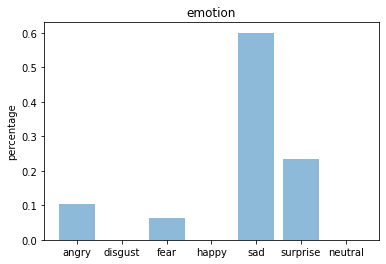

[[1.0249728e-01 4.5588440e-05 6.2708266e-02 8.6202618e-04 6.0082817e-01
  2.3302588e-01 3.2776552e-05]]
0.6008282


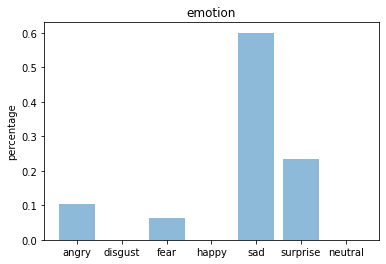

None


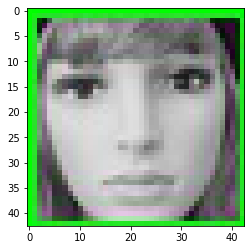

3


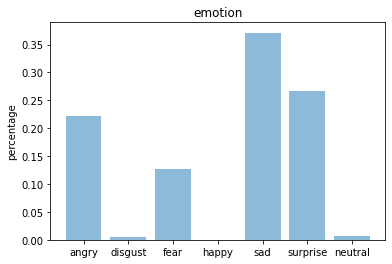

[[2.2267109e-01 5.2778935e-03 1.2769635e-01 6.0666775e-05 3.7126797e-01
  2.6690713e-01 6.1188713e-03]]
0.37126797


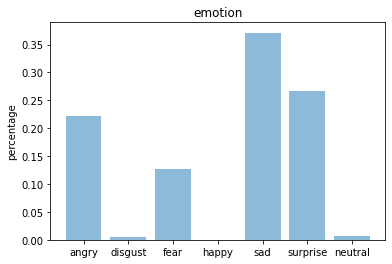

None


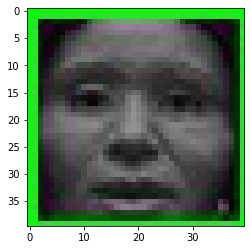

4
Image doesn't exist
5


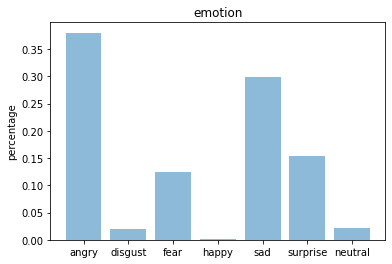

[[0.3799477  0.02016688 0.12471686 0.00078508 0.299506   0.15357766
  0.02129979]]
0.3799477


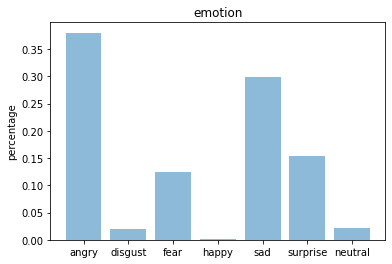

None


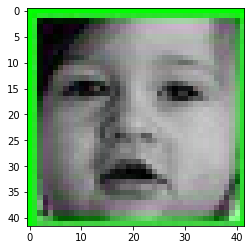

6
Image doesn't exist
7
Image doesn't exist
8
Image doesn't exist
9
Image doesn't exist
10


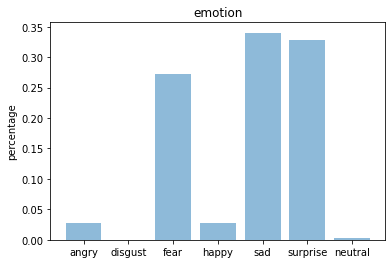

[[0.02771841 0.00046784 0.2728236  0.02825041 0.3401303  0.32825476
  0.00235473]]
0.3401303


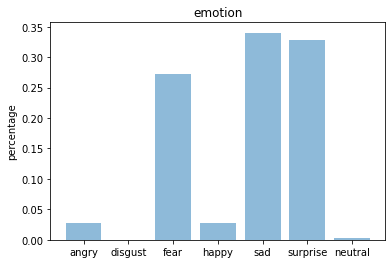

None


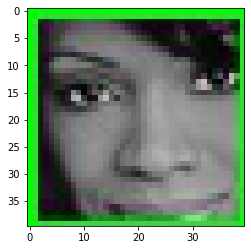

11
Image doesn't exist
12


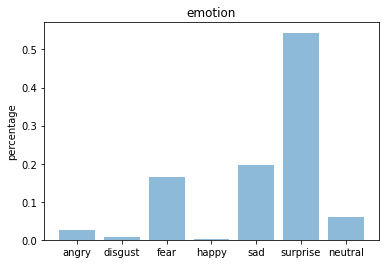

[[0.02491056 0.00610062 0.16456299 0.00336269 0.19726218 0.54402846
  0.05977249]]
0.54402846


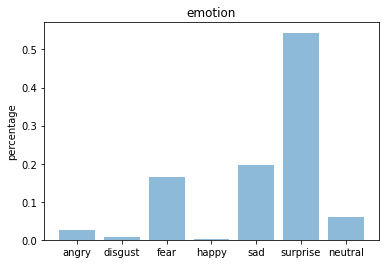

None


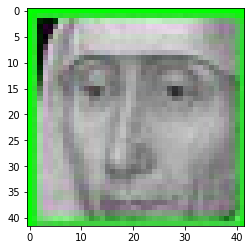

13


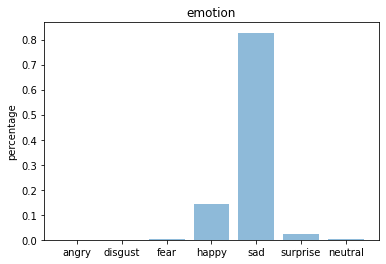

[[8.0137764e-04 2.3216078e-06 4.3798680e-03 1.4476287e-01 8.2725745e-01
  2.1355793e-02 1.4404205e-03]]
0.82725745


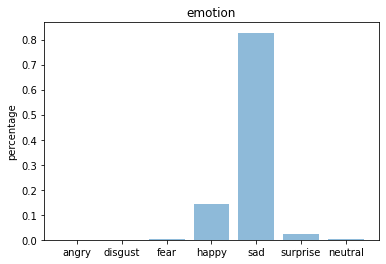

None


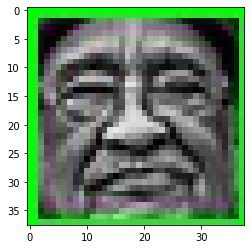

14


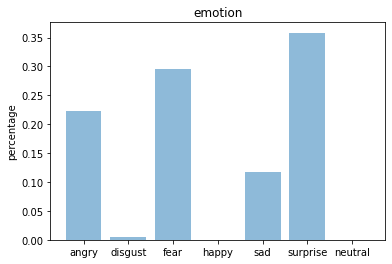

[[2.23345712e-01 4.21475898e-03 2.95757681e-01 1.84183955e-04
  1.17986724e-01 3.58445168e-01 6.57698984e-05]]
0.35844517


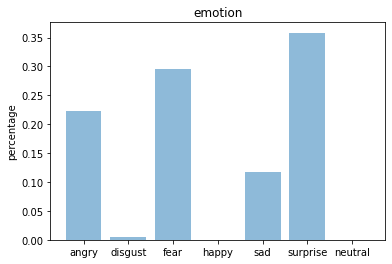

None


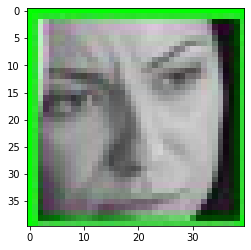

15
Image doesn't exist
16


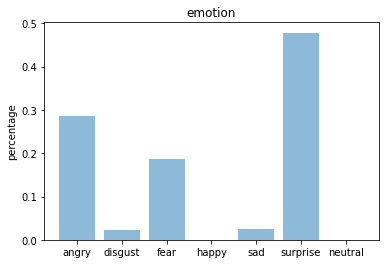

[[2.8698859e-01 2.2775924e-02 1.8681480e-01 1.0306630e-04 2.4994442e-02
  4.7830516e-01 1.8023617e-05]]
0.47830516


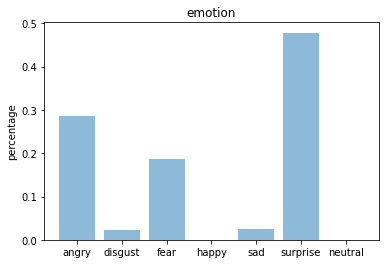

None


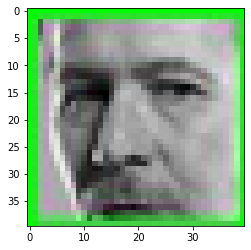

17
Image doesn't exist
18
Image doesn't exist
19


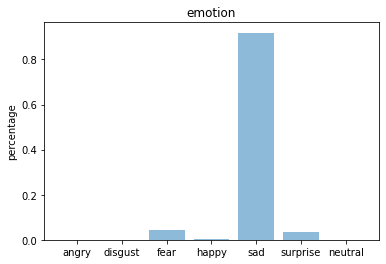

[[6.0951359e-05 2.1815396e-07 4.3843180e-02 4.7116764e-03 9.1863960e-01
  3.2706697e-02 3.7673177e-05]]
0.9186396


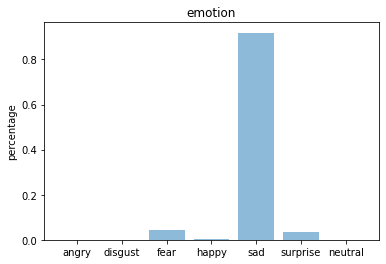

None


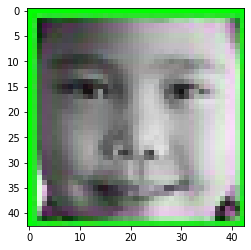

20


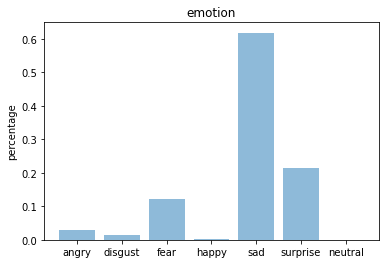

[[2.7914820e-02 1.3273383e-02 1.2134707e-01 2.8537277e-03 6.1868942e-01
  2.1588877e-01 3.2814940e-05]]
0.6186894


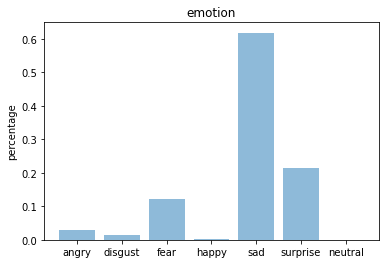

None


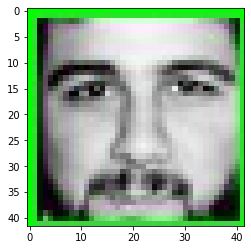

21
Image doesn't exist
22
Image doesn't exist
23
Image doesn't exist
24
Image doesn't exist
25


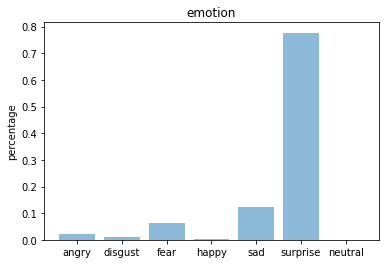

[[2.21570320e-02 9.39153880e-03 6.37736470e-02 4.69627324e-03
  1.22745164e-01 7.77147949e-01 8.84279725e-05]]
0.77714795


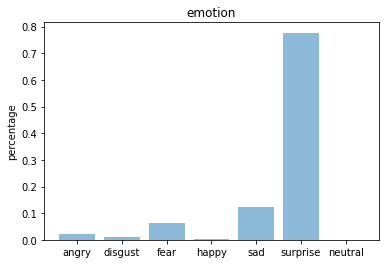

None


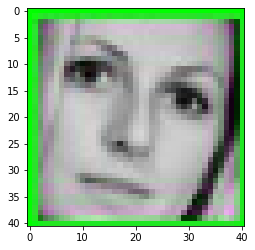

26
Image doesn't exist
27
Image doesn't exist
28


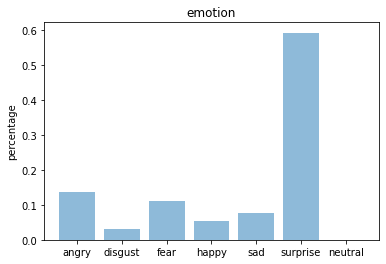

[[1.37319148e-01 3.08012962e-02 1.10725306e-01 5.26904389e-02
  7.64705166e-02 5.91942370e-01 5.09233214e-05]]
0.59194237


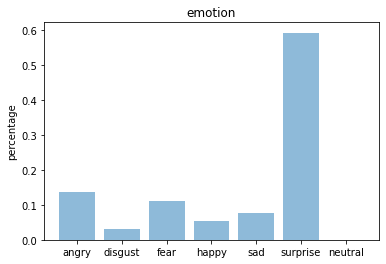

None


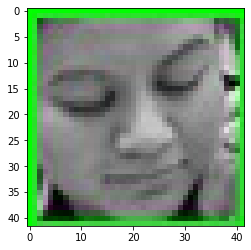

29


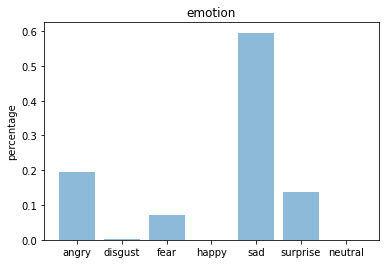

[[1.9442908e-01 1.1502084e-03 7.0303231e-02 2.6008091e-04 5.9534335e-01
  1.3844104e-01 7.3023162e-05]]
0.59534335


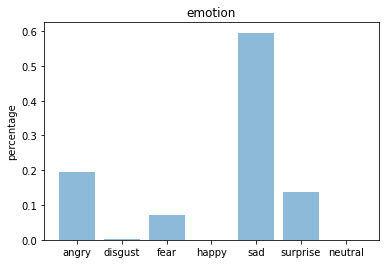

None


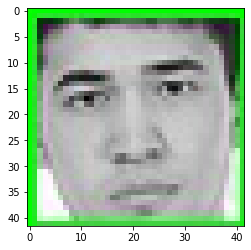

30
Image doesn't exist
31


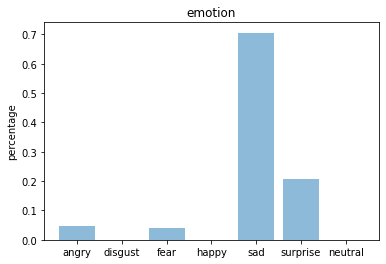

[[4.7636639e-02 1.8812550e-04 3.9123159e-02 7.4863638e-04 7.0608187e-01
  2.0587036e-01 3.5114906e-04]]
0.70608187


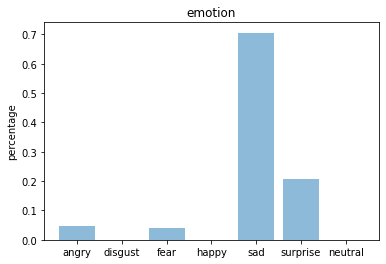

None


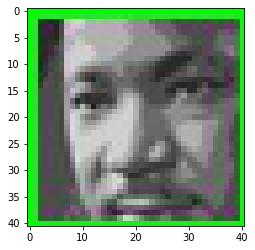

32
Image doesn't exist
33


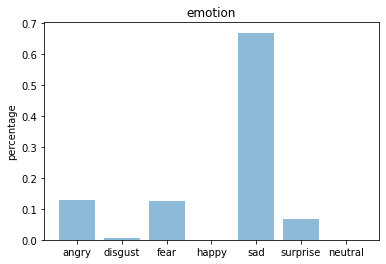

[[1.2921497e-01 6.6507286e-03 1.2613526e-01 5.8439065e-04 6.6954130e-01
  6.7707680e-02 1.6564730e-04]]
0.6695413


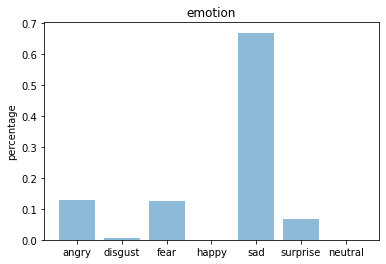

None


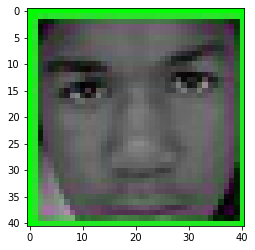

34


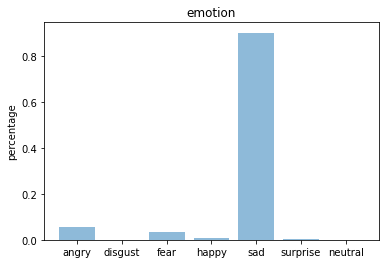

[[5.4720581e-02 1.9699136e-04 3.3940542e-02 7.7919876e-03 9.0063220e-01
  2.6688550e-03 4.8880342e-05]]
0.9006322


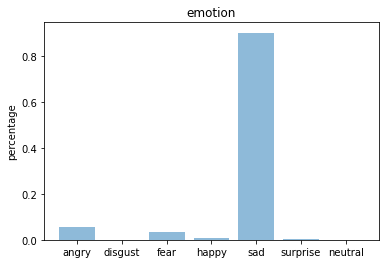

None


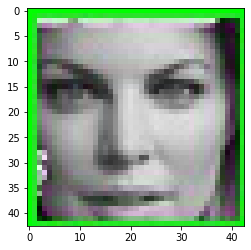

35
Image doesn't exist
36


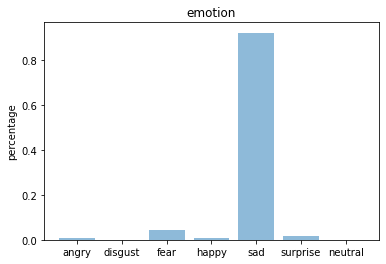

[[5.8681834e-03 2.3544206e-05 4.4625007e-02 8.5706795e-03 9.2284411e-01
  1.7526353e-02 5.4202438e-04]]
0.9228441


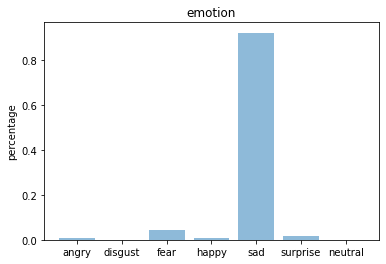

None


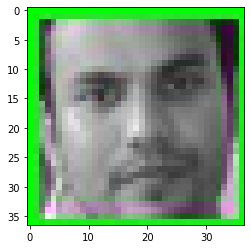

37
Image doesn't exist
38


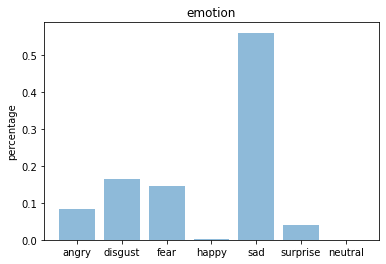

[[8.3576843e-02 1.6523053e-01 1.4622882e-01 2.4440230e-03 5.6166744e-01
  4.0477917e-02 3.7451723e-04]]
0.56166744


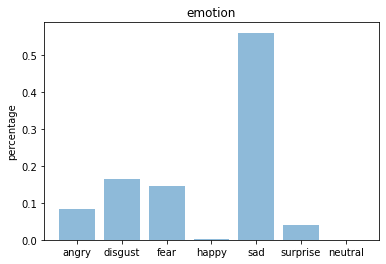

None


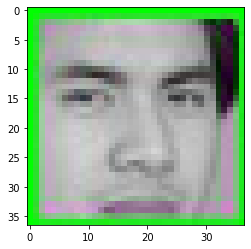

39
Image doesn't exist
40
Image doesn't exist
41


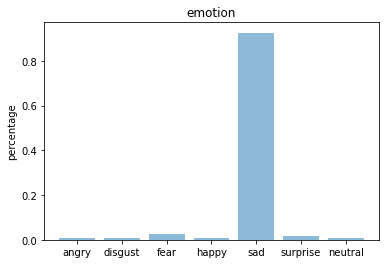

[[0.0061453  0.00850043 0.02786203 0.00798993 0.92598325 0.01741686
  0.00610226]]
0.92598325


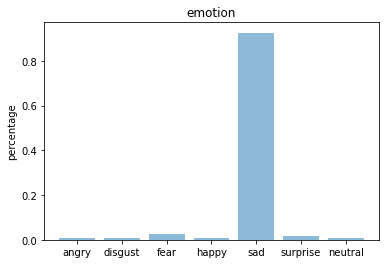

None


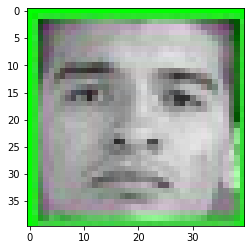

42


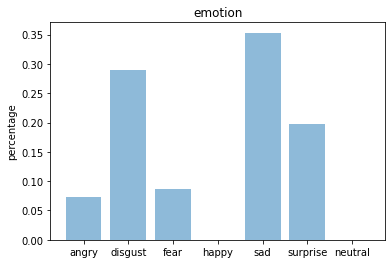

[[7.2411641e-02 2.8950316e-01 8.7383375e-02 2.0782584e-04 3.5329553e-01
  1.9712889e-01 6.9549998e-05]]
0.35329553


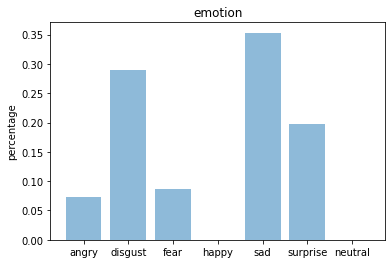

None


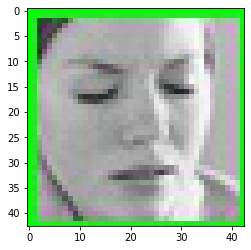

43


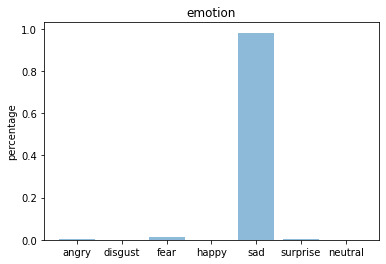

[[2.3378560e-03 1.6189916e-06 1.2228614e-02 3.9994720e-04 9.8240936e-01
  2.6093344e-03 1.3269963e-05]]
0.98240936


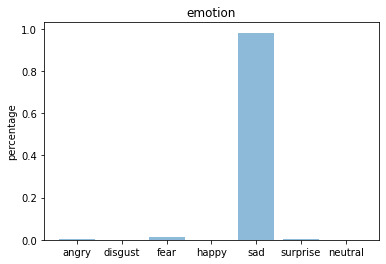

None


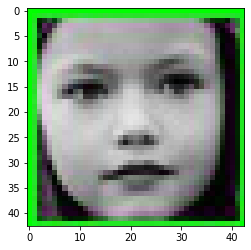

44
Image doesn't exist
45
Image doesn't exist
46
Image doesn't exist
47
Image doesn't exist
48


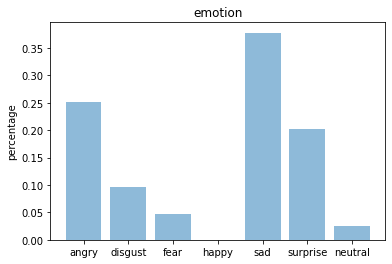

[[0.25147504 0.09648596 0.04662618 0.00051888 0.37785298 0.20140678
  0.02563411]]
0.37785298


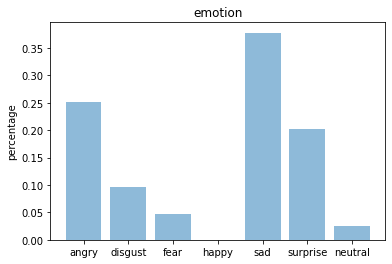

None


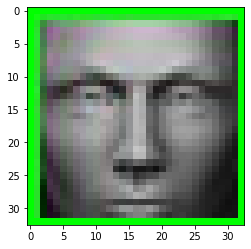

49


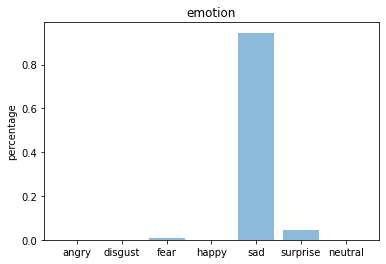

[[1.1289483e-03 1.2787066e-06 8.4838197e-03 2.9167248e-05 9.4559228e-01
  4.4044223e-02 7.2029053e-04]]
0.9455923


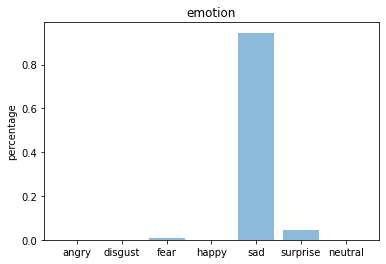

None


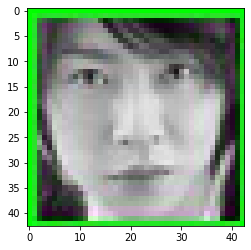

50
Image doesn't exist
51
Image doesn't exist
52


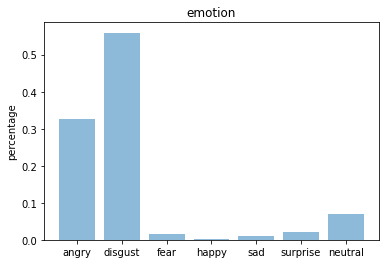

[[0.32681102 0.5592659  0.01499504 0.00114374 0.00940466 0.01978121
  0.06859844]]
0.5592659


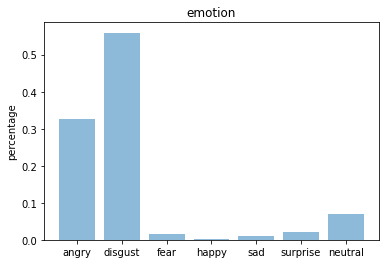

None


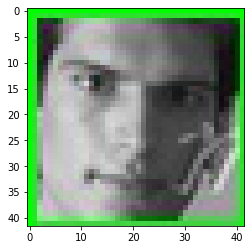

53
Image doesn't exist
54


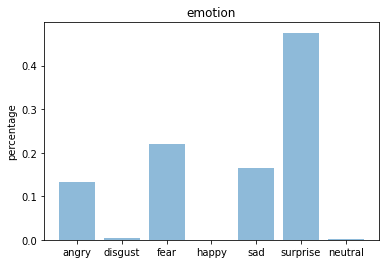

[[1.3306870e-01 4.5666141e-03 2.2062631e-01 4.7790086e-06 1.6512349e-01
  4.7555426e-01 1.0557380e-03]]
0.47555426


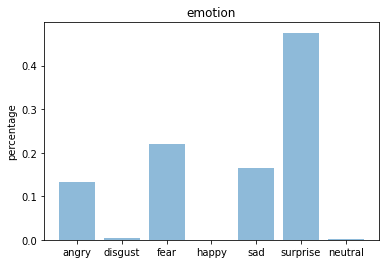

None


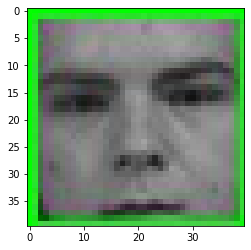

55


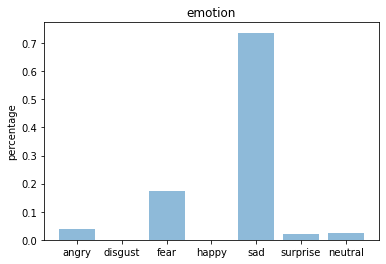

[[3.9929699e-02 3.2085829e-04 1.7478670e-01 5.1087630e-04 7.3756176e-01
  2.1633111e-02 2.5256913e-02]]
0.73756176


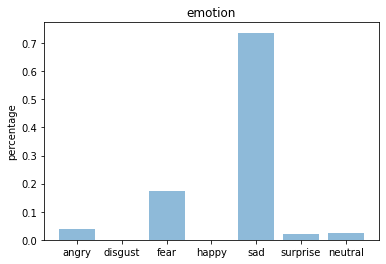

None


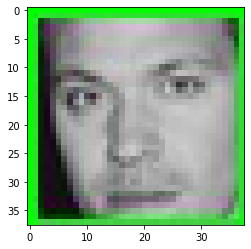

56
Image doesn't exist
57


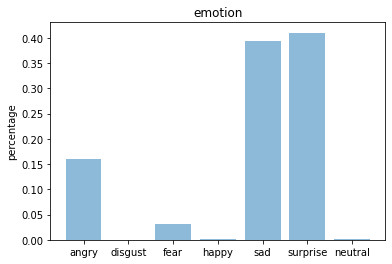

[[0.16054824 0.00046039 0.03223775 0.00115757 0.39384347 0.41008785
  0.00166472]]
0.41008785


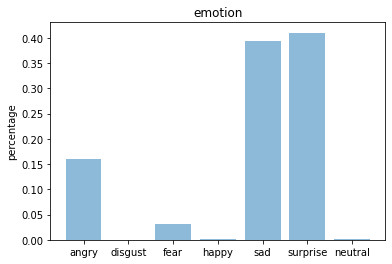

None


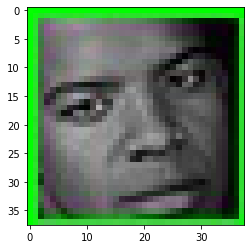

58
Image doesn't exist
59
Image doesn't exist
60
Image doesn't exist
61
Image doesn't exist
62
Image doesn't exist
63


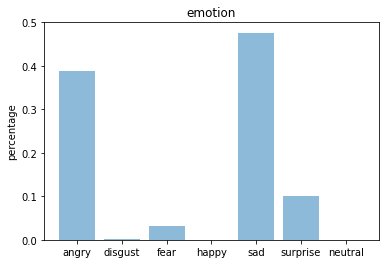

[[3.8857237e-01 1.3881709e-03 3.2267466e-02 8.3624285e-10 4.7638357e-01
  1.0138102e-01 7.4505265e-06]]
0.47638357


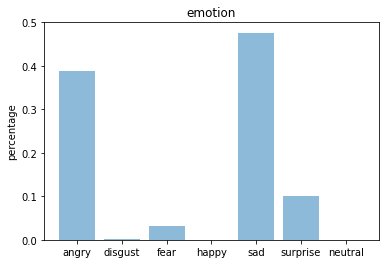

None


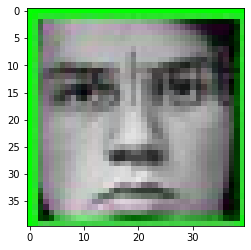

64


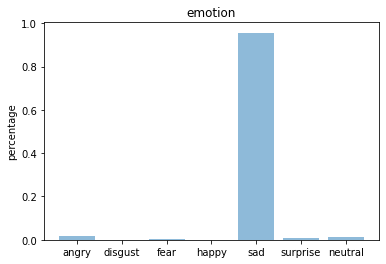

[[1.6450070e-02 1.2051586e-05 4.8760339e-03 2.7814399e-06 9.5648319e-01
  8.0856876e-03 1.4090151e-02]]
0.9564832


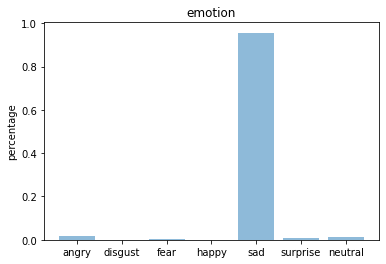

None


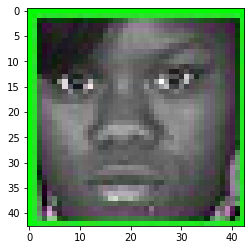

65
Image doesn't exist
66


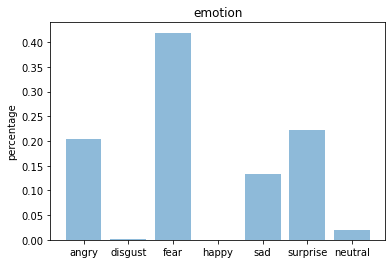

[[2.0403919e-01 1.4860105e-03 4.1917771e-01 2.7816129e-04 1.3420203e-01
  2.2124352e-01 1.9573346e-02]]
0.4191777


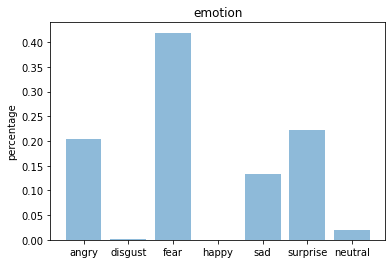

None


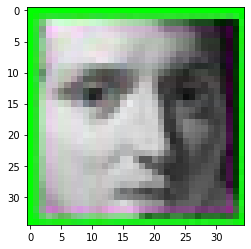

67
Image doesn't exist
68


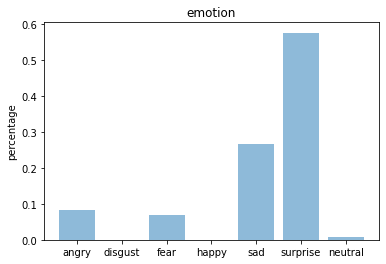

[[8.2431056e-02 2.1688893e-05 6.9221720e-02 7.6690834e-04 2.6573581e-01
  5.7493341e-01 6.8893679e-03]]
0.5749334


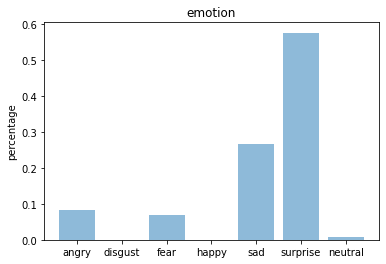

None


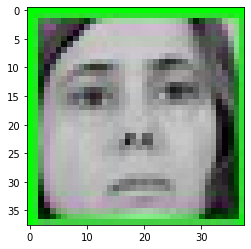

69


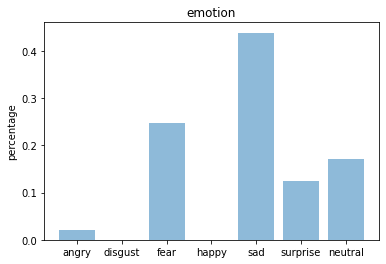

[[2.0166464e-02 2.7510070e-04 2.4705301e-01 1.6667116e-05 4.3818179e-01
  1.2354611e-01 1.7076090e-01]]
0.4381818


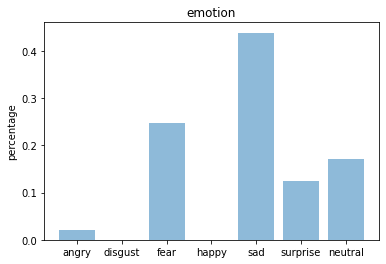

None


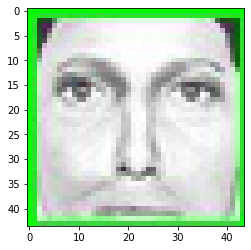

70


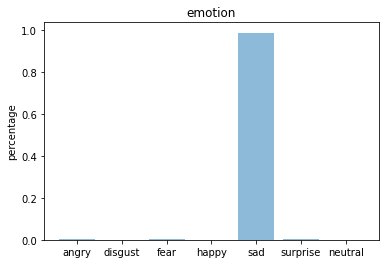

[[2.2745146e-03 6.3342254e-06 4.3831170e-03 3.1610833e-07 9.8726660e-01
  5.9492113e-03 1.1998217e-04]]
0.9872666


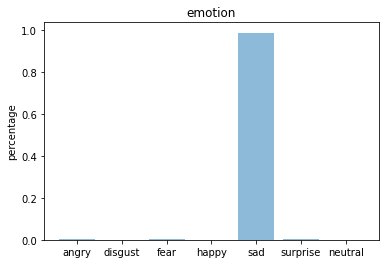

None


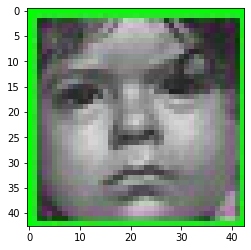

71


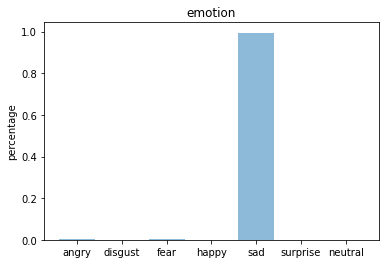

[[1.50924269e-03 1.13011815e-07 2.71251774e-03 1.94445242e-08
  9.94547367e-01 1.14821899e-03 8.25704701e-05]]
0.99454737


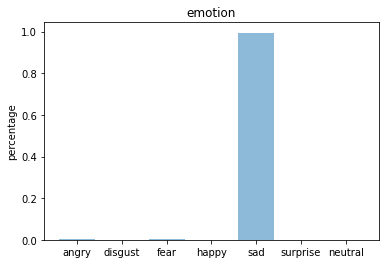

None


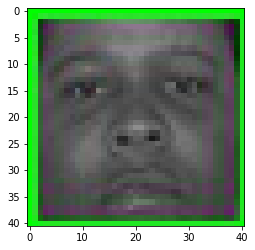

72


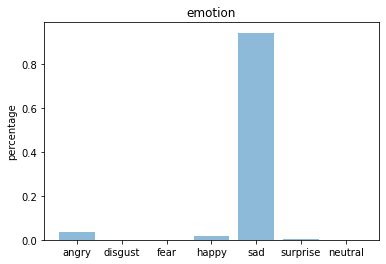

[[3.6016297e-02 2.6740133e-06 4.3572050e-05 1.6638912e-02 9.4106215e-01
  5.1314598e-03 1.1049474e-03]]
0.94106215


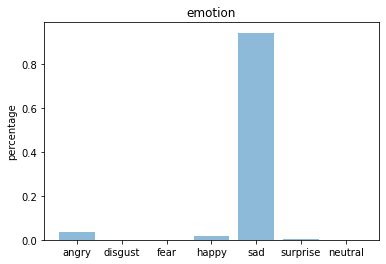

None


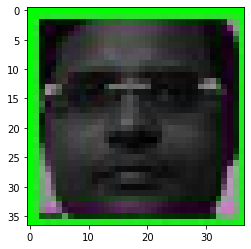

73
Image doesn't exist
74
Image doesn't exist
75
Image doesn't exist
76


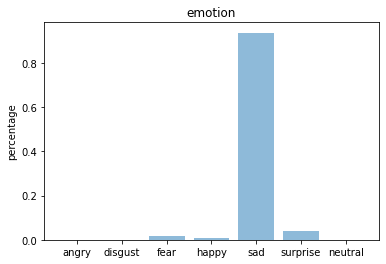

[[1.0107608e-03 3.4938682e-07 1.5388881e-02 6.6232681e-03 9.3608469e-01
  4.0813874e-02 7.8126090e-05]]
0.9360847


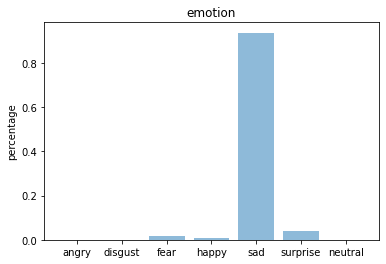

None


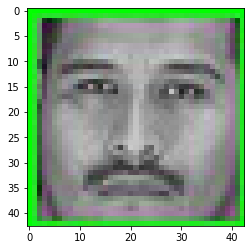

77
Image doesn't exist
78


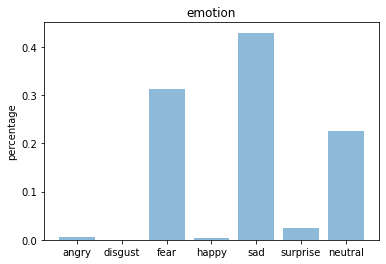

[[5.7517164e-03 1.0978741e-05 3.1205720e-01 4.6392889e-03 4.2909175e-01
  2.3872903e-02 2.2457612e-01]]
0.42909175


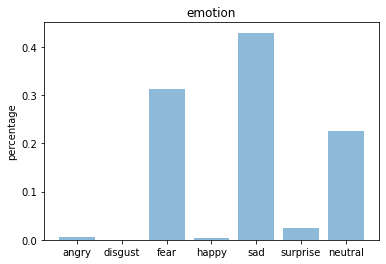

None


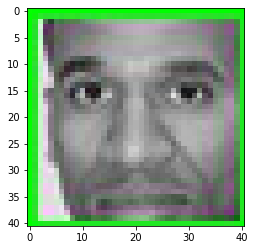

79
Image doesn't exist
80


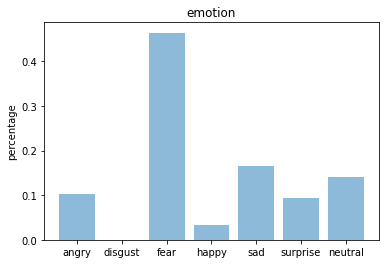

[[0.10256414 0.00066186 0.46422178 0.03287343 0.16608174 0.09346667
  0.14013034]]
0.46422178


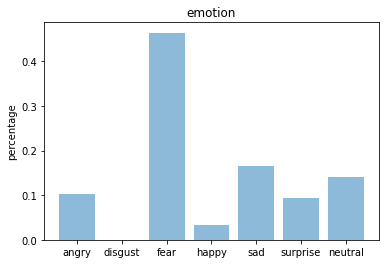

None


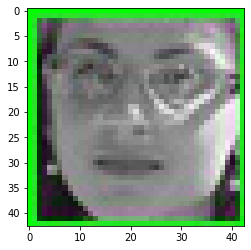

81
Image doesn't exist
82
Image doesn't exist
83


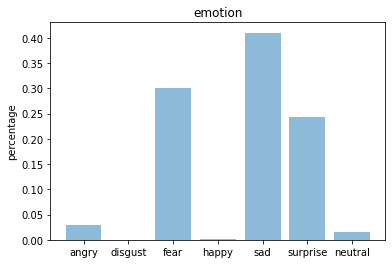

[[2.9814249e-02 2.7734572e-05 3.0060533e-01 7.1485038e-04 4.1004881e-01
  2.4404827e-01 1.4740765e-02]]
0.4100488


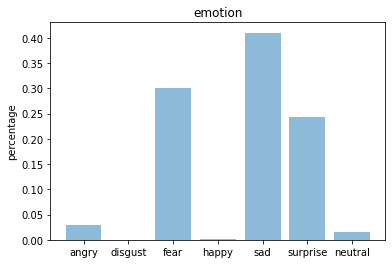

None


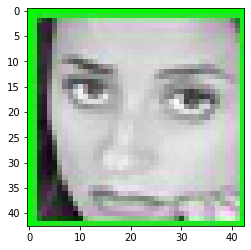

84
Image doesn't exist
85
Image doesn't exist
86


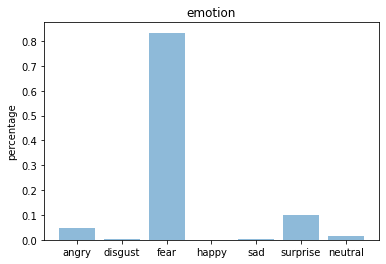

[[4.6882425e-02 2.7834100e-03 8.3334887e-01 2.9080167e-05 3.8209890e-03
  9.8277256e-02 1.4857996e-02]]
0.8333489


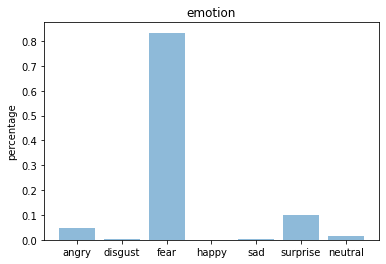

None


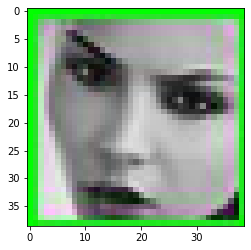

87


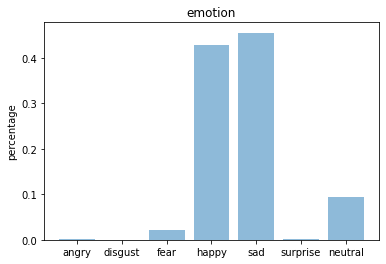

[[7.2974060e-04 3.8820166e-05 2.0558121e-02 4.2739797e-01 4.5536992e-01
  1.5108915e-03 9.4394483e-02]]
0.45536992


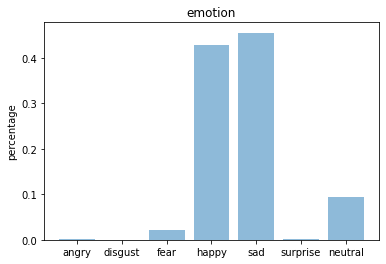

None


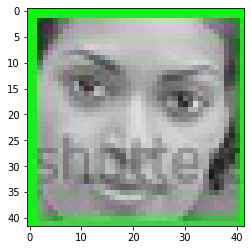

88


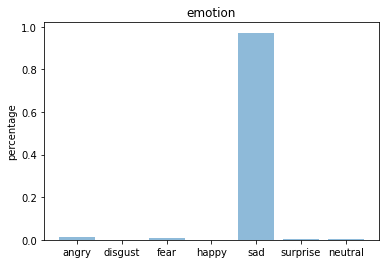

[[1.5299262e-02 2.3923990e-06 6.1982931e-03 1.6014659e-05 9.7204494e-01
  4.8214751e-03 1.6175614e-03]]
0.97204494


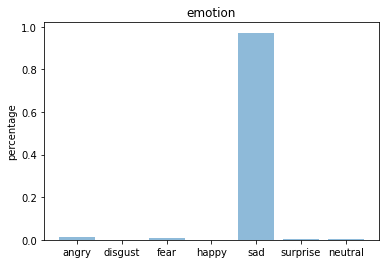

None


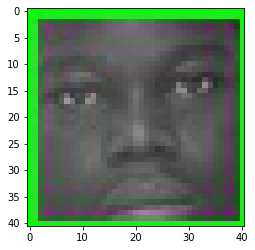

89
Image doesn't exist
90
Image doesn't exist
91
Image doesn't exist
92
Image doesn't exist
93


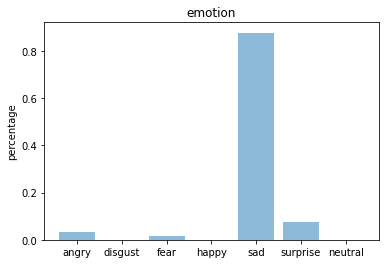

[[3.3301536e-02 2.1163767e-05 1.4122574e-02 1.2368869e-04 8.7767833e-01
  7.4388631e-02 3.6407507e-04]]
0.87767833


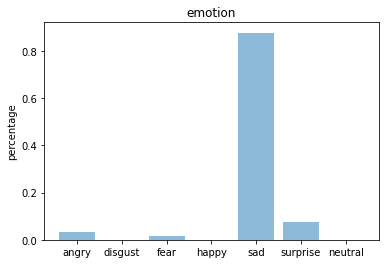

None


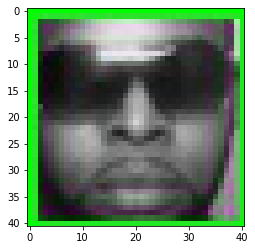

94
Image doesn't exist
95
Image doesn't exist
96


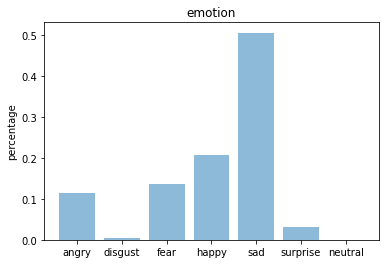

[[1.15092136e-01 5.61621226e-03 1.35502413e-01 2.07112312e-01
  5.05844235e-01 3.08098327e-02 2.28299923e-05]]
0.50584424


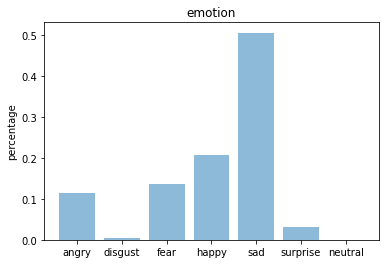

None


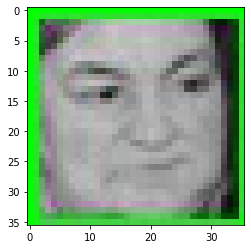

97


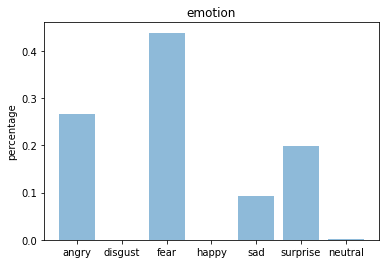

[[2.6685140e-01 3.3087761e-04 4.3874419e-01 9.4363486e-06 9.3449943e-02
  1.9900741e-01 1.6067531e-03]]
0.4387442


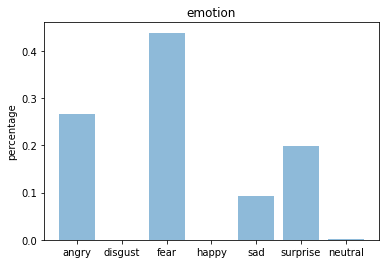

None


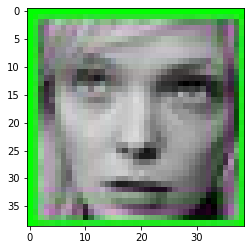

98
Image doesn't exist
99
Image doesn't exist
100
Image doesn't exist
101
Image doesn't exist
102
Image doesn't exist
103
Image doesn't exist
104


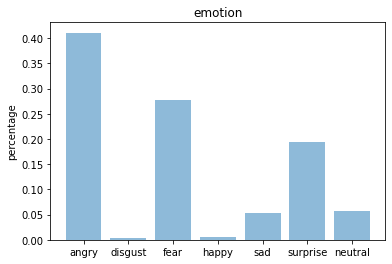

[[0.41086346 0.0040239  0.27690095 0.00536659 0.05240341 0.19376498
  0.05667672]]
0.41086346


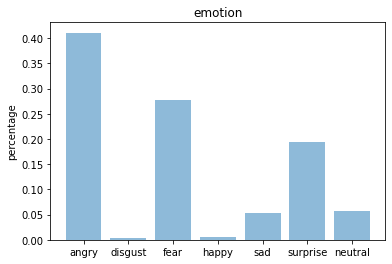

None


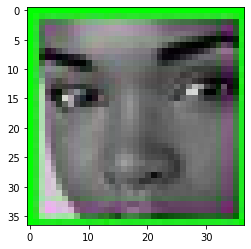

105
Image doesn't exist
106
Image doesn't exist
107


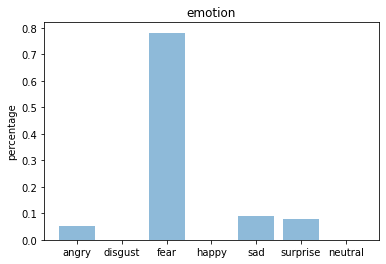

[[5.1883612e-02 1.0105501e-04 7.8095448e-01 1.0378631e-03 8.9348197e-02
  7.6636218e-02 3.8586673e-05]]
0.7809545


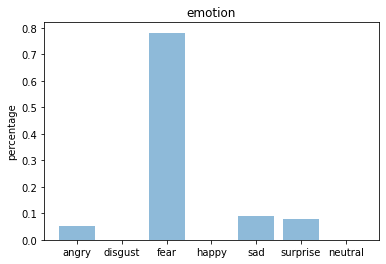

None


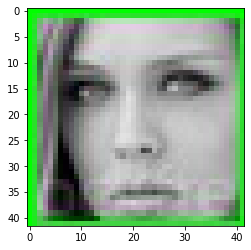

108


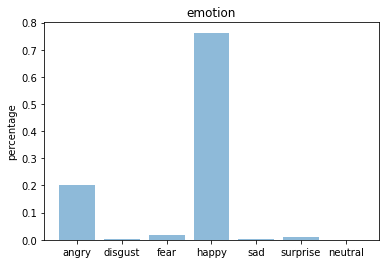

[[2.0198637e-01 3.7825075e-03 1.6584327e-02 7.6258504e-01 4.5282044e-03
  1.0455029e-02 7.8546269e-05]]
0.76258504


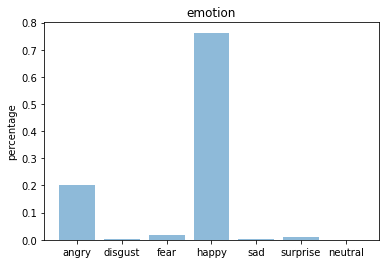

None


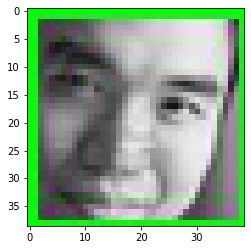

109


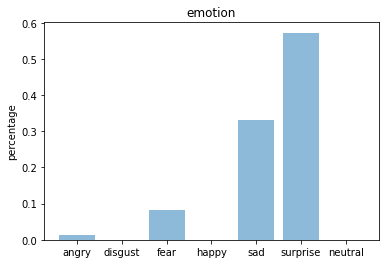

[[1.4358821e-02 1.0935914e-05 8.2531452e-02 1.4071645e-05 3.3036509e-01
  5.7248479e-01 2.3480355e-04]]
0.5724848


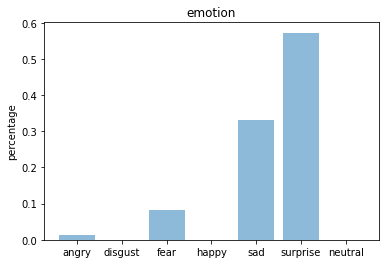

None


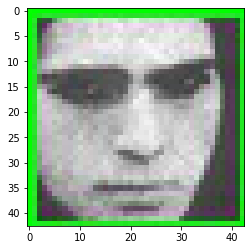

110
Image doesn't exist
111


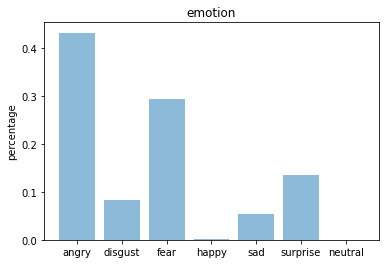

[[4.3276438e-01 8.2139283e-02 2.9525274e-01 1.6638917e-03 5.3290088e-02
  1.3451153e-01 3.7805425e-04]]
0.43276438


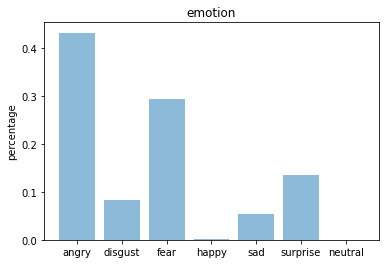

None


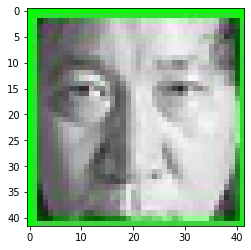

112
Image doesn't exist
113


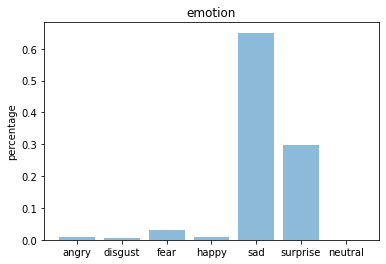

[[9.0515558e-03 5.0854441e-03 3.1071780e-02 7.3417723e-03 6.5048599e-01
  2.9696199e-01 1.4424805e-06]]
0.650486


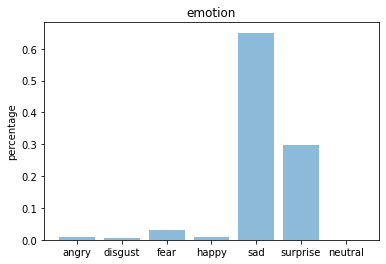

None


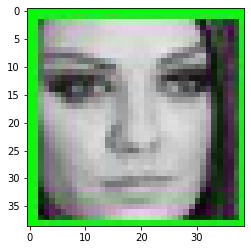

114


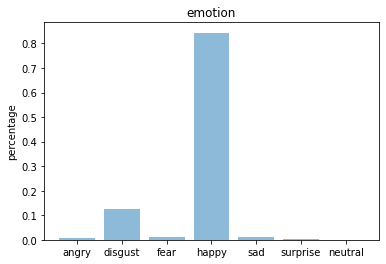

[[5.4376912e-03 1.2678696e-01 9.4653331e-03 8.4386486e-01 1.2502815e-02
  1.9185862e-03 2.3781879e-05]]
0.84386486


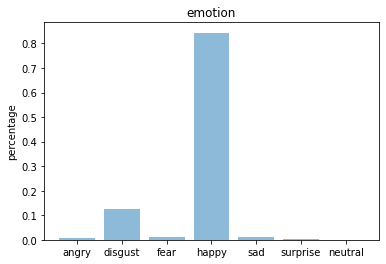

None


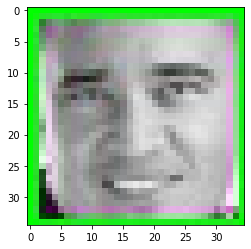

115
Image doesn't exist
116


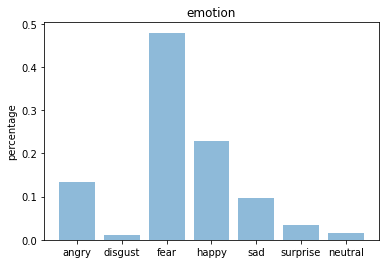

[[0.13383251 0.01120745 0.47947943 0.22783941 0.09763683 0.03355644
  0.01644789]]
0.47947943


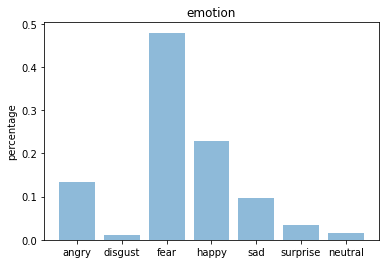

None


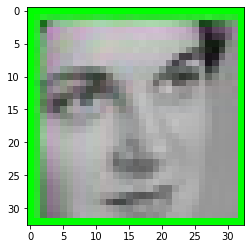

117
Image doesn't exist
118
Image doesn't exist
119


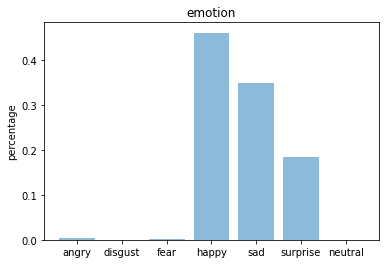

[[3.0521906e-03 1.4503188e-04 1.7117752e-03 4.6141329e-01 3.4963712e-01
  1.8364345e-01 3.9716967e-04]]
0.4614133


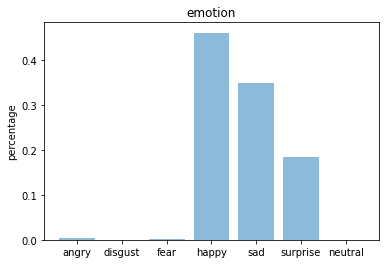

None


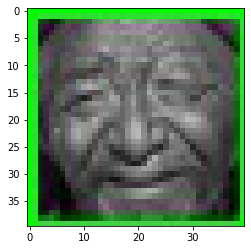

120


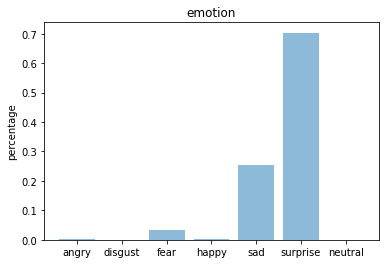

[[4.1448483e-03 3.9646279e-06 3.4586642e-02 2.4269933e-03 2.5540963e-01
  7.0339352e-01 3.4363798e-05]]
0.7033935


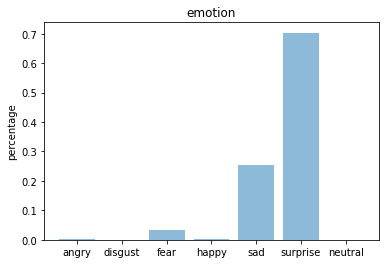

None


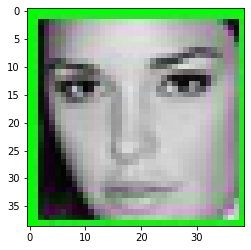

121
Image doesn't exist
122
Image doesn't exist
123
Image doesn't exist
124
Image doesn't exist
125
Image doesn't exist
126


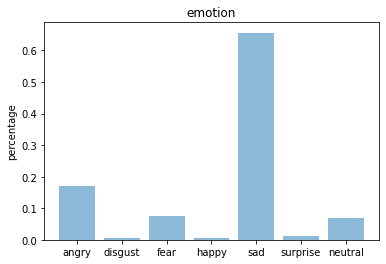

[[0.17162743 0.0058673  0.07645094 0.00728145 0.6562275  0.01327546
  0.06926993]]
0.6562275


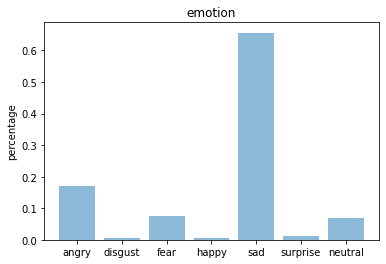

None


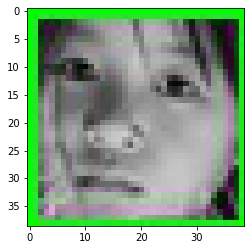

127
Image doesn't exist
128
Image doesn't exist
129
Image doesn't exist
130


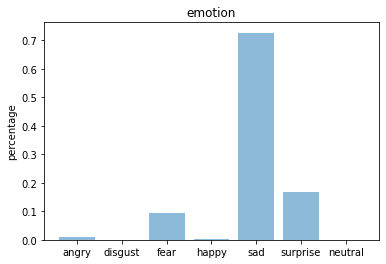

[[1.0322522e-02 4.6844542e-04 9.2846237e-02 1.1567728e-03 7.2674716e-01
  1.6840485e-01 5.3998505e-05]]
0.72674716


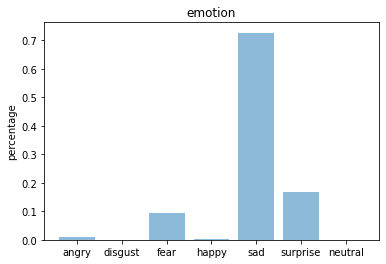

None


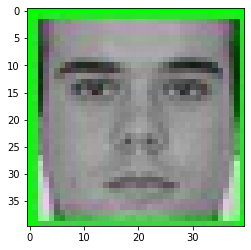

131
Image doesn't exist
132


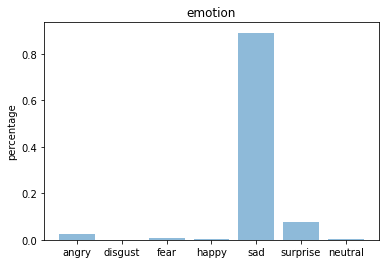

[[2.5400385e-02 1.6849941e-05 6.0501024e-03 1.9507996e-03 8.9005631e-01
  7.4693695e-02 1.8318298e-03]]
0.8900563


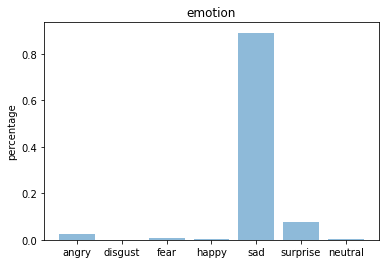

None


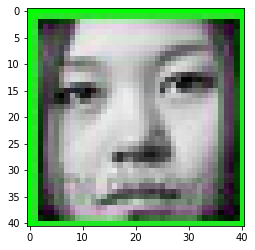

133
Image doesn't exist
134
Image doesn't exist
135
Image doesn't exist
136
Image doesn't exist
137
Image doesn't exist
138
Image doesn't exist
139
Image doesn't exist
140
Image doesn't exist
141
Image doesn't exist
142


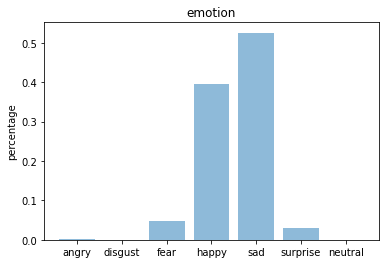

[[1.3029720e-03 1.3377455e-06 4.7863476e-02 3.9412051e-01 5.2523953e-01
  3.1037474e-02 4.3473821e-04]]
0.5252395


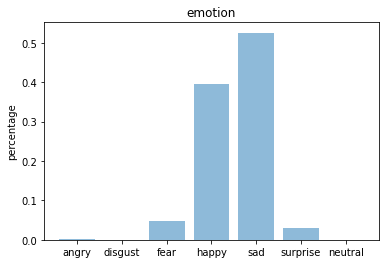

None


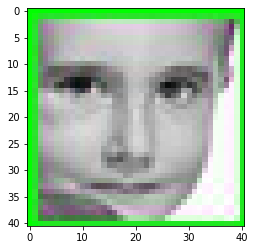

143


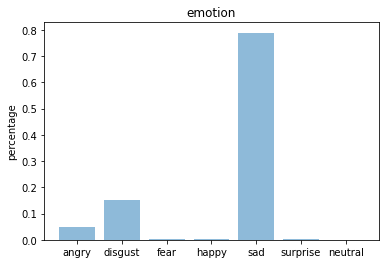

[[5.0032232e-02 1.5184502e-01 4.5269527e-03 2.8167835e-03 7.8931177e-01
  1.4298593e-03 3.7355305e-05]]
0.78931177


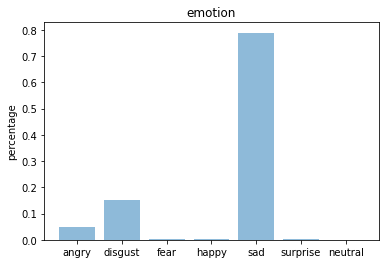

None


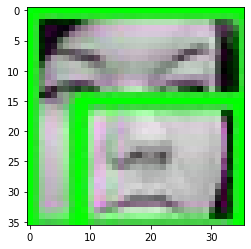

144
Image doesn't exist
145


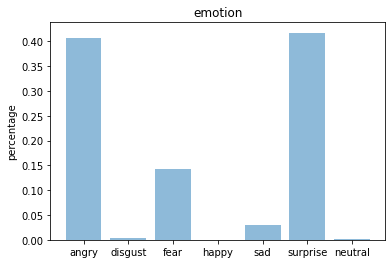

[[4.0669164e-01 2.6791254e-03 1.4171529e-01 7.6957765e-09 3.0147307e-02
  4.1709435e-01 1.6722170e-03]]
0.41709435


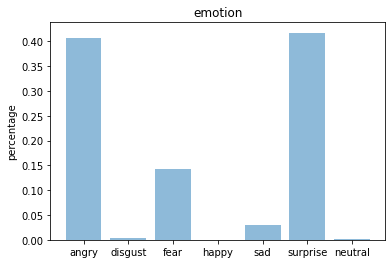

None


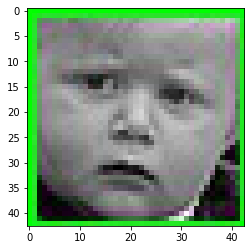

146
Image doesn't exist
147


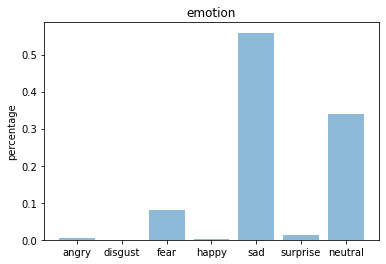

[[5.3868834e-03 1.5457719e-05 8.0142990e-02 2.2099863e-03 5.5894023e-01
  1.2870463e-02 3.4043398e-01]]
0.55894023


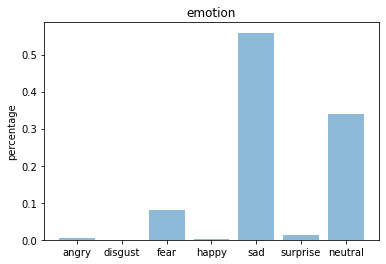

None


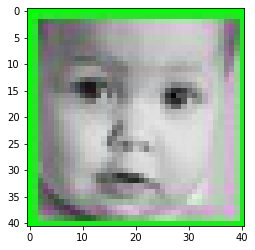

148


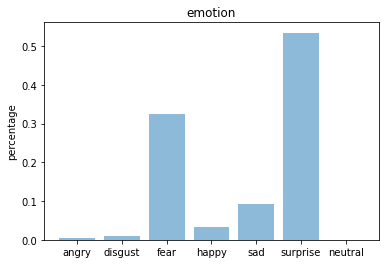

[[4.7518653e-03 9.4737224e-03 3.2460588e-01 3.3782937e-02 9.2504181e-02
  5.3485715e-01 2.4233204e-05]]
0.53485715


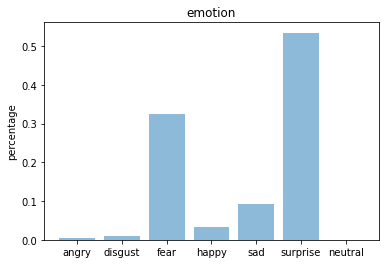

None


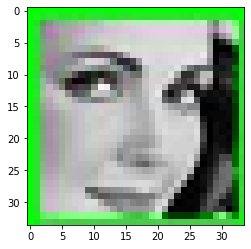

149
Image doesn't exist
150


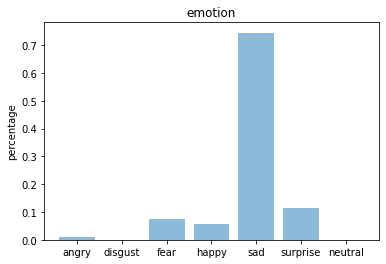

[[8.9974469e-03 4.5440954e-04 7.4904330e-02 5.8019221e-02 7.4437577e-01
  1.1287421e-01 3.7456435e-04]]
0.74437577


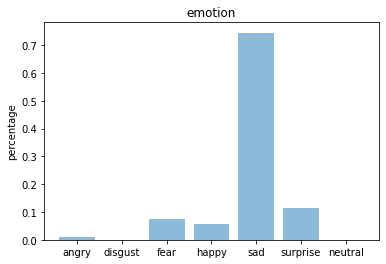

None


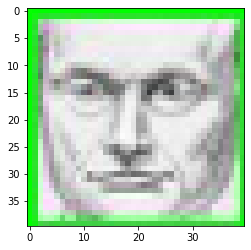

151
Image doesn't exist
152


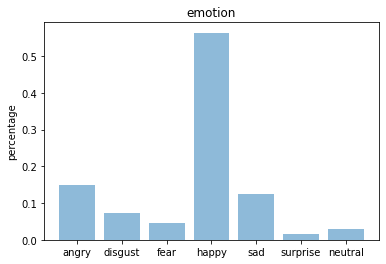

[[0.14790103 0.07334627 0.04445112 0.5637524  0.12556405 0.01469231
  0.03029281]]
0.5637524


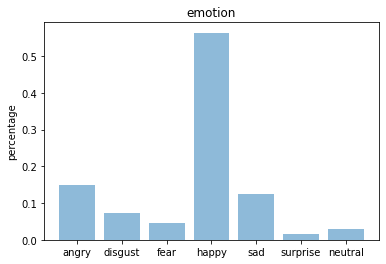

None


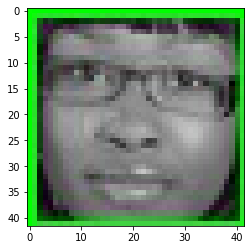

153
Image doesn't exist
154


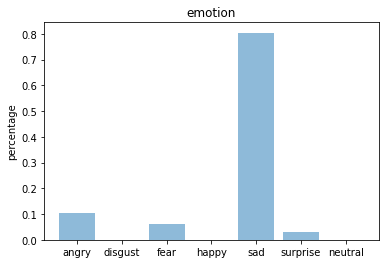

[[1.0544126e-01 1.3146445e-06 6.0515918e-02 1.1006942e-07 8.0425096e-01
  2.9770380e-02 2.0061912e-05]]
0.80425096


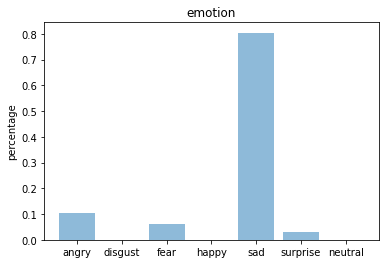

None


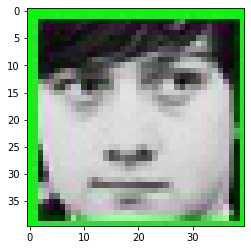

155
Image doesn't exist
156
Image doesn't exist
157


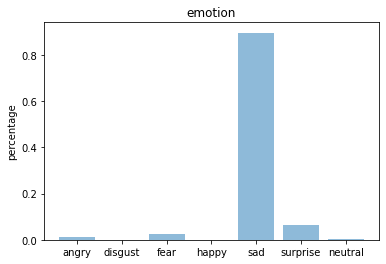

[[1.1875190e-02 2.9337464e-04 2.5251832e-02 5.1477018e-06 8.9608973e-01
  6.4845994e-02 1.6386721e-03]]
0.89608973


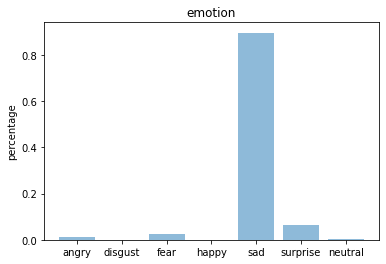

None


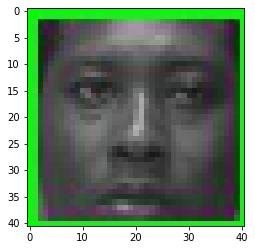

158
Image doesn't exist
159
Image doesn't exist
160
Image doesn't exist
161


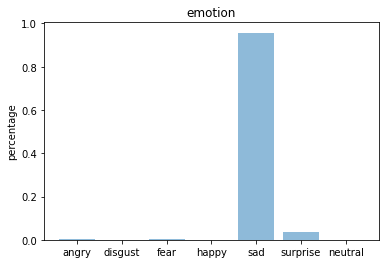

[[5.7257395e-03 9.7867705e-06 1.9148634e-03 1.1175237e-04 9.5718700e-01
  3.5043359e-02 7.4995346e-06]]
0.957187


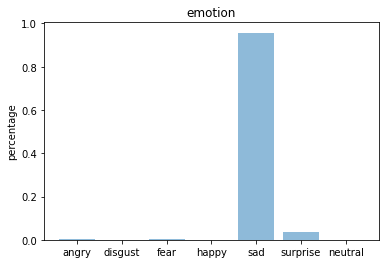

None


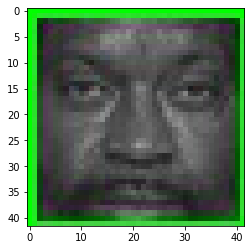

162


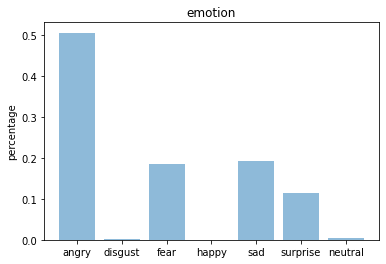

[[5.0539058e-01 9.4961427e-04 1.8549146e-01 2.2361217e-05 1.9130762e-01
  1.1342921e-01 3.4091098e-03]]
0.5053906


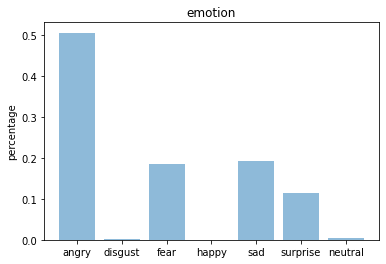

None


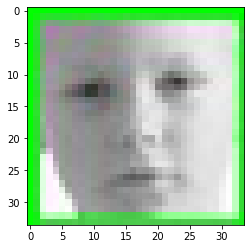

163
Image doesn't exist
164
Image doesn't exist
165


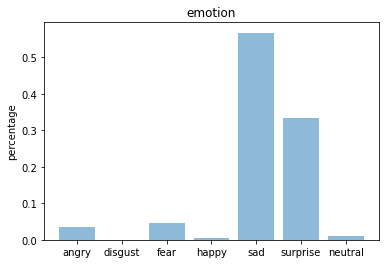

[[3.6351290e-02 9.6143583e-07 4.6189874e-02 4.2862399e-03 5.6785458e-01
  3.3518034e-01 1.0136719e-02]]
0.5678546


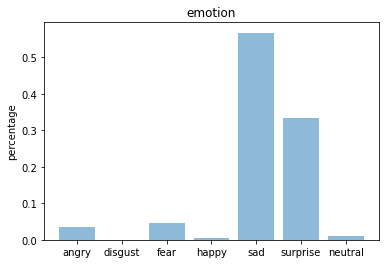

None


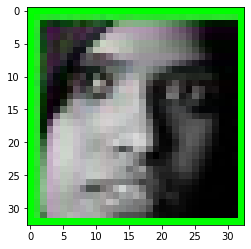

166
Image doesn't exist
167


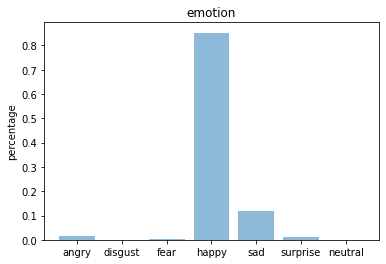

[[1.42384050e-02 3.88318818e-04 3.38475010e-03 8.52539003e-01
  1.17523074e-01 1.17697725e-02 1.56672279e-04]]
0.852539


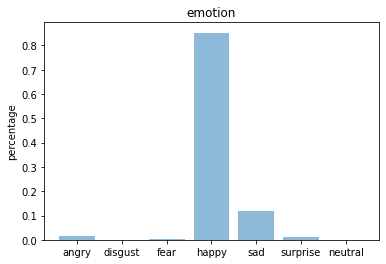

None


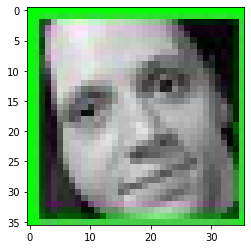

168
Image doesn't exist
169


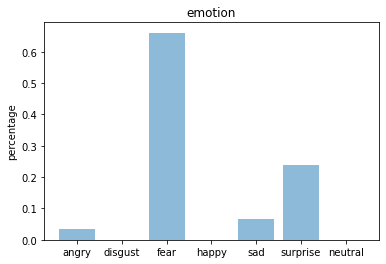

[[3.5938725e-02 1.5799531e-04 6.6056502e-01 5.0197563e-05 6.5987207e-02
  2.3728366e-01 1.7297312e-05]]
0.660565


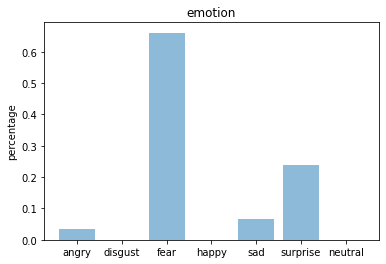

None


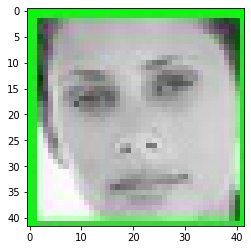

170


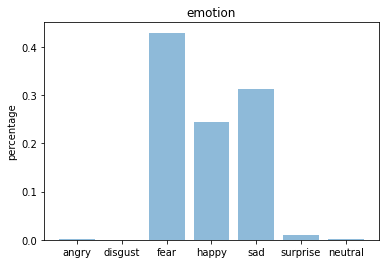

[[1.7579850e-03 1.0590172e-06 4.2962441e-01 2.4462891e-01 3.1294802e-01
  9.9478615e-03 1.0917826e-03]]
0.4296244


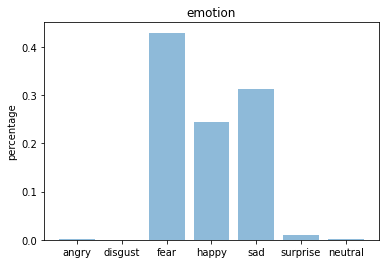

None


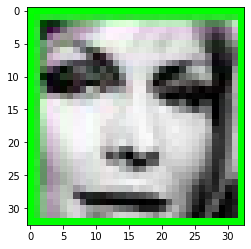

171
Image doesn't exist
172


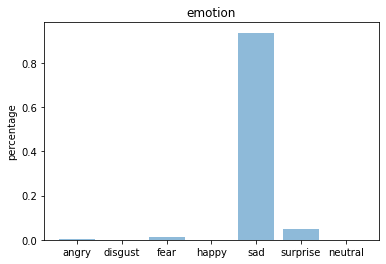

[[2.0303540e-03 2.5299099e-07 1.2154263e-02 5.9122912e-04 9.3531954e-01
  4.9863361e-02 4.0967720e-05]]
0.93531954


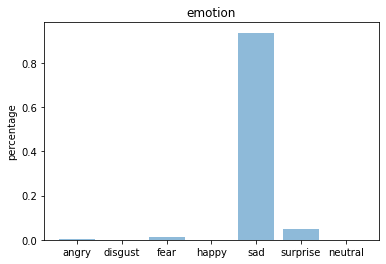

None


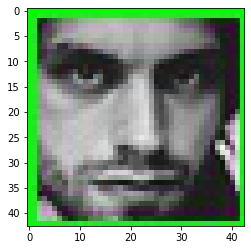

173
Image doesn't exist
174


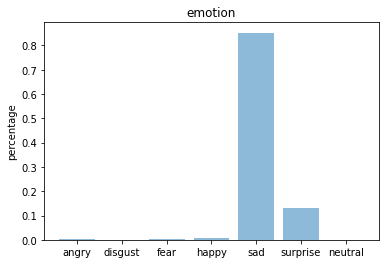

[[2.8008816e-03 1.1981645e-03 5.3068730e-03 8.0437008e-03 8.5250920e-01
  1.3009940e-01 4.1670832e-05]]
0.8525092


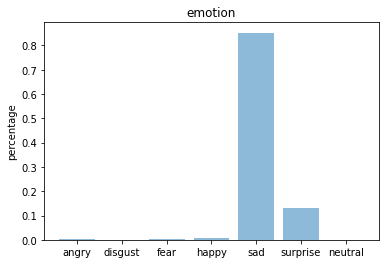

None


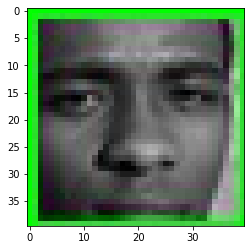

175
Image doesn't exist
176


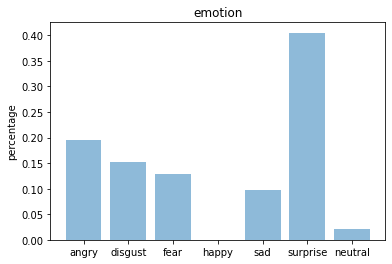

[[0.19551945 0.15238936 0.12809871 0.00054504 0.09792462 0.40521157
  0.02031124]]
0.40521157


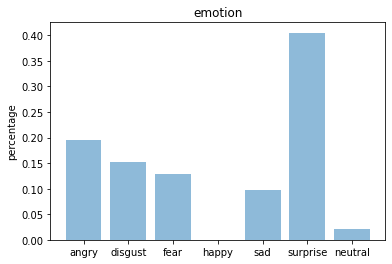

None


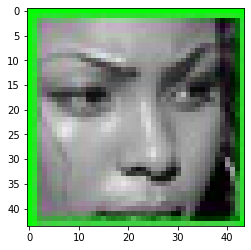

177


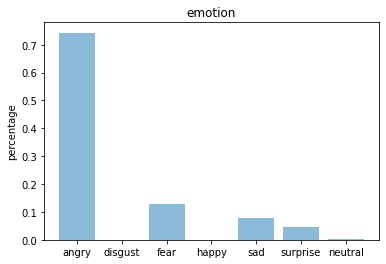

[[7.4320835e-01 5.9521705e-04 1.2943555e-01 4.1511096e-04 7.7669837e-02
  4.5091439e-02 3.5845314e-03]]
0.74320835


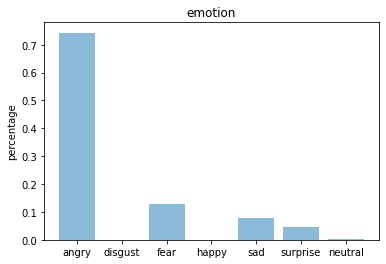

None


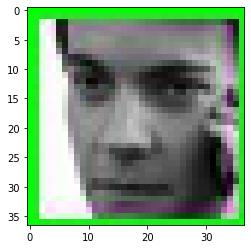

178
Image doesn't exist
179
Image doesn't exist
180


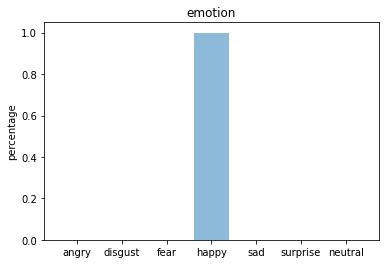

[[6.0419005e-08 3.3381579e-11 6.9660695e-07 9.9966574e-01 3.3113675e-04
  2.8177453e-07 2.0754721e-06]]
0.99966574


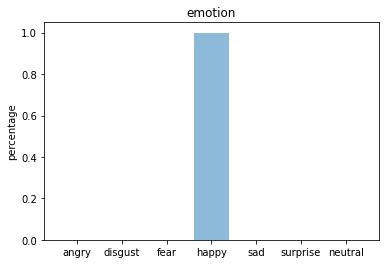

None


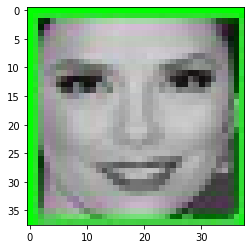

181


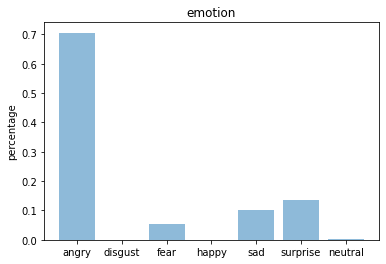

[[7.06024051e-01 9.35786666e-05 5.25810458e-02 7.25104881e-04
  1.01900816e-01 1.34368613e-01 4.30672895e-03]]
0.70602405


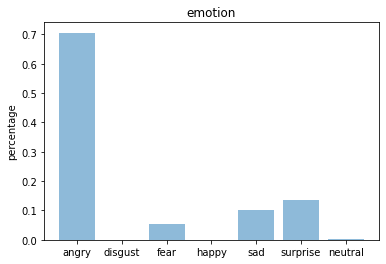

None


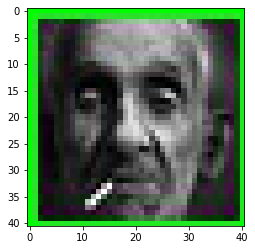

182
Image doesn't exist
183
Image doesn't exist
184


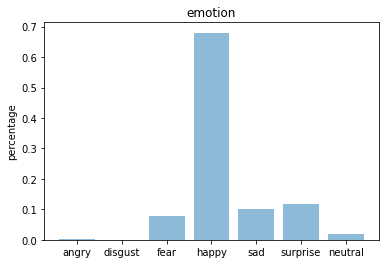

[[0.00307315 0.00081453 0.078419   0.6800695  0.09992822 0.11865561
  0.01903995]]
0.6800695


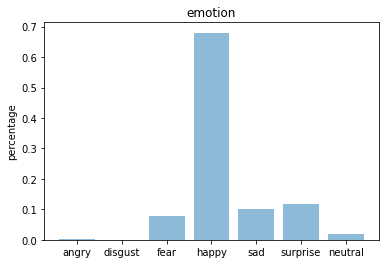

None


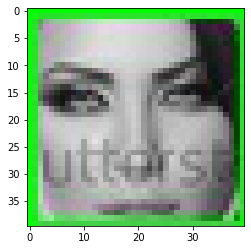

185


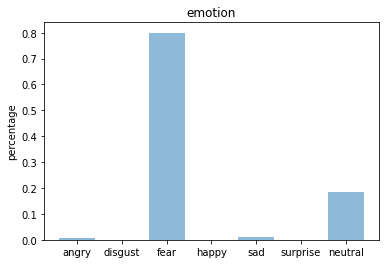

[[6.9251843e-03 2.7564570e-07 7.9979581e-01 1.1644841e-04 9.1879945e-03
  4.6579234e-04 1.8350859e-01]]
0.7997958


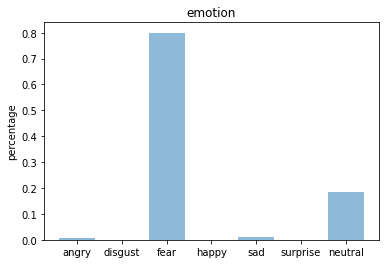

None


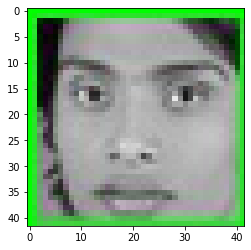

186
Image doesn't exist
187


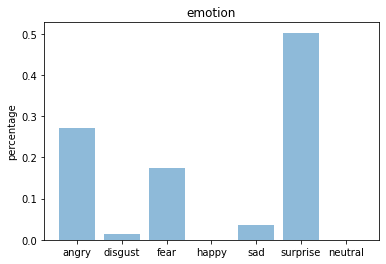

[[0.27153304 0.01456355 0.17397058 0.00059389 0.03599457 0.5026353
  0.00070906]]
0.5026353


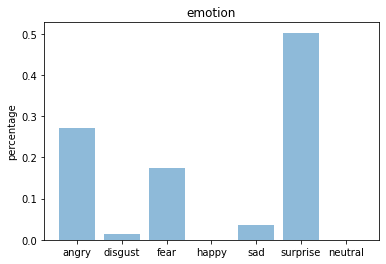

None


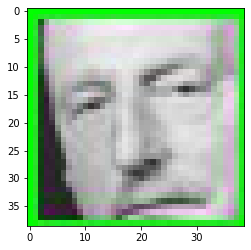

188


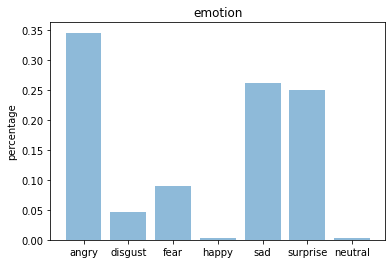

[[0.3456308  0.04630847 0.09044368 0.00228713 0.26243976 0.24953747
  0.00335274]]
0.3456308


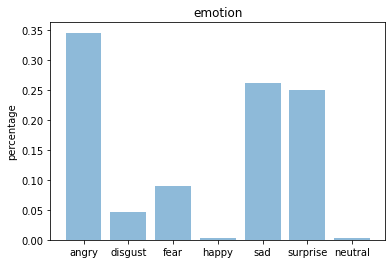

None


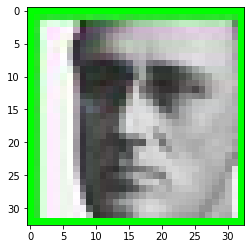

189


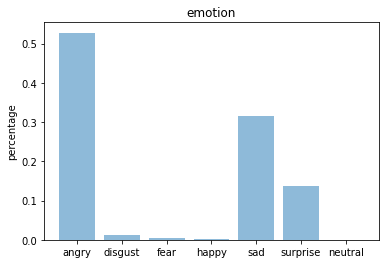

[[5.2773774e-01 1.2741953e-02 3.5798603e-03 3.2714242e-03 3.1506261e-01
  1.3753766e-01 6.8722402e-05]]
0.52773774


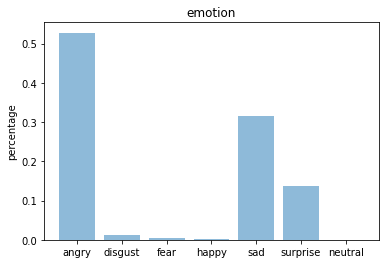

None


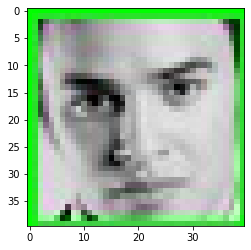

190
Image doesn't exist
191
Image doesn't exist
192
Image doesn't exist
193
Image doesn't exist
194
Image doesn't exist
195


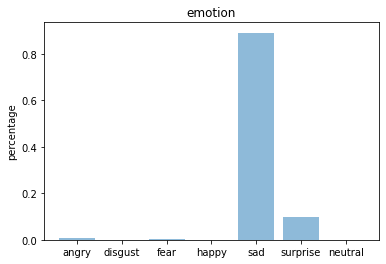

[[7.67599000e-03 1.08512584e-04 1.83723634e-03 1.62537742e-06
  8.91307294e-01 9.90192667e-02 5.00720453e-05]]
0.8913073


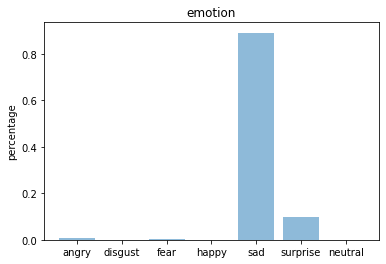

None


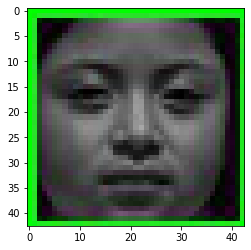

196


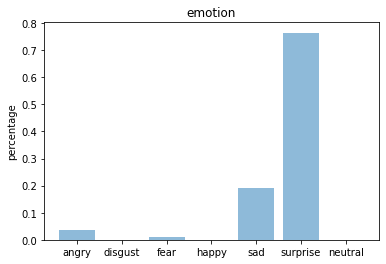

[[3.5455037e-02 3.8496478e-07 9.5848646e-03 2.8570380e-06 1.9051892e-01
  7.6443619e-01 1.7584620e-06]]
0.7644362


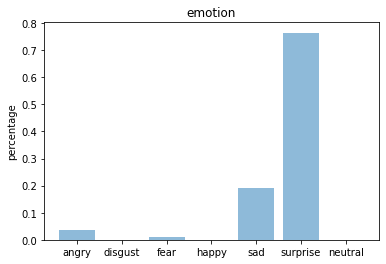

None


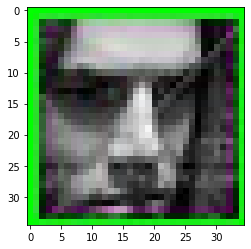

197
Image doesn't exist
198
Image doesn't exist
199
Image doesn't exist
200


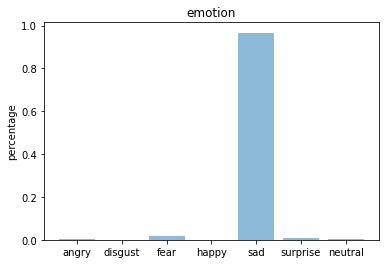

[[5.2091950e-03 6.7892528e-05 1.6252110e-02 1.7072851e-04 9.6658319e-01
  9.4930716e-03 2.2238800e-03]]
0.9665832


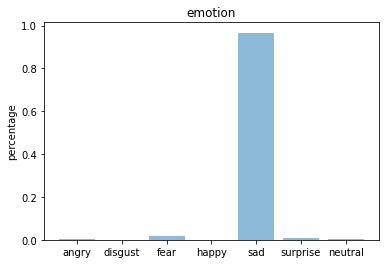

None


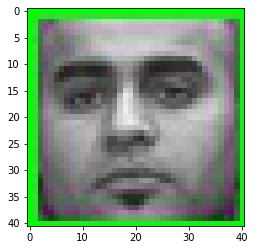

201
Image doesn't exist
202


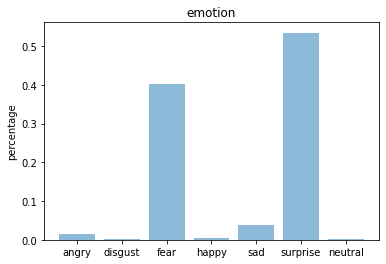

[[0.01478976 0.00240429 0.40187117 0.00492233 0.03898666 0.5344178
  0.00260802]]
0.5344178


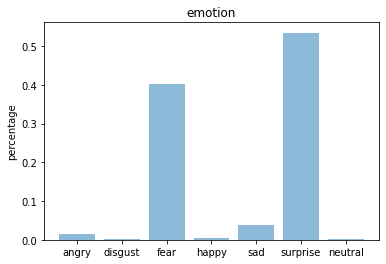

None


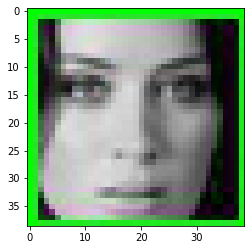

203


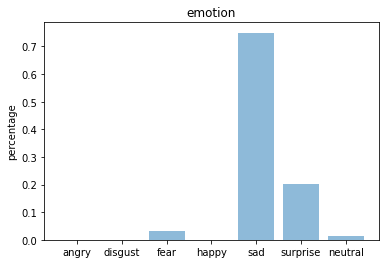

[[7.9368328e-04 7.3225792e-08 3.2247525e-02 3.7620990e-07 7.4961698e-01
  2.0267829e-01 1.4663006e-02]]
0.749617


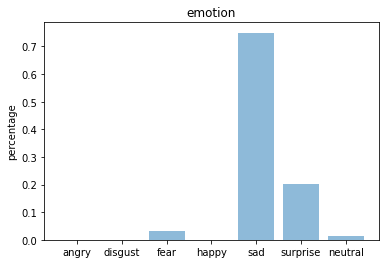

None


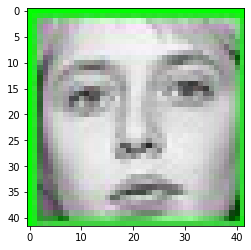

204
Image doesn't exist
205


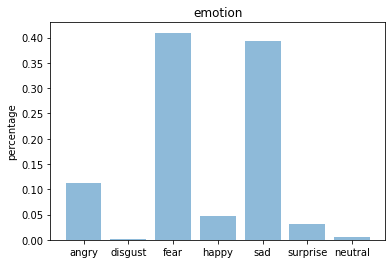

[[0.1128147  0.00074778 0.40964797 0.04787118 0.3926865  0.03048242
  0.00574949]]
0.40964797


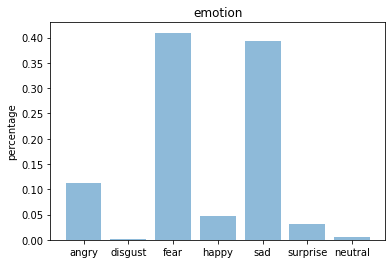

None


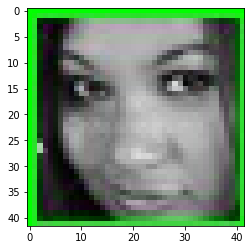

206


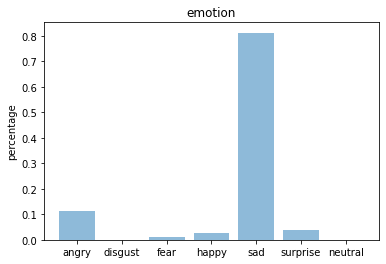

[[1.12943314e-01 3.31110758e-04 9.79720242e-03 2.56095789e-02
  8.12949359e-01 3.82403359e-02 1.29089123e-04]]
0.81294936


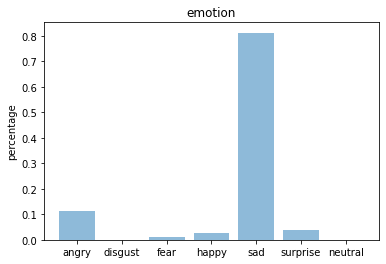

None


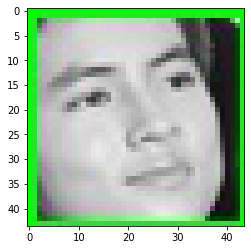

207


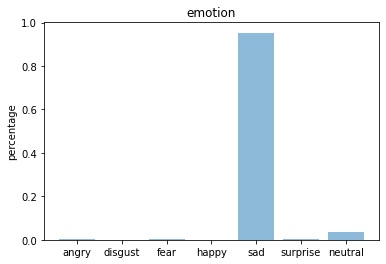

[[2.1081727e-03 1.3225959e-07 3.8012324e-03 1.5408930e-04 9.5327681e-01
  4.9864813e-03 3.5673086e-02]]
0.9532768


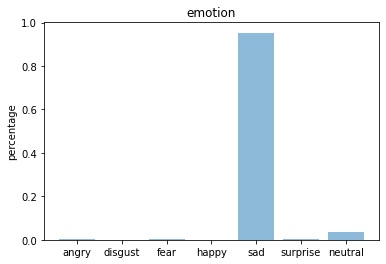

None


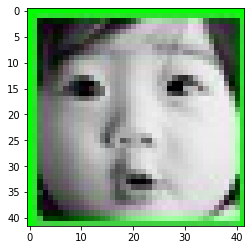

208
Image doesn't exist
209
Image doesn't exist
210


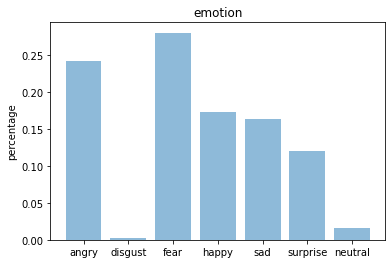

[[0.24243768 0.00220514 0.28090015 0.17320019 0.16438441 0.12103761
  0.01583481]]
0.28090015


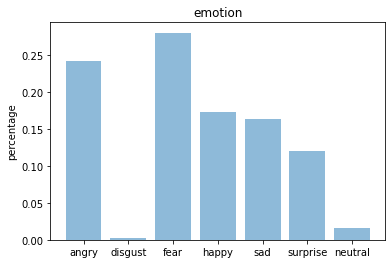

None


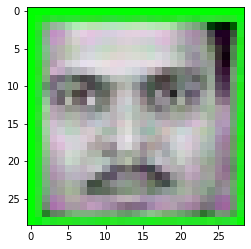

211


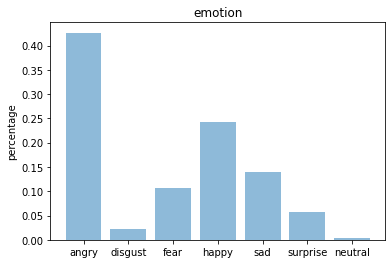

[[0.42634058 0.0230082  0.10716836 0.24332018 0.1389627  0.05752916
  0.00367077]]
0.42634058


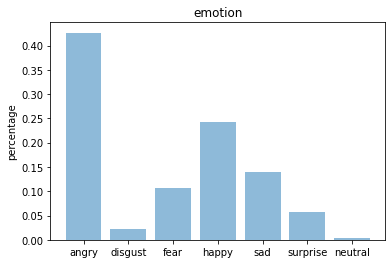

None


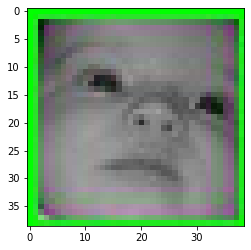

212


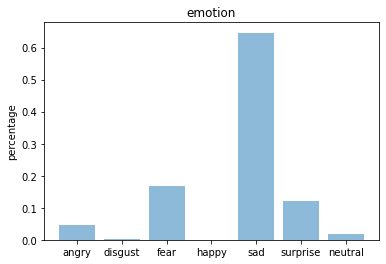

[[0.04480355 0.0029567  0.16825081 0.00064744 0.6463257  0.12006117
  0.01695462]]
0.6463257


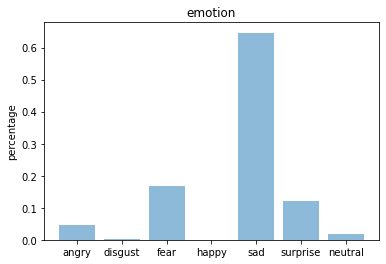

None


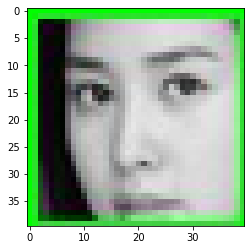

213
Image doesn't exist
214


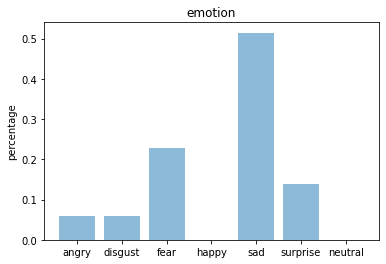

[[5.9851293e-02 5.8347363e-02 2.2793174e-01 2.3968909e-05 5.1454037e-01
  1.3923216e-01 7.3124720e-05]]
0.5145404


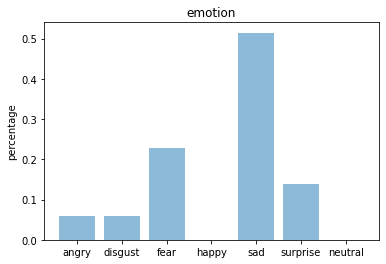

None


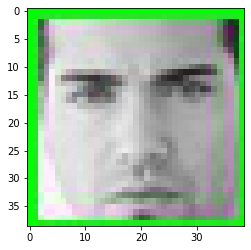

215


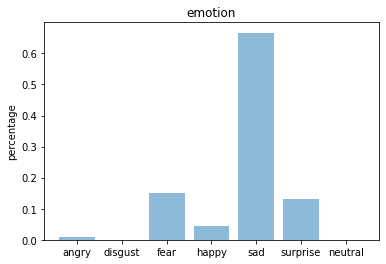

[[8.7105837e-03 1.9007281e-04 1.4940189e-01 4.4989616e-02 6.6642159e-01
  1.2973513e-01 5.5108342e-04]]
0.6664216


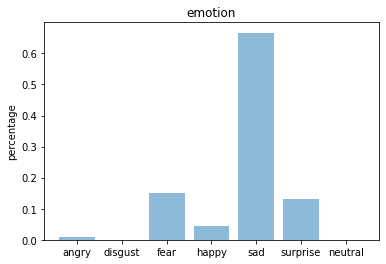

None


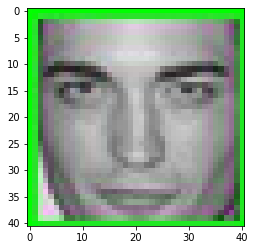

216


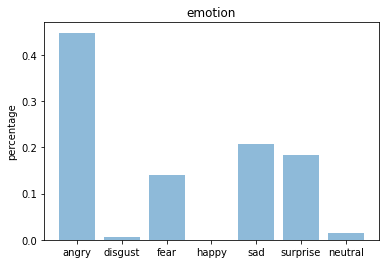

[[4.4806626e-01 6.8646539e-03 1.4024077e-01 9.7392840e-05 2.0735367e-01
  1.8373711e-01 1.3640119e-02]]
0.44806626


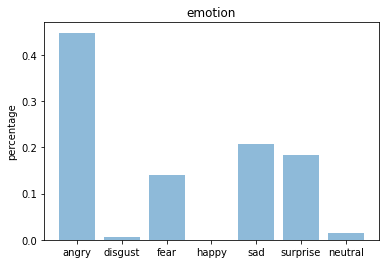

None


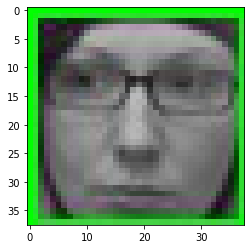

217


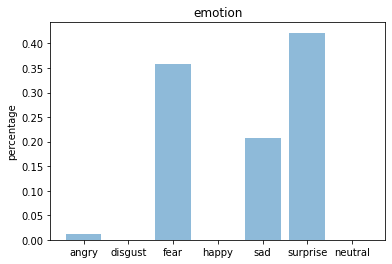

[[1.2477304e-02 4.8192960e-05 3.5827723e-01 1.6035314e-04 2.0722836e-01
  4.2180741e-01 1.0864750e-06]]
0.4218074


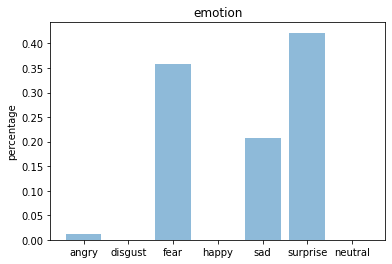

None


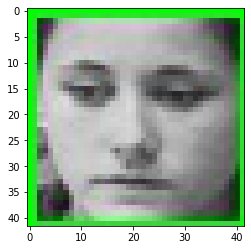

218
Image doesn't exist
219


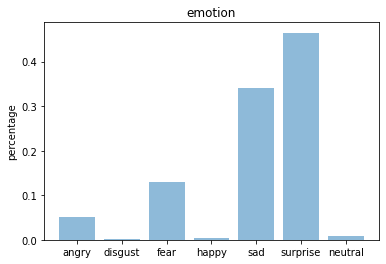

[[0.05198849 0.00141698 0.1296912  0.00298895 0.33989596 0.46468043
  0.009338  ]]
0.46468043


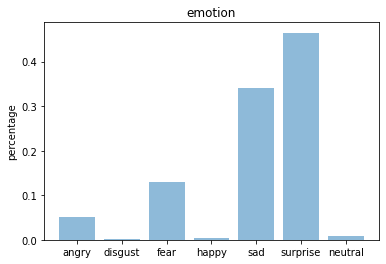

None


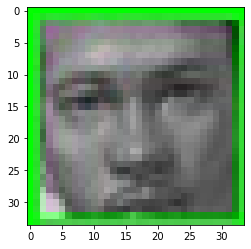

220


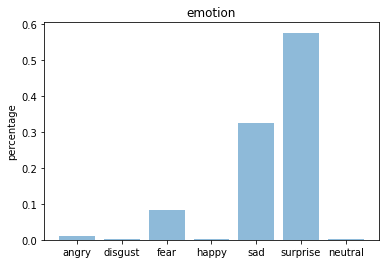

[[0.01180878 0.00093453 0.08262256 0.00138563 0.32484323 0.5756309
  0.00277433]]
0.5756309


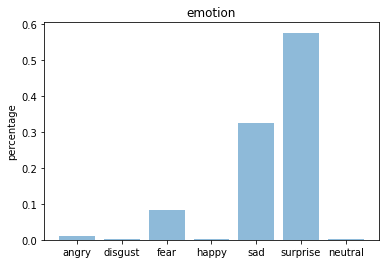

None


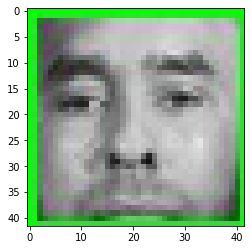

221
Image doesn't exist
222


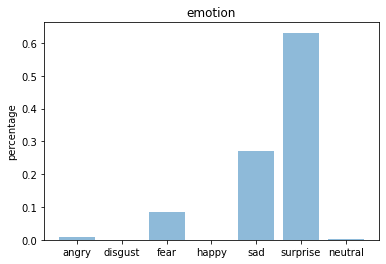

[[9.5748892e-03 5.0216313e-05 8.4939167e-02 2.1375695e-06 2.7000585e-01
  6.3150537e-01 3.9223176e-03]]
0.63150537


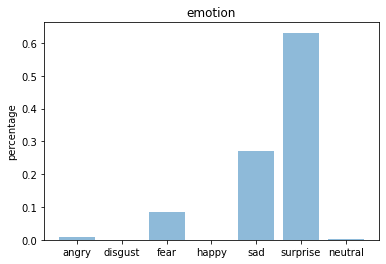

None


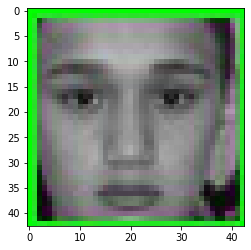

223
Image doesn't exist
224
Image doesn't exist
225


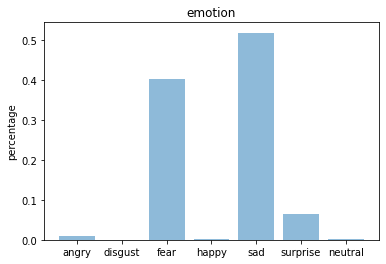

[[9.4959615e-03 1.7653307e-05 4.0337336e-01 1.6433269e-03 5.1868838e-01
  6.5831855e-02 9.4944617e-04]]
0.5186884


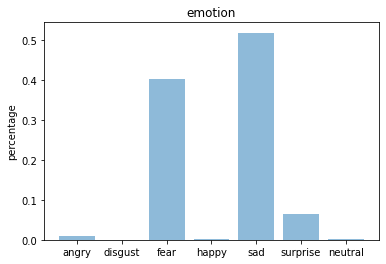

None


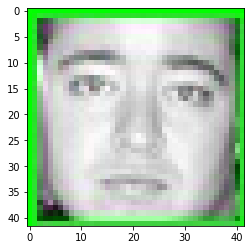

226
Image doesn't exist
227
Image doesn't exist
228
Image doesn't exist
229


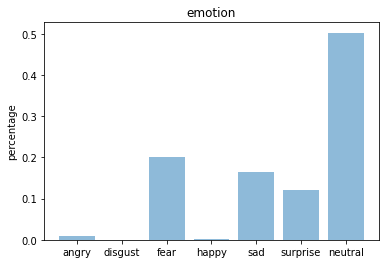

[[9.0405056e-03 3.0612757e-06 2.0208925e-01 1.1136637e-03 1.6387233e-01
  1.2071422e-01 5.0316697e-01]]
0.503167


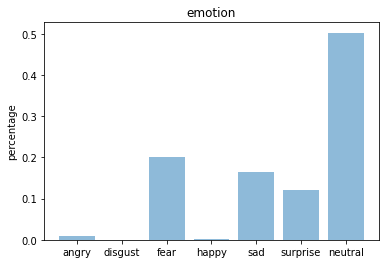

None


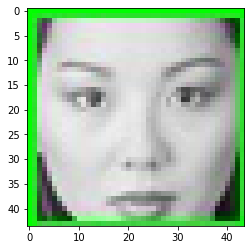

230
Image doesn't exist
231
Image doesn't exist
232
Image doesn't exist
233
Image doesn't exist
234


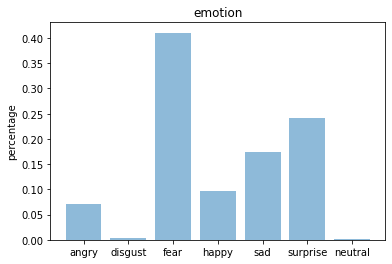

[[0.07104602 0.0028528  0.41044977 0.09728595 0.17499593 0.24145658
  0.0019129 ]]
0.41044977


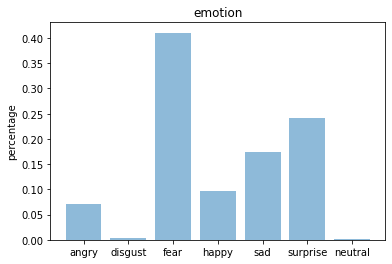

None


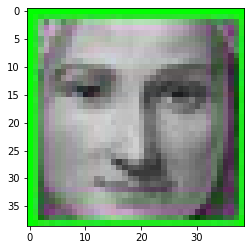

235


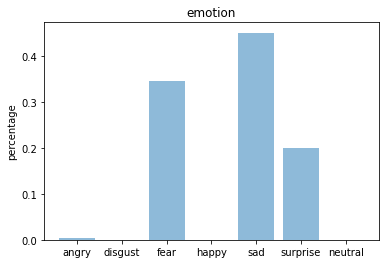

[[3.7257767e-03 7.1552888e-05 3.4524506e-01 2.8696766e-05 4.5077348e-01
  2.0005937e-01 9.6018739e-05]]
0.45077348


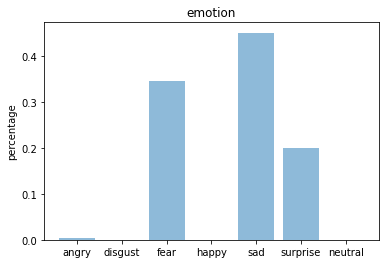

None


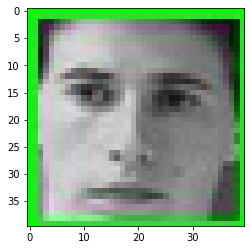

236
Image doesn't exist
237
Image doesn't exist
238
Image doesn't exist
239
Image doesn't exist
240


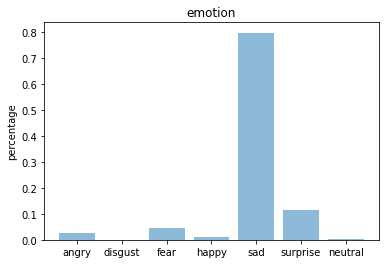

[[2.6424967e-02 1.0261436e-05 4.5874737e-02 1.1958203e-02 7.9911315e-01
  1.1489428e-01 1.7244479e-03]]
0.79911315


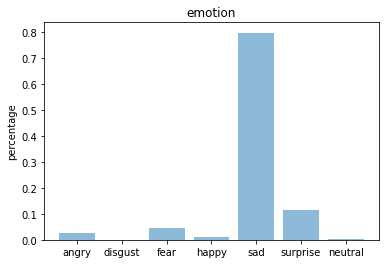

None


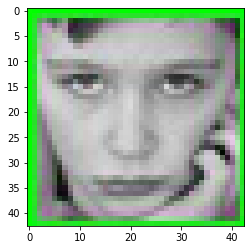

241
Image doesn't exist
242


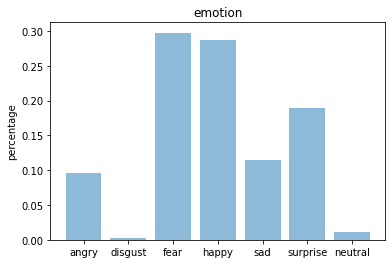

[[0.09594729 0.00292667 0.29761752 0.287005   0.11527161 0.1898038
  0.01142807]]
0.29761752


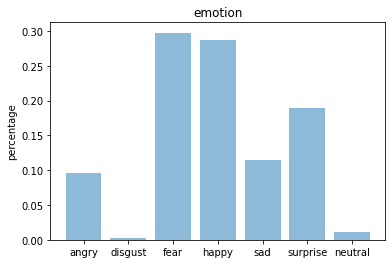

None


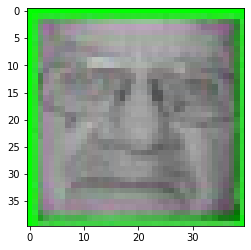

243


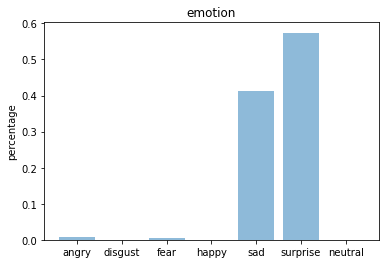

[[7.9628453e-03 1.7115966e-06 6.0162512e-03 1.6736992e-06 4.1180331e-01
  5.7418919e-01 2.5046647e-05]]
0.5741892


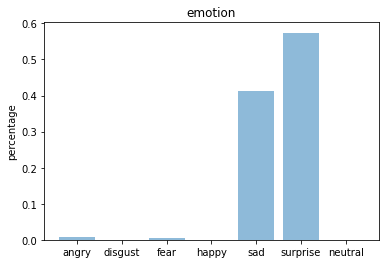

None


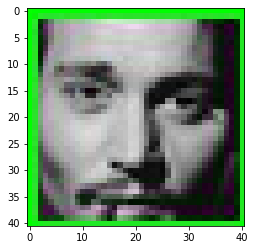

244
Image doesn't exist
245
Image doesn't exist
246


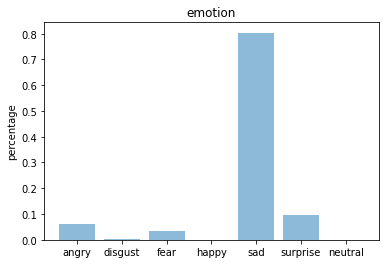

[[6.0058389e-02 4.6240916e-03 3.3279192e-02 2.6894695e-04 8.0367696e-01
  9.7839475e-02 2.5293289e-04]]
0.80367696


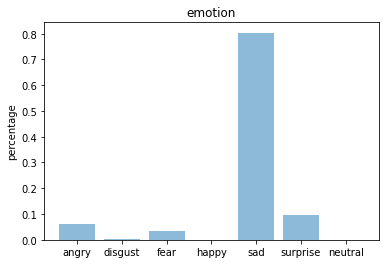

None


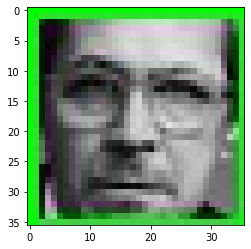

247
Image doesn't exist
248


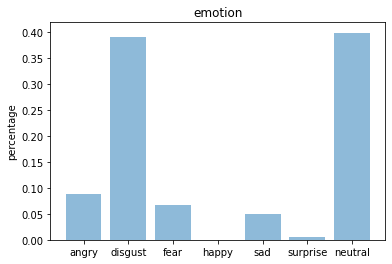

[[8.8425055e-02 3.9040086e-01 6.6315040e-02 1.4822654e-04 5.0278597e-02
  5.1143938e-03 3.9931789e-01]]
0.3993179


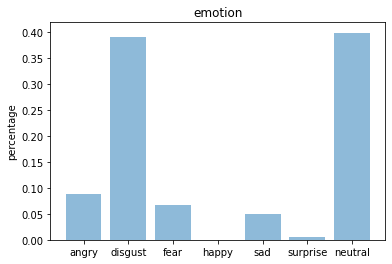

None


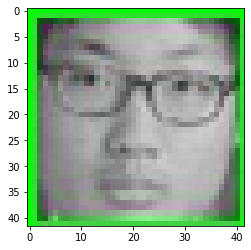

249
Image doesn't exist
250
Image doesn't exist
251


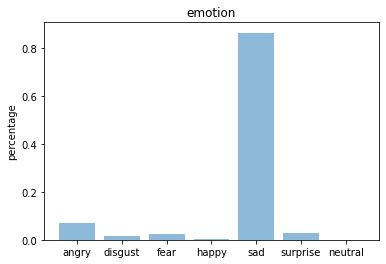

[[6.93609267e-02 1.48895895e-02 2.42065489e-02 2.03563902e-03
  8.62238228e-01 2.66697146e-02 5.99343271e-04]]
0.8622382


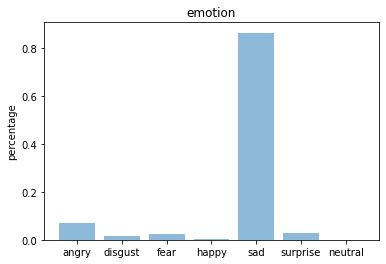

None


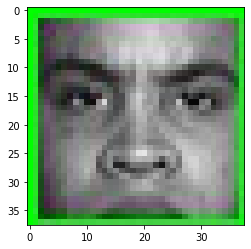

252


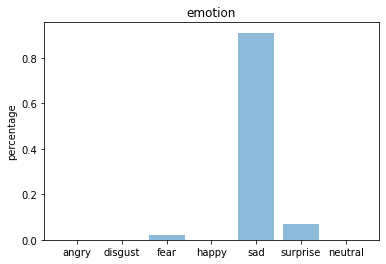

[[1.12098607e-03 1.66068673e-07 2.08814926e-02 1.05333456e-04
  9.09987926e-01 6.78866282e-02 1.74344332e-05]]
0.9099879


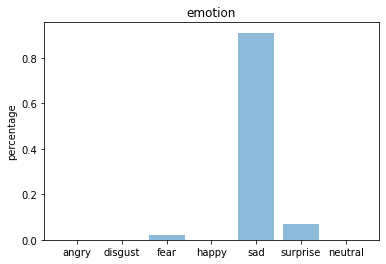

None


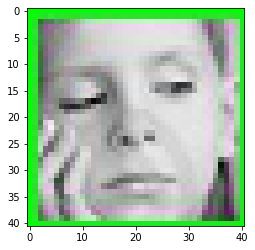

253
Image doesn't exist
254


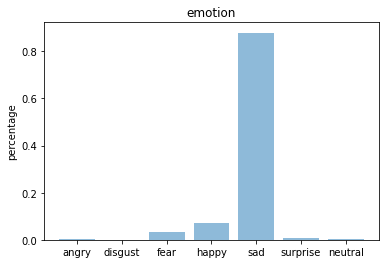

[[4.0522828e-03 4.1766500e-05 3.2879543e-02 6.9943056e-02 8.7895989e-01
  9.5015289e-03 4.6218345e-03]]
0.8789599


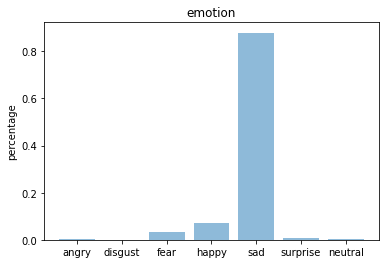

None


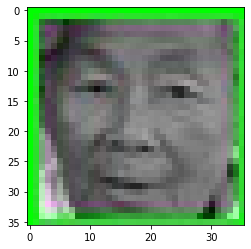

255


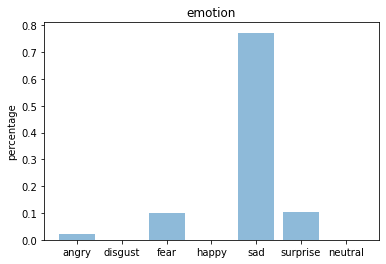

[[2.33707242e-02 1.83242355e-06 1.00788325e-01 4.39825908e-06
  7.72035360e-01 1.03703782e-01 9.55867145e-05]]
0.77203536


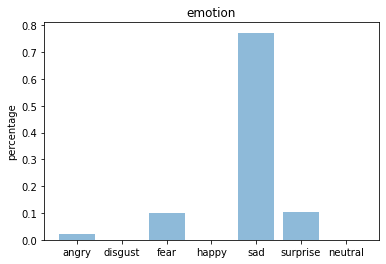

None


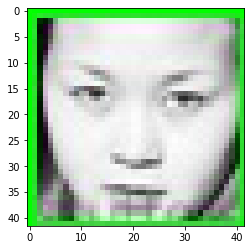

256
Image doesn't exist
257


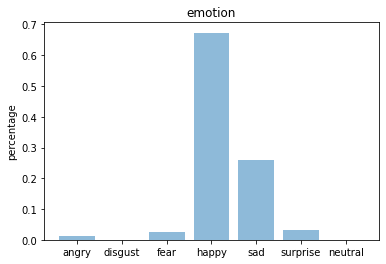

[[1.0834452e-02 2.7664642e-05 2.6952770e-02 6.7318660e-01 2.5813743e-01
  3.0379748e-02 4.8134266e-04]]
0.6731866


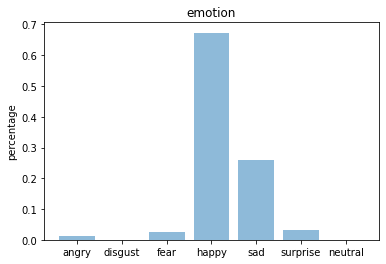

None


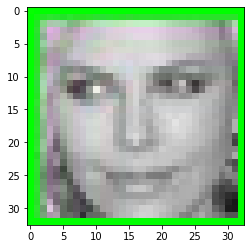

258
Image doesn't exist
259


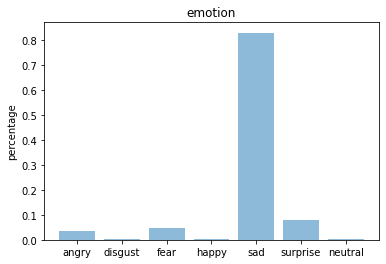

[[0.03414159 0.00132763 0.04738778 0.00151896 0.8311453  0.07985926
  0.0046195 ]]
0.8311453


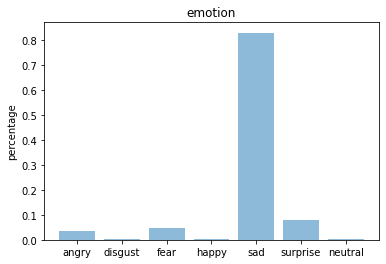

None


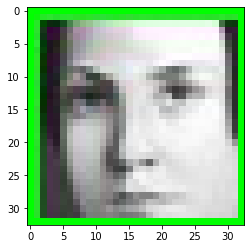

260


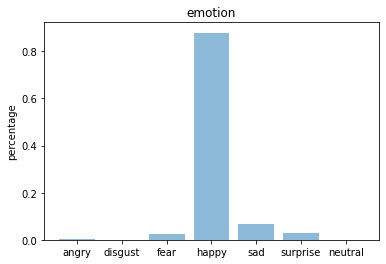

[[2.0455818e-03 1.0810441e-04 2.4427736e-02 8.7868243e-01 6.5610558e-02
  2.8763926e-02 3.6161472e-04]]
0.87868243


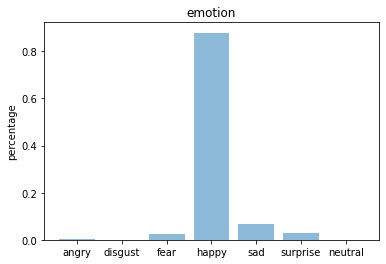

None


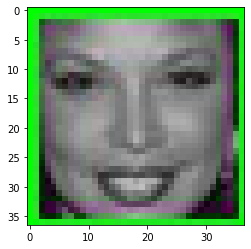

261
Image doesn't exist
262


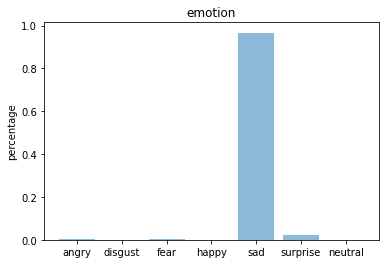

[[5.2435459e-03 5.6896142e-06 3.8403468e-03 8.6871056e-05 9.6645677e-01
  2.4202511e-02 1.6429370e-04]]
0.9664568


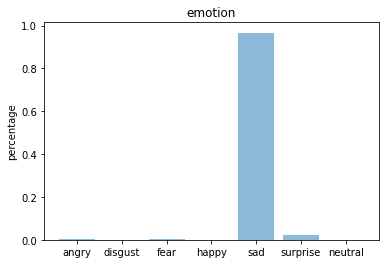

None


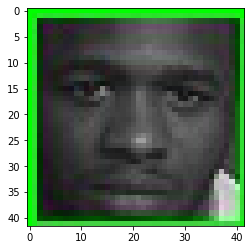

263
Image doesn't exist
264
Image doesn't exist
265


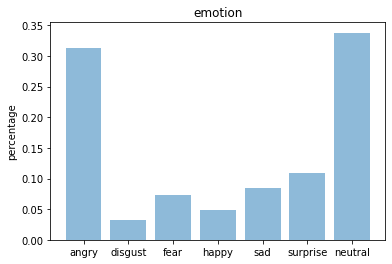

[[0.31360182 0.03262565 0.0724982  0.04940904 0.08444007 0.10958079
  0.33784443]]
0.33784443


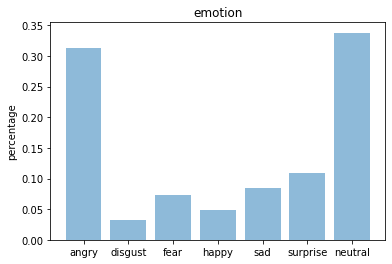

None


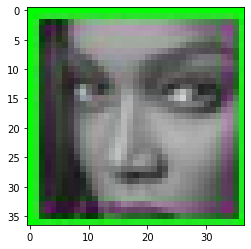

266
Image doesn't exist
267


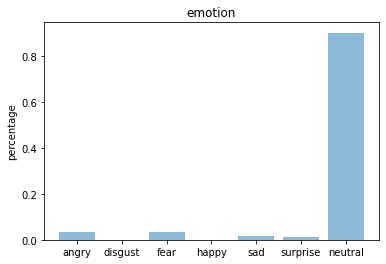

[[3.2905873e-02 7.1207440e-05 3.5681717e-02 1.3400456e-04 1.5882211e-02
  1.1532168e-02 9.0379280e-01]]
0.9037928


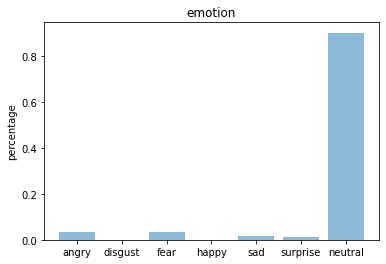

None


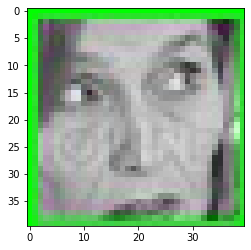

268


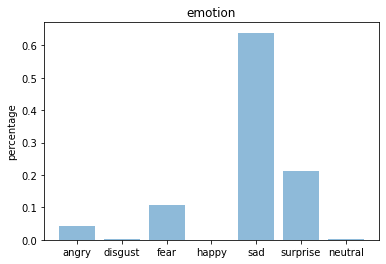

[[4.17621881e-02 9.88207757e-04 1.05871245e-01 3.22701148e-04
  6.38804853e-01 2.11121783e-01 1.12902152e-03]]
0.63880485


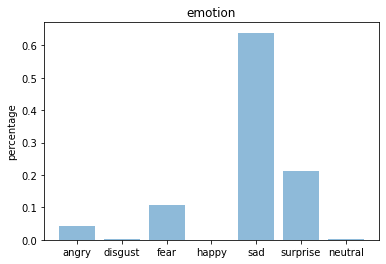

None


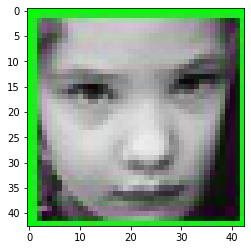

269


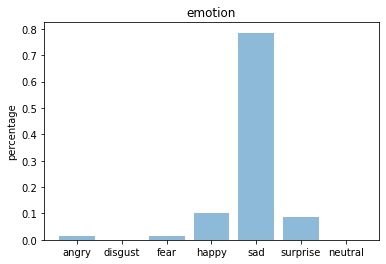

[[1.2826287e-02 4.9555342e-07 1.4655382e-02 1.0204827e-01 7.8554016e-01
  8.4917843e-02 1.1559565e-05]]
0.78554016


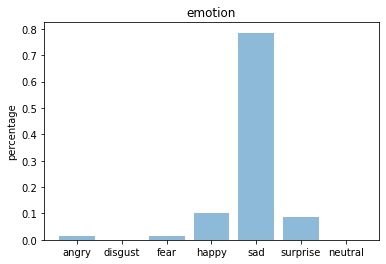

None


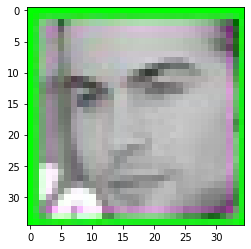

270
Image doesn't exist
271


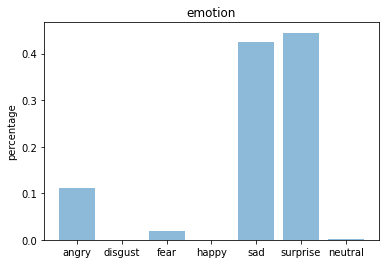

[[1.1056575e-01 3.0965020e-04 1.8996071e-02 1.2473091e-04 4.2453346e-01
  4.4471338e-01 7.5700431e-04]]
0.44471338


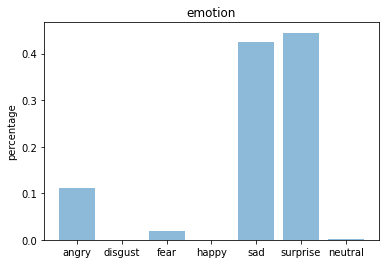

None


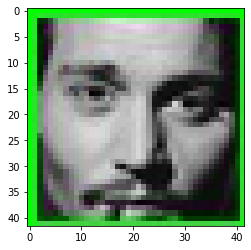

272


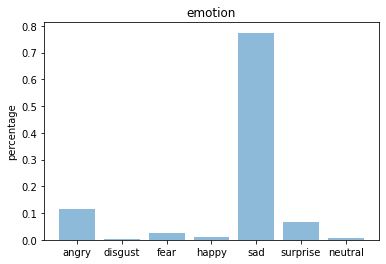

[[0.11416063 0.00441015 0.02355505 0.01012616 0.7742306  0.06506124
  0.00845621]]
0.7742306


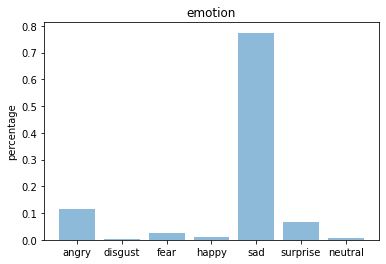

None


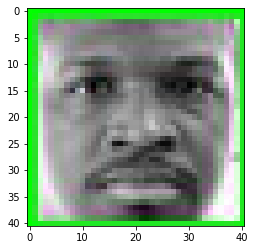

273
Image doesn't exist
274
Image doesn't exist
275
Image doesn't exist
276
Image doesn't exist
277


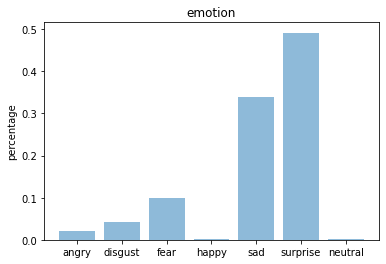

[[0.02197715 0.04202449 0.10020733 0.00134097 0.34009916 0.4915434
  0.00280752]]
0.4915434


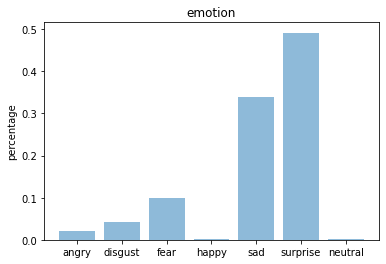

None


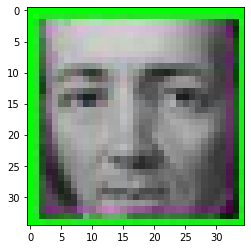

278


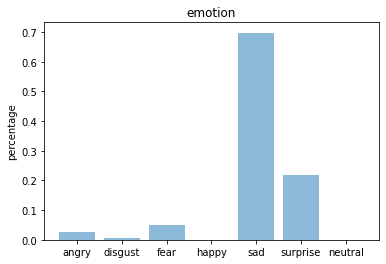

[[2.7306354e-02 6.7103463e-03 4.9065761e-02 6.5346377e-04 6.9770378e-01
  2.1834090e-01 2.1938157e-04]]
0.6977038


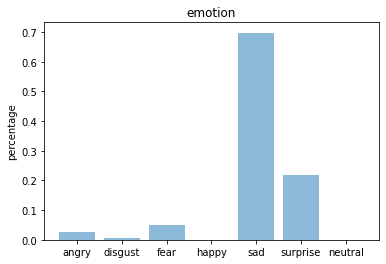

None


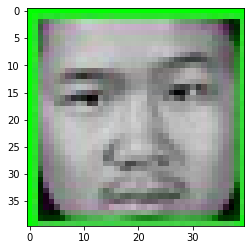

279
Image doesn't exist
280


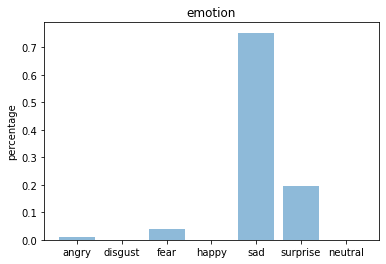

[[9.45568644e-03 5.80628409e-07 4.10559066e-02 4.15512877e-05
  7.53815889e-01 1.95521966e-01 1.08339635e-04]]
0.7538159


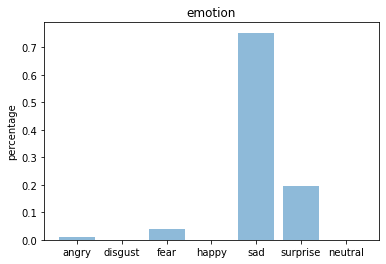

None


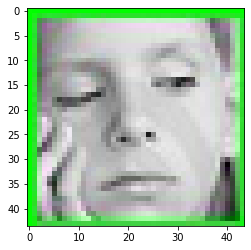

281


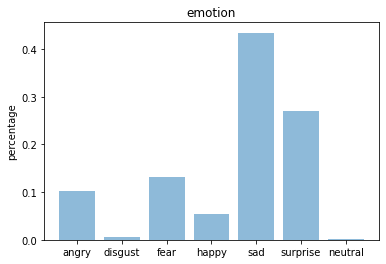

[[0.10224273 0.00622436 0.13182704 0.05465108 0.4343039  0.26929685
  0.00145403]]
0.4343039


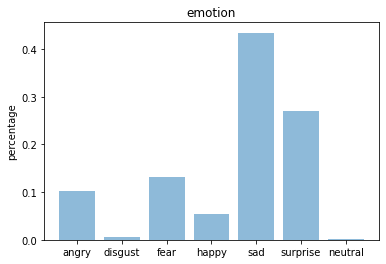

None


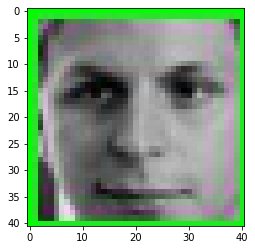

282


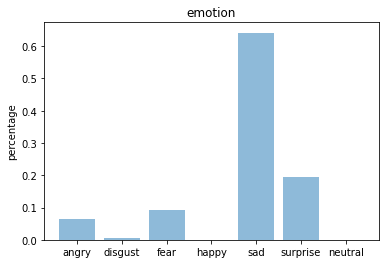

[[6.4272285e-02 5.8971867e-03 9.3530647e-02 4.7630360e-04 6.4182442e-01
  1.9386099e-01 1.3819593e-04]]
0.6418244


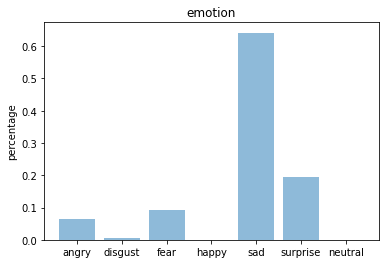

None


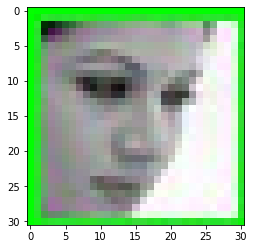

283
Image doesn't exist
284
Image doesn't exist
285
Image doesn't exist
286


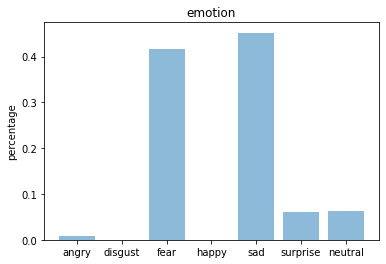

[[8.4250104e-03 2.5685222e-06 4.1636273e-01 5.1900446e-05 4.5201772e-01
  6.0940765e-02 6.2199350e-02]]
0.45201772


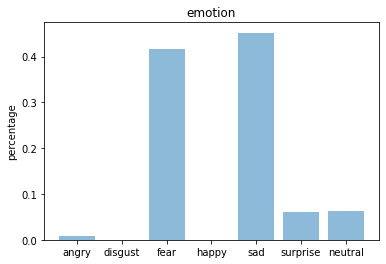

None


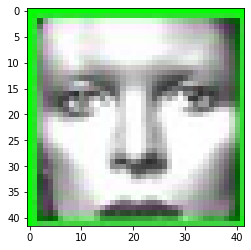

287


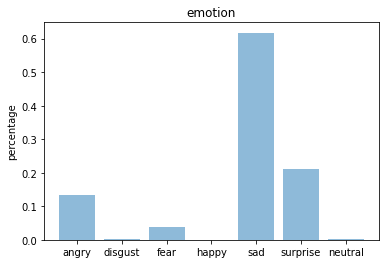

[[1.3248107e-01 1.7965661e-03 3.7021115e-02 2.1597336e-05 6.1756700e-01
  2.0991211e-01 1.2006052e-03]]
0.617567


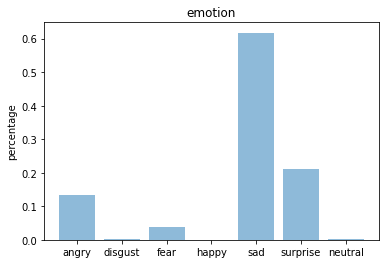

None


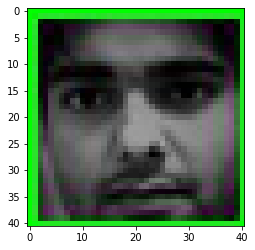

288
Image doesn't exist
289


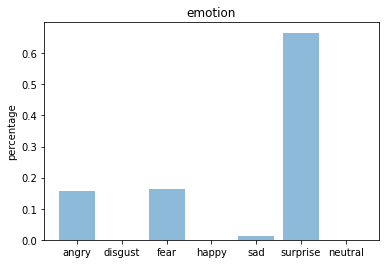

[[1.5698390e-01 7.5251017e-05 1.6239563e-01 7.7547680e-05 1.3714973e-02
  6.6596526e-01 7.8748347e-04]]
0.66596526


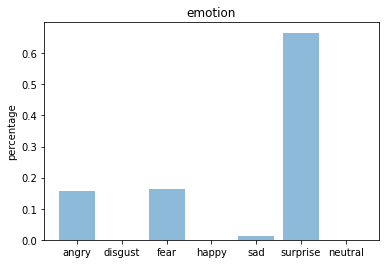

None


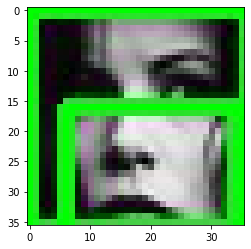

290


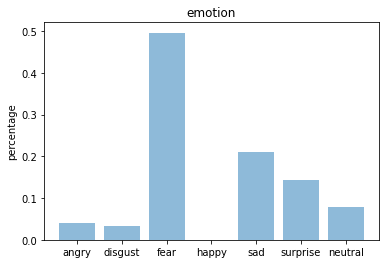

[[3.9075896e-02 3.4031492e-02 4.9623978e-01 1.8906880e-04 2.0950893e-01
  1.4351083e-01 7.7444002e-02]]
0.49623978


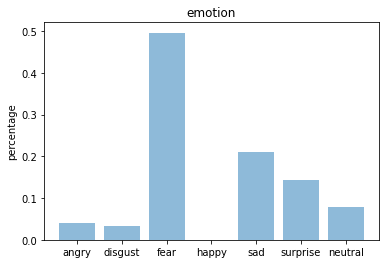

None


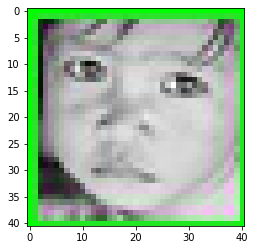

291
Image doesn't exist
292
Image doesn't exist
293


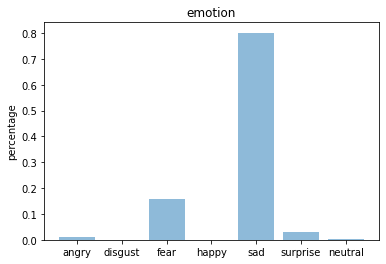

[[8.9174267e-03 7.3064217e-07 1.5647711e-01 9.4633997e-06 8.0095655e-01
  3.0855434e-02 2.7833174e-03]]
0.80095655


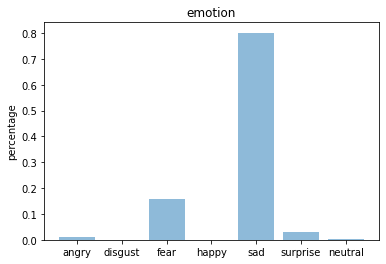

None


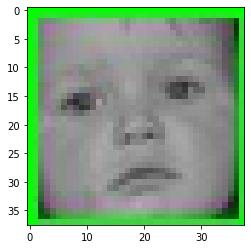

294


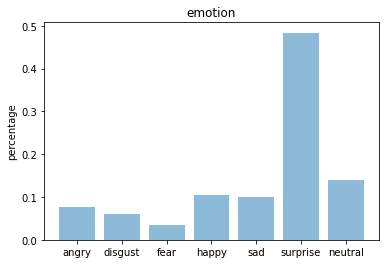

[[0.07562648 0.06008817 0.03430687 0.10579161 0.10059739 0.48375624
  0.13983321]]
0.48375624


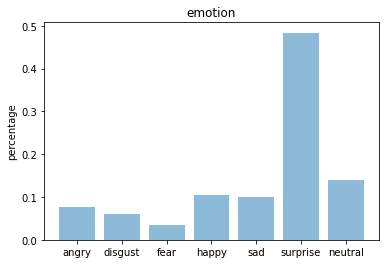

None


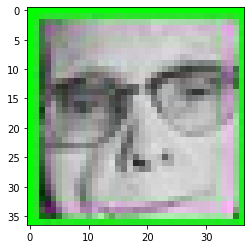

295
Image doesn't exist
296
Image doesn't exist
297


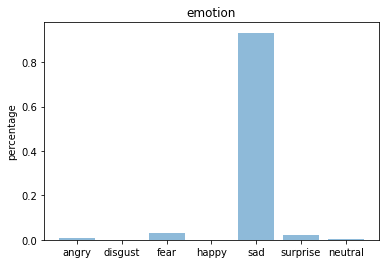

[[9.8182978e-03 3.7486101e-05 3.2063160e-02 7.0061346e-06 9.3274224e-01
  2.2259656e-02 3.0721661e-03]]
0.93274224


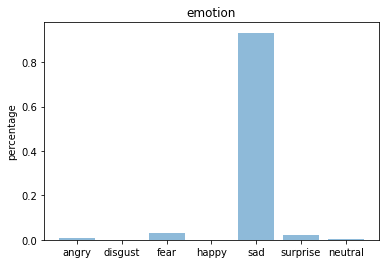

None


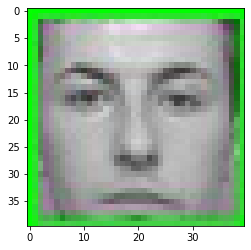

298
Image doesn't exist
299
Image doesn't exist
300


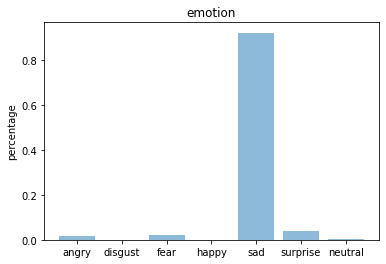

[[1.6812475e-02 6.1270716e-06 2.0630123e-02 1.7933150e-04 9.1984081e-01
  3.7361696e-02 5.1693651e-03]]
0.9198408


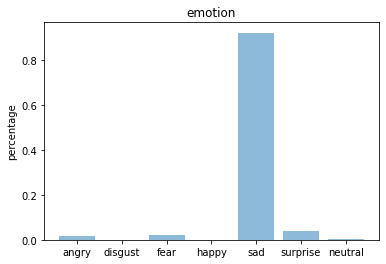

None


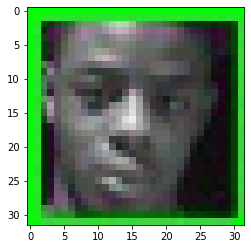

301
Image doesn't exist
302


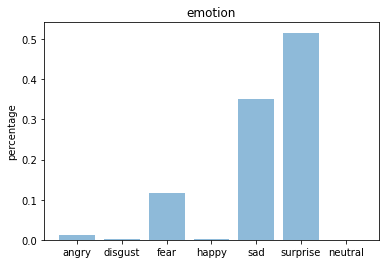

[[0.0112881  0.00149432 0.11555884 0.00281169 0.35188046 0.51628417
  0.00068243]]
0.51628417


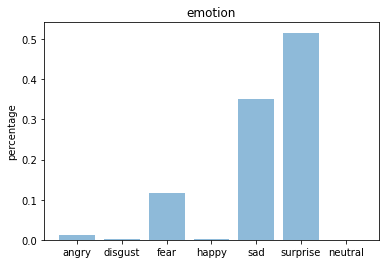

None


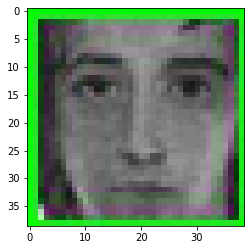

303


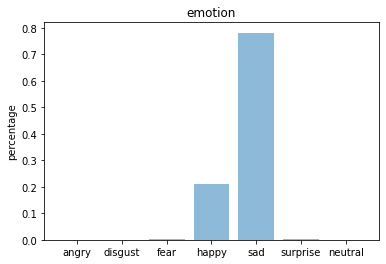

[[7.3651021e-04 3.3848219e-06 3.6038789e-03 2.1108855e-01 7.8125429e-01
  2.4278334e-03 8.8553666e-04]]
0.7812543


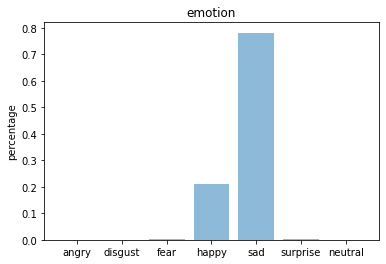

None


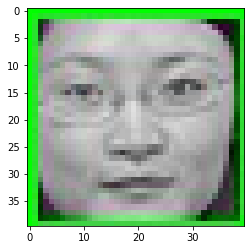

304
Image doesn't exist
305


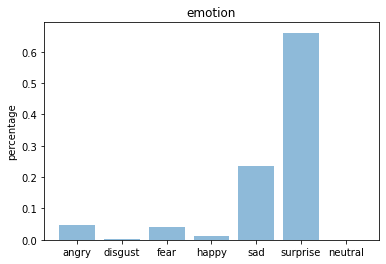

[[4.7707718e-02 1.0156140e-03 4.1020840e-02 1.3468404e-02 2.3589355e-01
  6.6087550e-01 1.8333621e-05]]
0.6608755


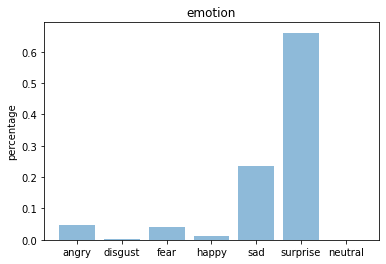

None


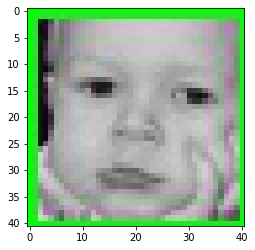

306


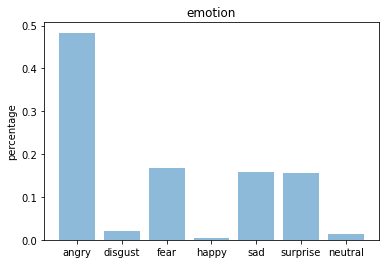

[[0.48348457 0.01945084 0.16664484 0.00317843 0.15764512 0.15509704
  0.01449917]]
0.48348457


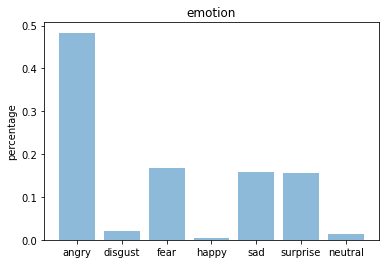

None


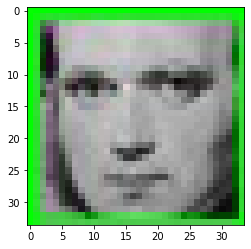

307


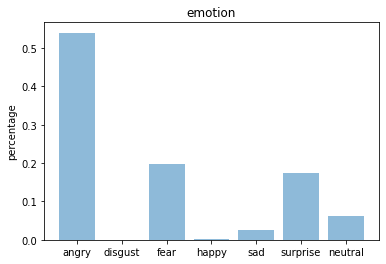

[[5.3962117e-01 2.0709925e-04 1.9690885e-01 1.5368821e-03 2.6782775e-02
  1.7415555e-01 6.0787667e-02]]
0.5396212


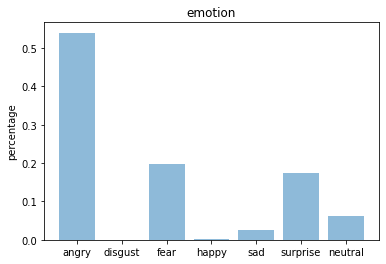

None


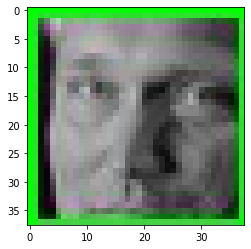

308
Image doesn't exist
309
Image doesn't exist
310
Image doesn't exist
311


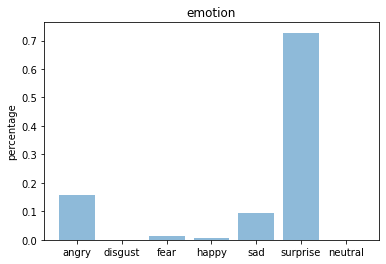

[[1.5774584e-01 5.2706702e-05 1.2112811e-02 6.9773444e-03 9.4980218e-02
  7.2749472e-01 6.3640205e-04]]
0.7274947


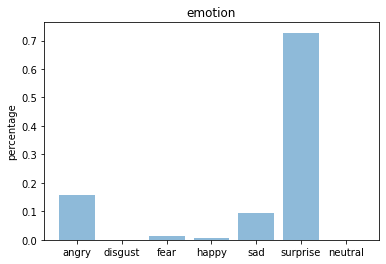

None


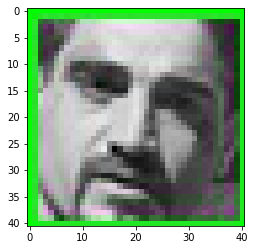

312


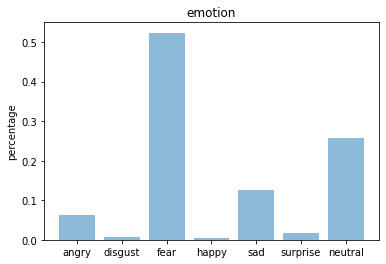

[[0.0622373  0.00729396 0.52358246 0.00439098 0.12619077 0.01777757
  0.25852698]]
0.52358246


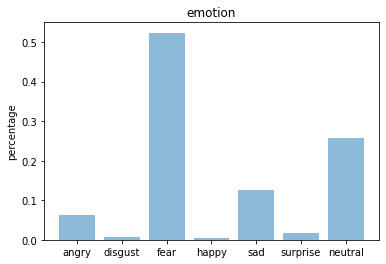

None


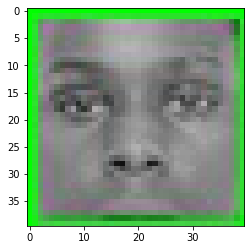

313


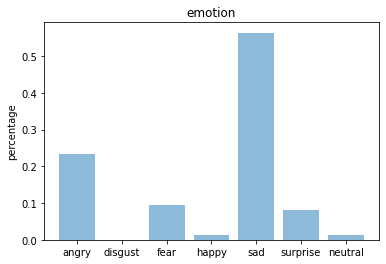

[[2.3468584e-01 4.8467232e-04 9.5531344e-02 1.2615033e-02 5.6349498e-01
  8.0239840e-02 1.2948308e-02]]
0.563495


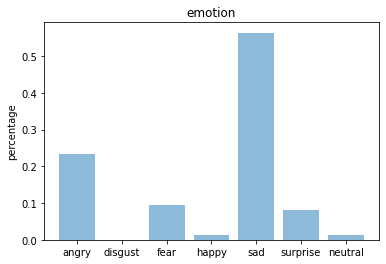

None


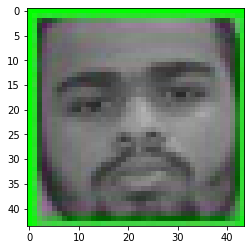

314
Image doesn't exist
315


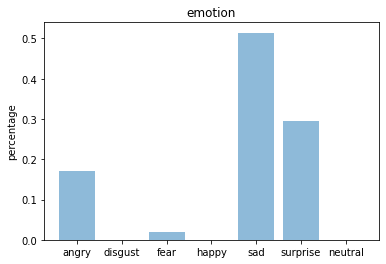

[[1.7129549e-01 5.9065397e-04 1.8792985e-02 5.3966488e-07 5.1430750e-01
  2.9493397e-01 7.8872697e-05]]
0.5143075


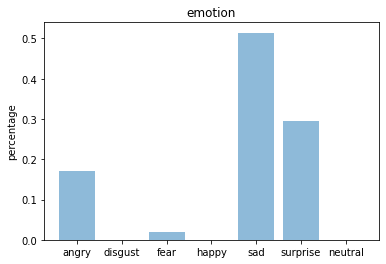

None


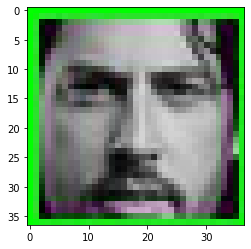

316
Image doesn't exist
317


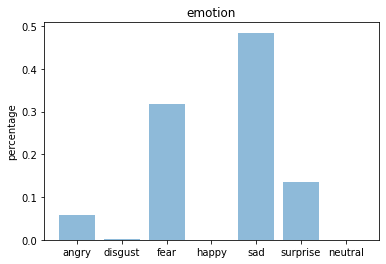

[[5.8153387e-02 1.4827742e-03 3.1877410e-01 4.9664077e-06 4.8460189e-01
  1.3640292e-01 5.7997892e-04]]
0.48460189


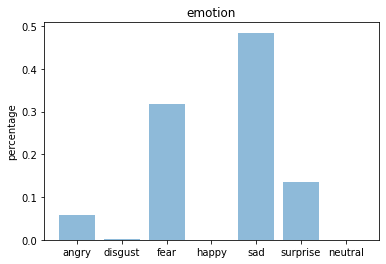

None


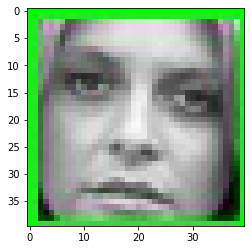

318
Image doesn't exist
319
Image doesn't exist
320


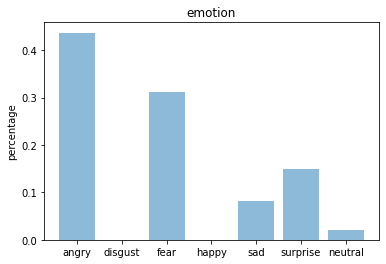

[[4.3659431e-01 4.2332194e-04 3.1179932e-01 6.1067185e-06 8.0812789e-02
  1.4944714e-01 2.0916982e-02]]
0.4365943


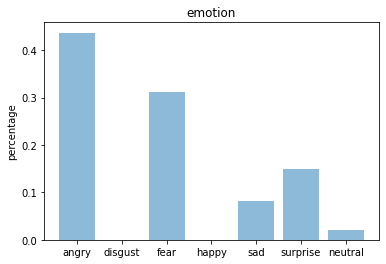

None


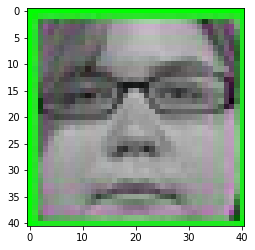

321


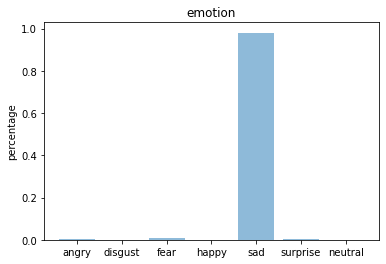

[[3.6142499e-03 8.1295648e-06 9.9150846e-03 9.6878023e-07 9.8074049e-01
  5.5943108e-03 1.2674331e-04]]
0.9807405


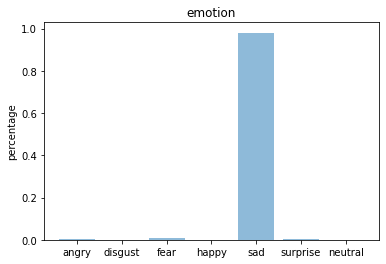

None


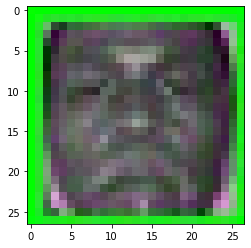

322


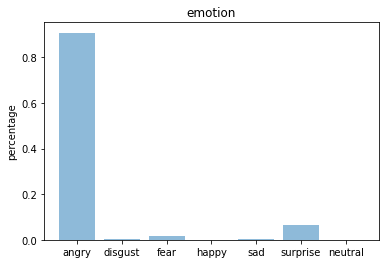

[[9.0823901e-01 5.3453087e-03 1.7376926e-02 3.5500252e-05 2.5055218e-03
  6.6325106e-02 1.7268547e-04]]
0.908239


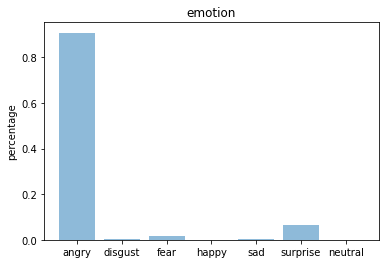

None


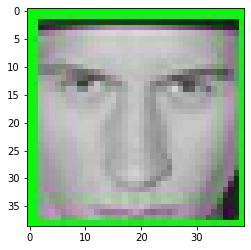

323
Image doesn't exist
324


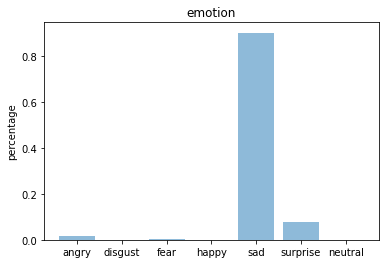

[[1.7643770e-02 2.9219154e-05 2.9246965e-03 9.0289368e-06 9.0232873e-01
  7.6853558e-02 2.1107827e-04]]
0.9023287


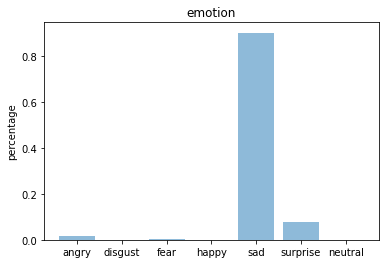

None


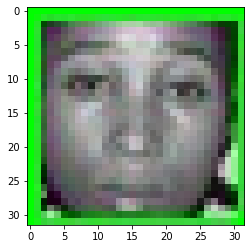

325
Image doesn't exist
326
Image doesn't exist
327
Image doesn't exist
328
Image doesn't exist
329
Image doesn't exist
330


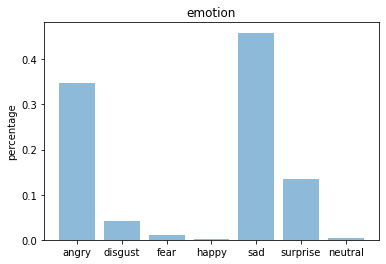

[[0.3483696  0.04154342 0.00985243 0.00096772 0.45910522 0.13541752
  0.00474405]]
0.45910522


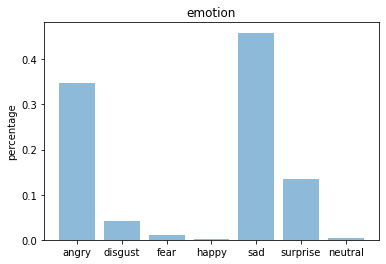

None


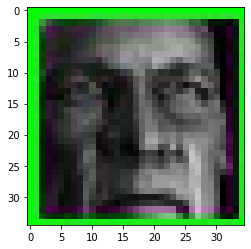

331
Image doesn't exist
332


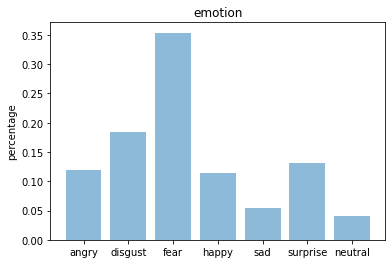

[[0.11995142 0.1842376  0.35371873 0.11473232 0.0541554  0.13195398
  0.04125052]]
0.35371873


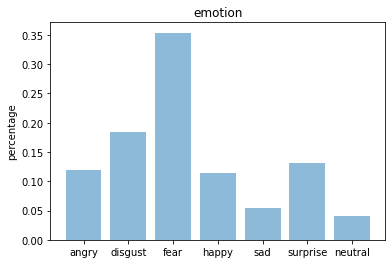

None


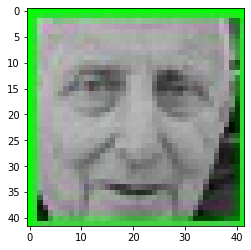

333
Image doesn't exist
334
Image doesn't exist
335


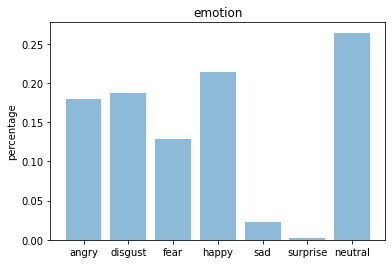

[[0.17987148 0.18782265 0.12813158 0.21380727 0.02312254 0.00279783
  0.26444668]]
0.26444668


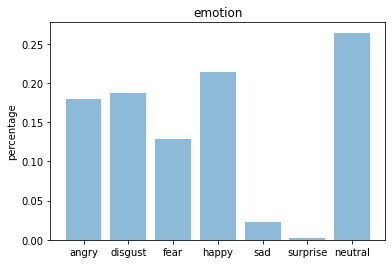

None


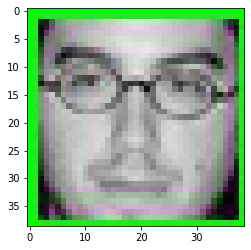

336


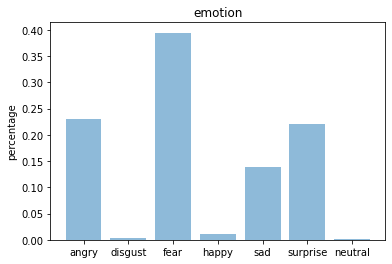

[[0.229543   0.00344579 0.39433202 0.01189167 0.13908002 0.2210311
  0.00067643]]
0.39433202


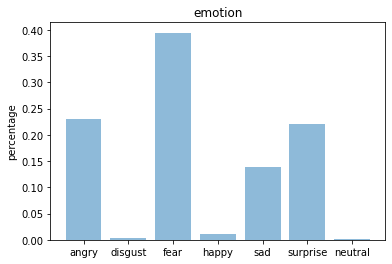

None


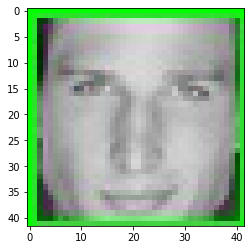

337


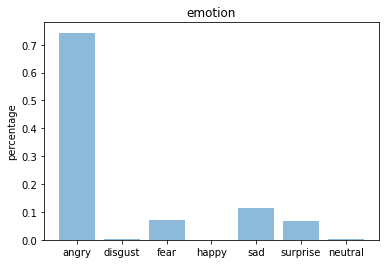

[[7.4292314e-01 1.0960436e-03 7.1512789e-02 6.5124553e-04 1.1495954e-01
  6.6517316e-02 2.3398725e-03]]
0.74292314


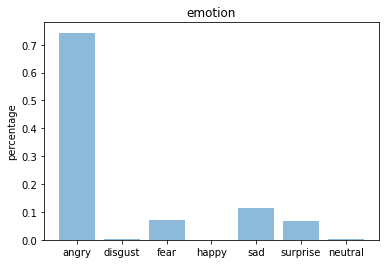

None


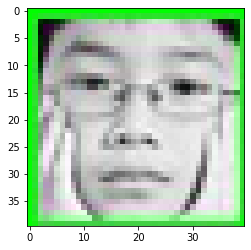

338


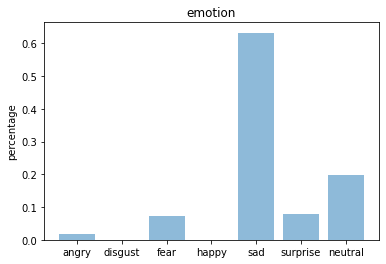

[[1.7564230e-02 1.0325388e-04 7.2827123e-02 3.1385134e-04 6.3212353e-01
  7.9875864e-02 1.9719212e-01]]
0.63212353


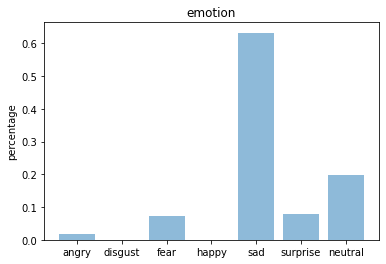

None


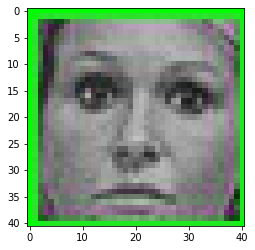

339


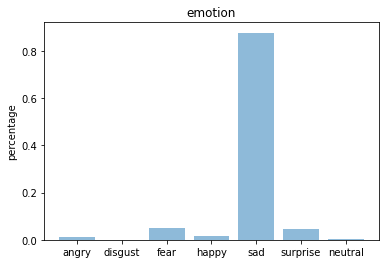

[[9.7636990e-03 2.4587294e-05 5.1554628e-02 1.6574187e-02 8.7674356e-01
  4.3962229e-02 1.3771077e-03]]
0.87674356


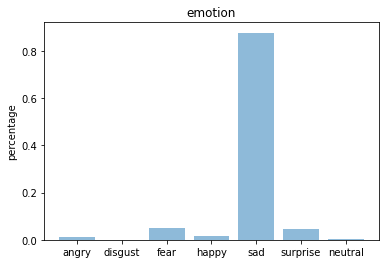

None


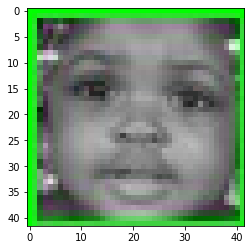

340
Image doesn't exist
341
Image doesn't exist
342
Image doesn't exist
343


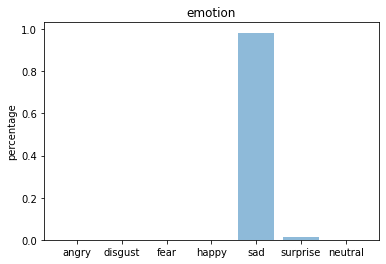

[[1.3784322e-04 8.7941814e-08 2.3657656e-05 9.0667140e-04 9.8333967e-01
  1.5591941e-02 9.0488662e-08]]
0.98333967


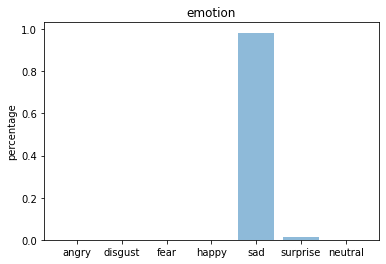

None


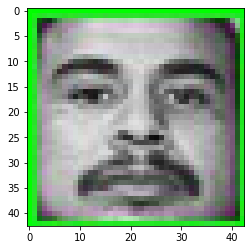

344
Image doesn't exist
345


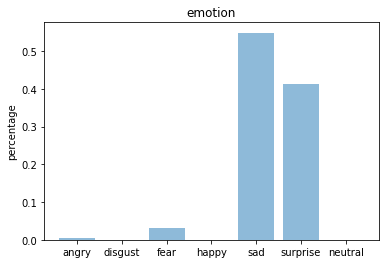

[[5.0928420e-03 6.4647393e-06 3.2348603e-02 1.1571605e-05 5.4909587e-01
  4.1288012e-01 5.6455686e-04]]
0.54909587


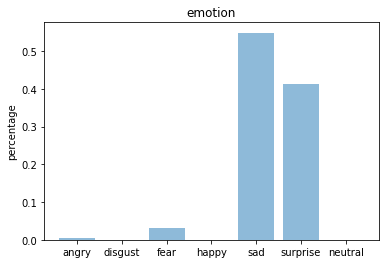

None


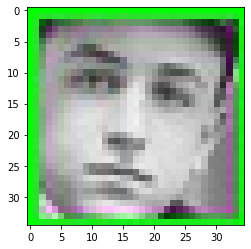

346
Image doesn't exist
347


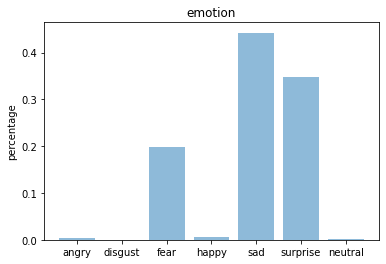

[[4.0055020e-03 2.7961147e-05 1.9859430e-01 5.9942077e-03 4.4262677e-01
  3.4764057e-01 1.1106787e-03]]
0.44262677


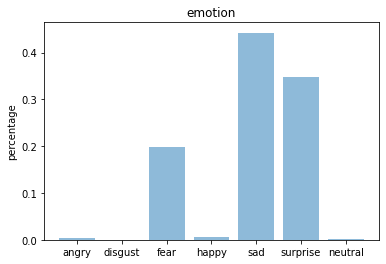

None


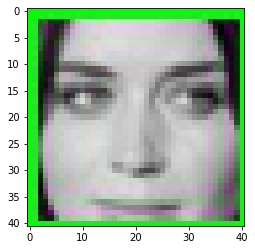

348


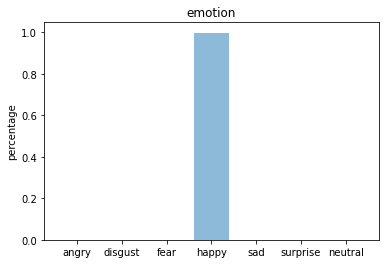

[[8.0069240e-06 3.4390729e-07 4.9915898e-06 9.9871135e-01 8.7040430e-04
  4.0156869e-04 3.3417546e-06]]
0.99871135


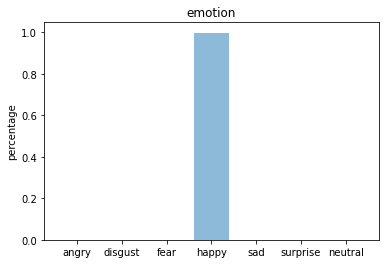

None


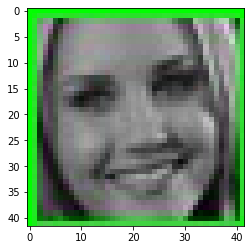

349


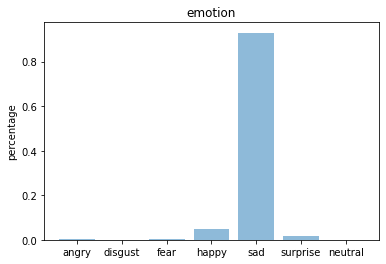

[[1.4577322e-03 6.9408350e-05 4.8105279e-03 4.7948774e-02 9.2936414e-01
  1.6077079e-02 2.7237178e-04]]
0.92936414


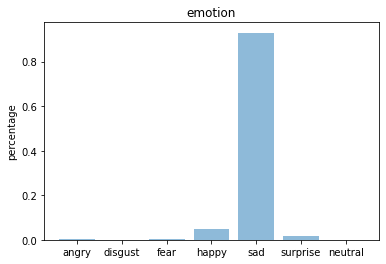

None


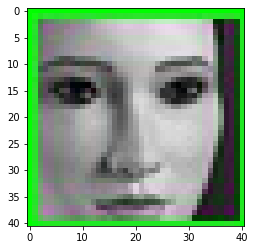

350
Image doesn't exist
351
Image doesn't exist
352


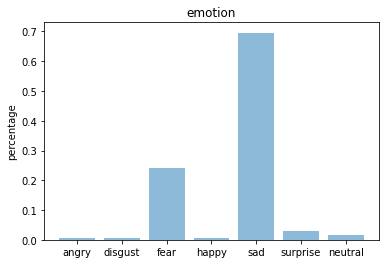

[[0.00480982 0.00753644 0.24007392 0.00514539 0.69574165 0.03103895
  0.01565382]]
0.69574165


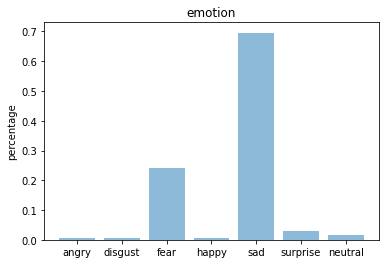

None


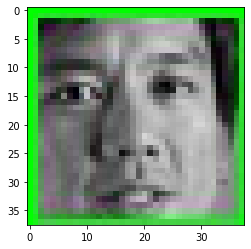

353


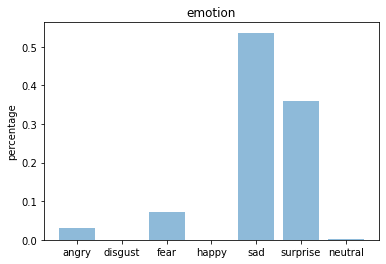

[[2.9394753e-02 2.3466072e-04 7.2989881e-02 2.7878798e-04 5.3676200e-01
  3.5948125e-01 8.5861358e-04]]
0.536762


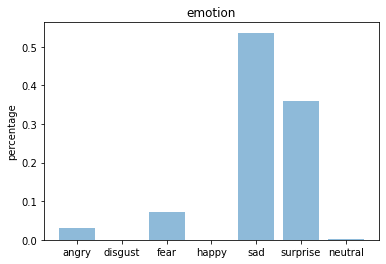

None


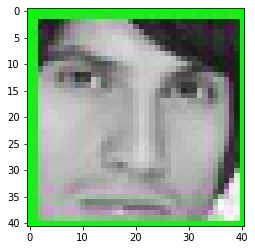

354
Image doesn't exist
355
Image doesn't exist
356
Image doesn't exist
357
Image doesn't exist
358
Image doesn't exist
359


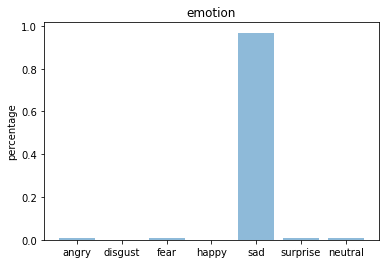

[[7.7626221e-03 1.2627086e-05 8.8178851e-03 2.5317087e-04 9.6842992e-01
  6.4014317e-03 8.3222697e-03]]
0.9684299


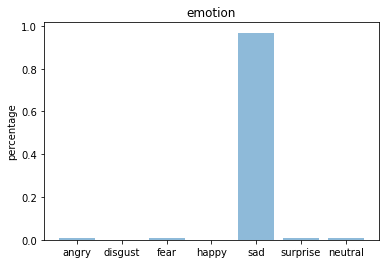

None


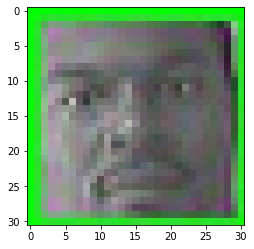

360


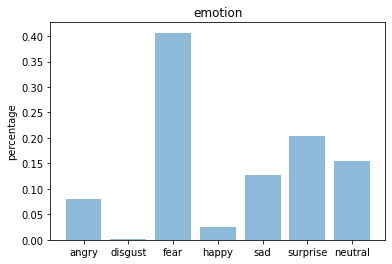

[[0.08007889 0.0013661  0.40658188 0.0260058  0.12720734 0.20444262
  0.15431741]]
0.40658188


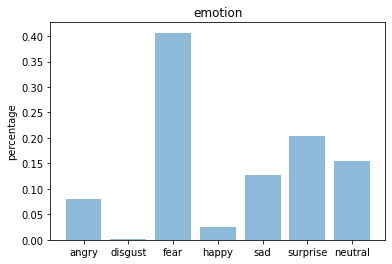

None


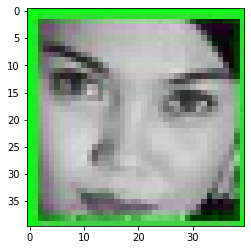

361


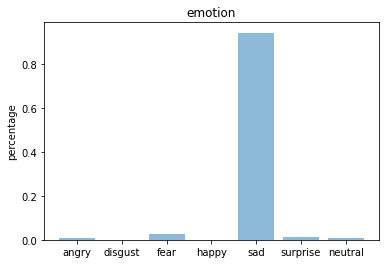

[[7.6661292e-03 3.8668004e-05 2.5085460e-02 3.4595694e-04 9.4419277e-01
  1.4704586e-02 7.9664597e-03]]
0.94419277


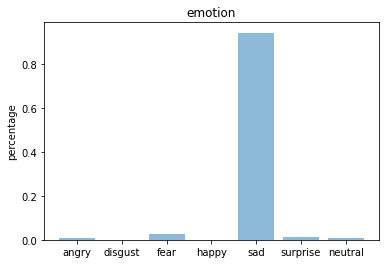

None


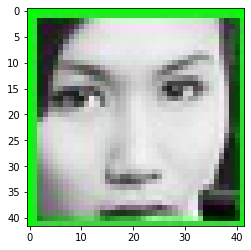

362
Image doesn't exist
363


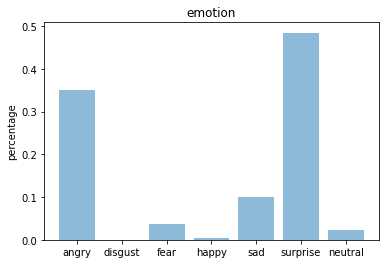

[[0.35070696 0.00055631 0.03681752 0.00394047 0.10059199 0.48447517
  0.02291162]]
0.48447517


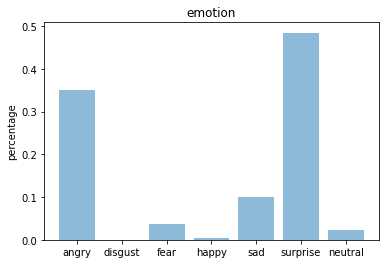

None


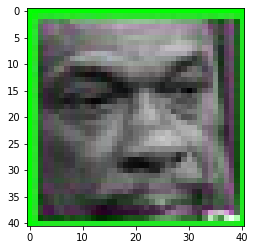

364
Image doesn't exist
365
Image doesn't exist
366


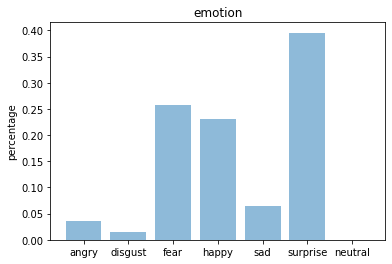

[[3.5990600e-02 1.4694338e-02 2.5770822e-01 2.3165675e-01 6.4225644e-02
  3.9556500e-01 1.5939801e-04]]
0.395565


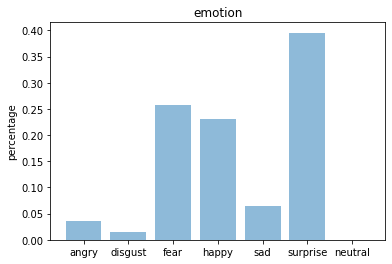

None


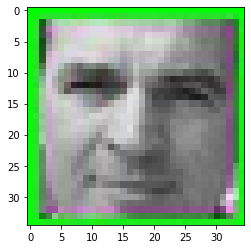

367
Image doesn't exist
368
Image doesn't exist
369
Image doesn't exist
370


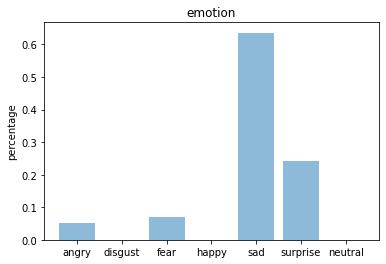

[[5.2297357e-02 4.3104831e-04 6.9328271e-02 3.1254339e-04 6.3591403e-01
  2.4145506e-01 2.6171631e-04]]
0.635914


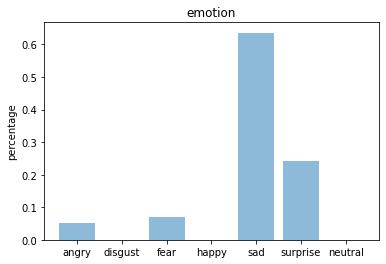

None


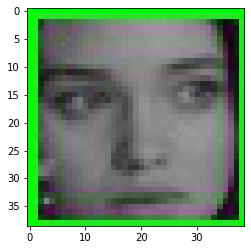

371
Image doesn't exist
372
Image doesn't exist
373
Image doesn't exist
374
Image doesn't exist
375


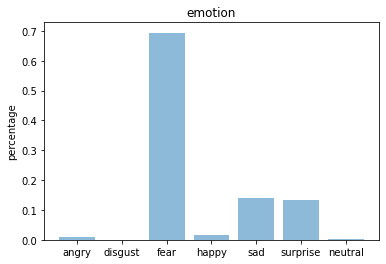

[[1.0067601e-02 1.4494087e-04 6.9402945e-01 1.7022470e-02 1.4148094e-01
  1.3441116e-01 2.8434205e-03]]
0.69402945


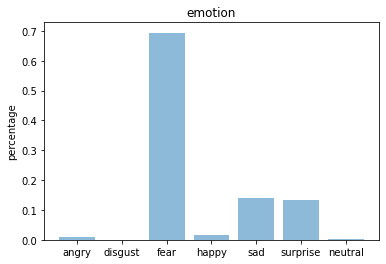

None


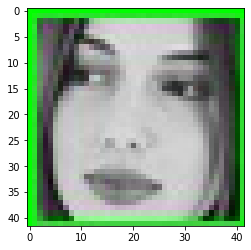

376
Image doesn't exist
377


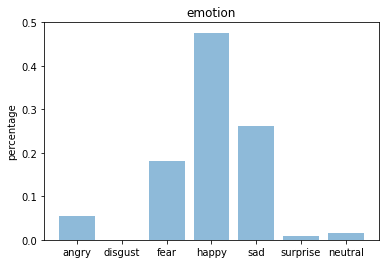

[[5.55748343e-02 2.59244611e-04 1.82218254e-01 4.76269662e-01
  2.62424111e-01 8.50263517e-03 1.47512825e-02]]
0.47626966


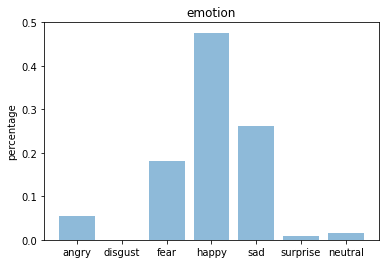

None


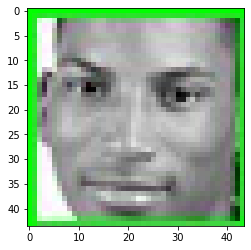

378


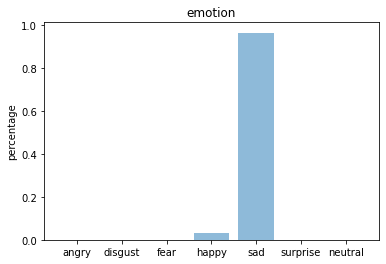

[[5.6414324e-04 3.7030350e-06 2.7721416e-04 3.3162791e-02 9.6470106e-01
  1.0134706e-03 2.7756943e-04]]
0.96470106


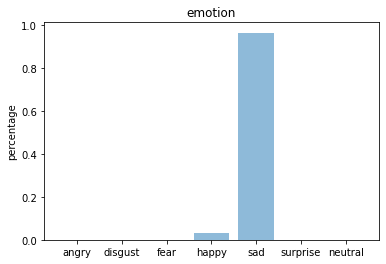

None


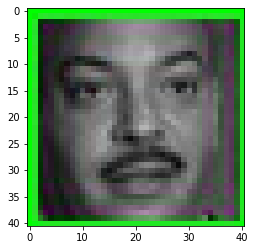

379
Image doesn't exist
380


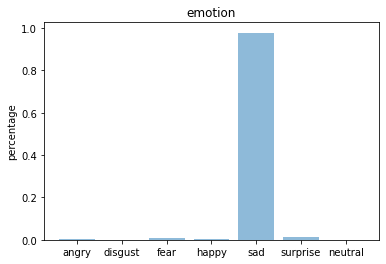

[[2.39688647e-03 9.64569972e-06 6.15437888e-03 2.53616343e-03
  9.77485001e-01 1.13228625e-02 9.50427930e-05]]
0.977485


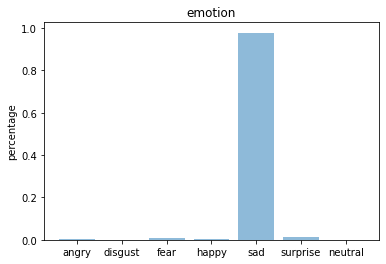

None


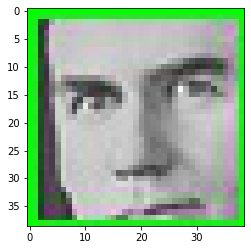

381


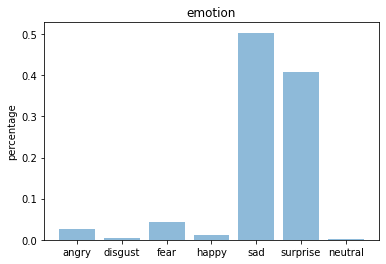

[[0.02650385 0.00479006 0.04237557 0.012393   0.5032557  0.40860325
  0.00207857]]
0.5032557


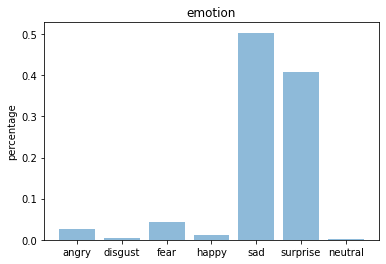

None


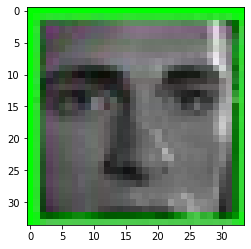

382
Image doesn't exist
383
Image doesn't exist
384
Image doesn't exist
385


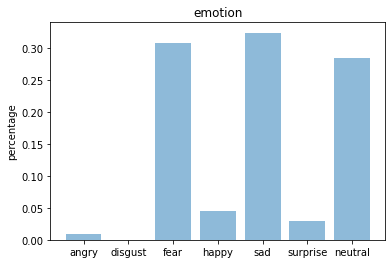

[[9.6661961e-03 1.7818778e-06 3.0761239e-01 4.5219760e-02 3.2442456e-01
  2.8838562e-02 2.8423673e-01]]
0.32442456


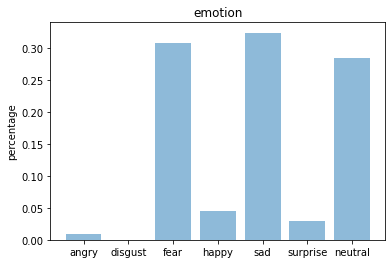

None


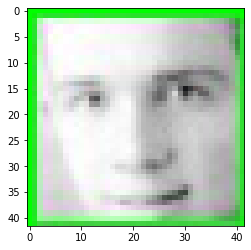

386


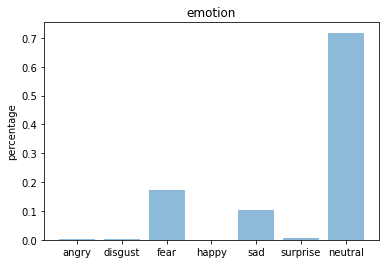

[[1.9166296e-03 1.2265343e-03 1.7091021e-01 4.5236127e-05 1.0341159e-01
  4.7704428e-03 7.1771938e-01]]
0.7177194


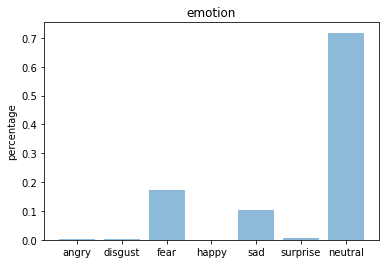

None


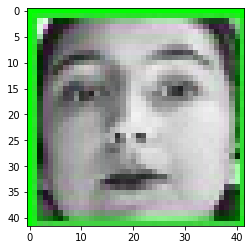

387


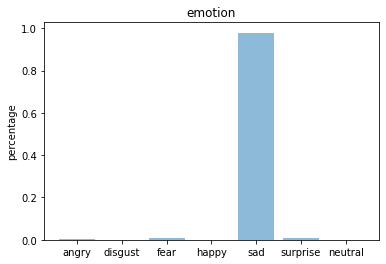

[[4.7229468e-03 2.7462112e-04 7.9623377e-03 1.1133039e-04 9.7908825e-01
  7.8385938e-03 1.9891411e-06]]
0.97908825


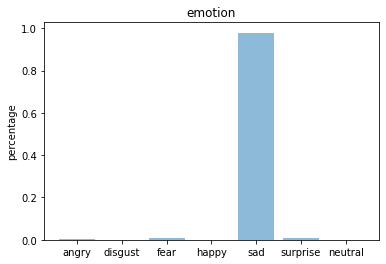

None


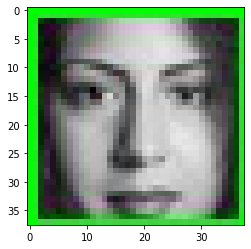

388
Image doesn't exist
389
Image doesn't exist
390
Image doesn't exist
391
Image doesn't exist
392
Image doesn't exist
393
Image doesn't exist
394
Image doesn't exist
395


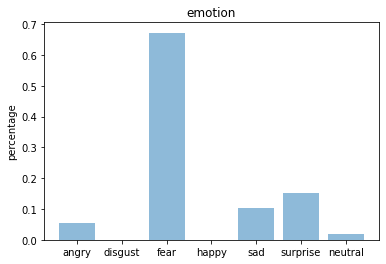

[[5.3812850e-02 4.5559622e-04 6.7247772e-01 5.3217687e-04 1.0248188e-01
  1.5059844e-01 1.9641437e-02]]
0.6724777


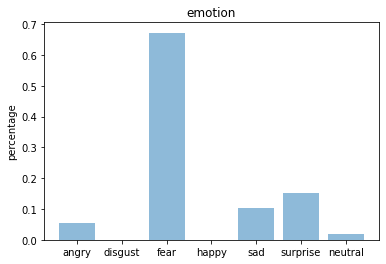

None


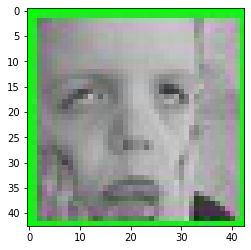

396
Image doesn't exist
397
Image doesn't exist
398
Image doesn't exist
399


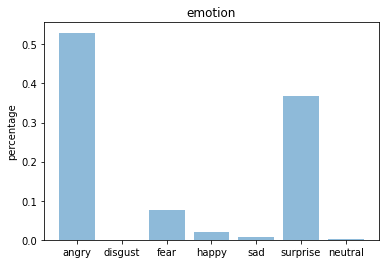

[[5.2966845e-01 9.8507126e-06 7.6826505e-02 1.9160300e-02 6.0753543e-03
  3.6680317e-01 1.4564241e-03]]
0.52966845


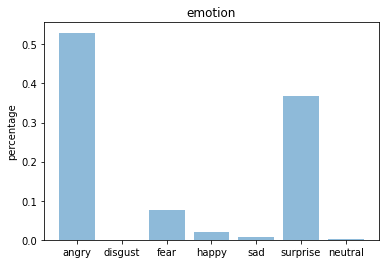

None


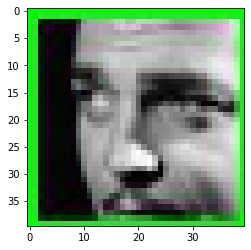

400


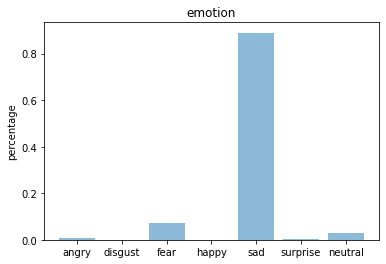

[[6.20440487e-03 1.09663425e-08 7.19665214e-02 3.72816867e-05
  8.89510810e-01 4.58892295e-03 2.76921764e-02]]
0.8895108


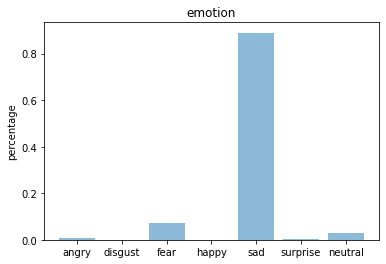

None


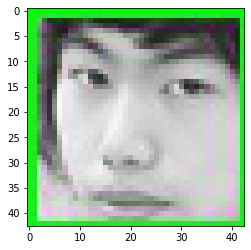

401
Image doesn't exist
402


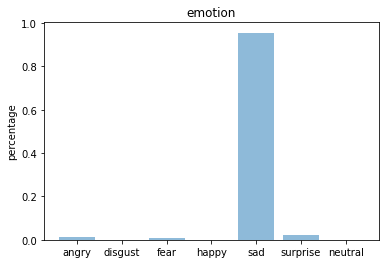

[[1.4171727e-02 2.9027706e-05 9.3155690e-03 8.4899296e-04 9.5508617e-01
  2.0488769e-02 5.9713064e-05]]
0.9550862


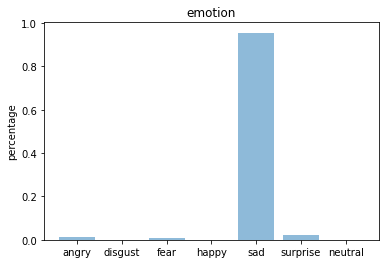

None


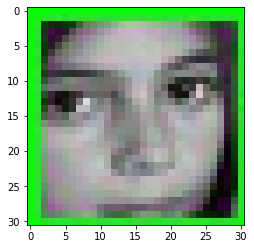

403


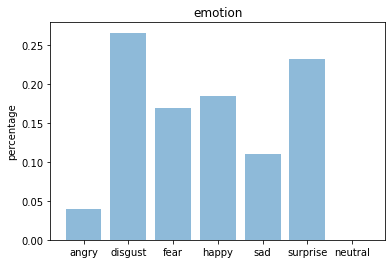

[[3.9091561e-02 2.6535568e-01 1.6931465e-01 1.8411838e-01 1.1029874e-01
  2.3162954e-01 1.9147713e-04]]
0.26535568


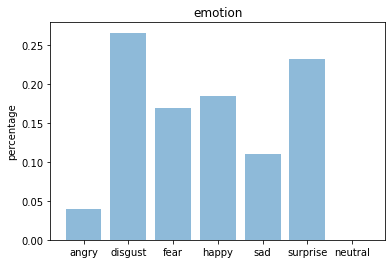

None


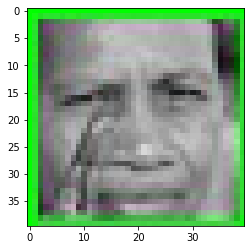

404


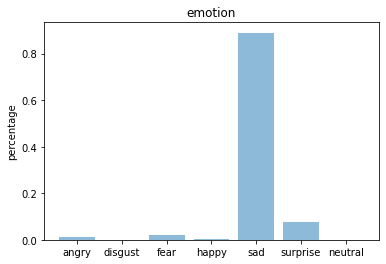

[[1.0952963e-02 1.9351662e-06 1.9590732e-02 3.7062755e-03 8.8935649e-01
  7.6205879e-02 1.8568352e-04]]
0.8893565


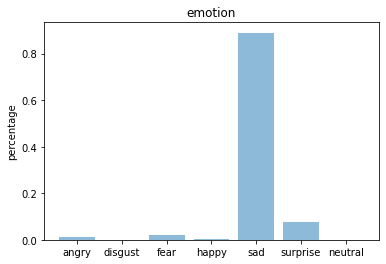

None


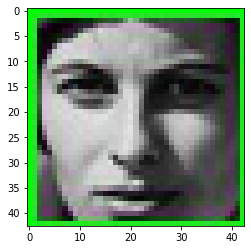

405
Image doesn't exist
406
Image doesn't exist
407
Image doesn't exist
408


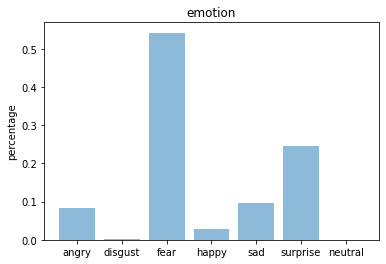

[[8.4257290e-02 9.2049479e-04 5.4271787e-01 2.8628763e-02 9.7148001e-02
  2.4632432e-01 3.3456654e-06]]
0.5427179


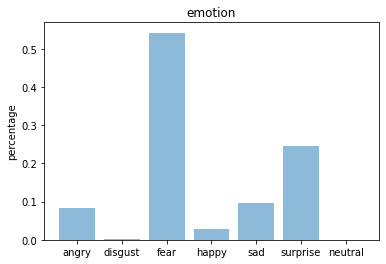

None


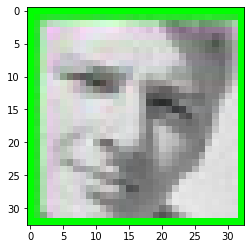

409
Image doesn't exist
410


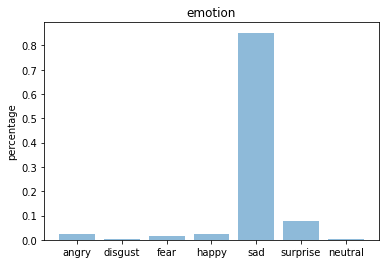

[[0.02344237 0.00334271 0.01669277 0.0245084  0.85241127 0.07652458
  0.00307791]]
0.85241127


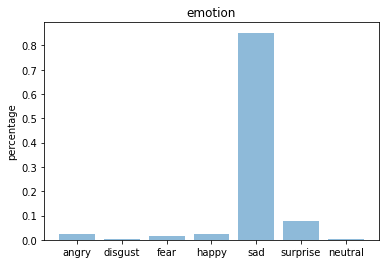

None


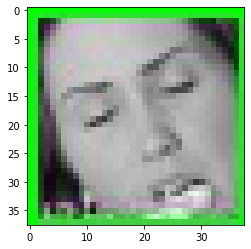

411
Image doesn't exist
412
Image doesn't exist
413


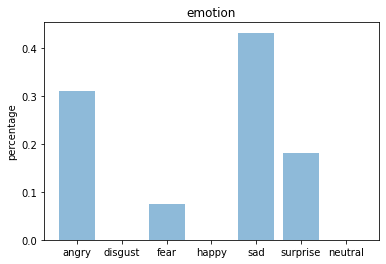

[[3.0971950e-01 9.9166660e-05 7.5683363e-02 1.7145112e-05 4.3231088e-01
  1.8201146e-01 1.5849508e-04]]
0.43231088


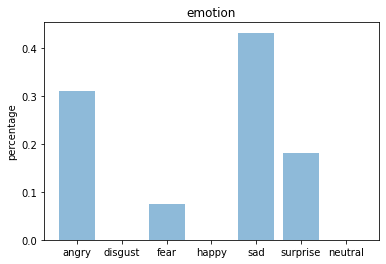

None


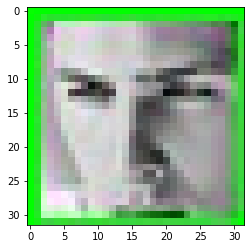

414


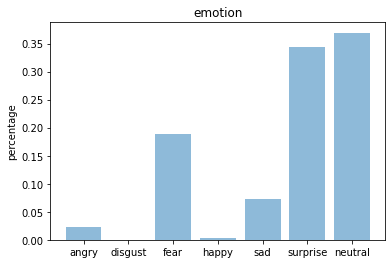

[[2.2534087e-02 2.4676582e-04 1.8935886e-01 2.8155711e-03 7.2145313e-02
  3.4365952e-01 3.6923984e-01]]
0.36923984


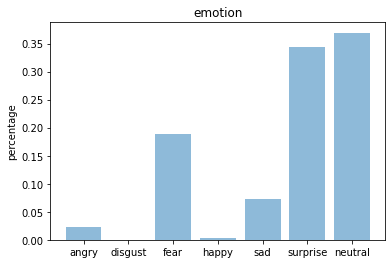

None


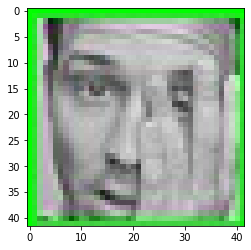

415
Image doesn't exist
416
Image doesn't exist
417
Image doesn't exist
418


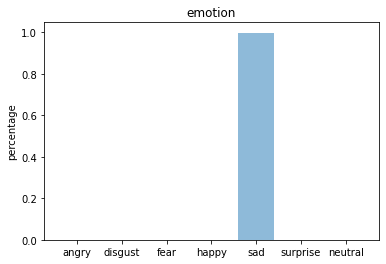

[[9.2658636e-05 4.0710755e-09 1.6416189e-04 6.5348024e-04 9.9823749e-01
  8.3563506e-04 1.6523709e-05]]
0.9982375


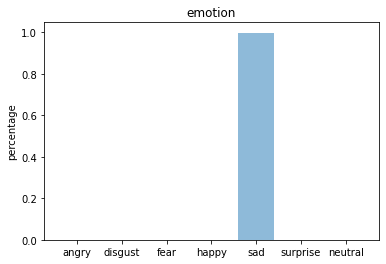

None


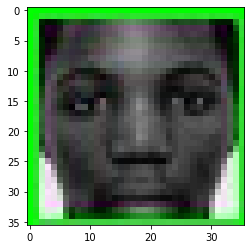

419
Image doesn't exist
420


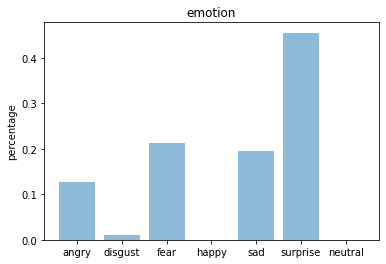

[[1.2672009e-01 1.0324421e-02 2.1201976e-01 2.9318005e-07 1.9607057e-01
  4.5481303e-01 5.1825988e-05]]
0.45481303


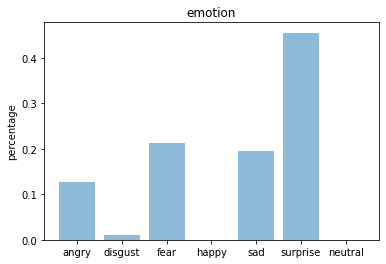

None


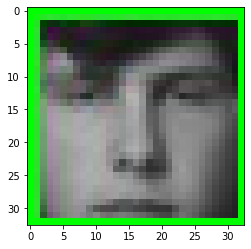

421
Image doesn't exist
422
Image doesn't exist
423


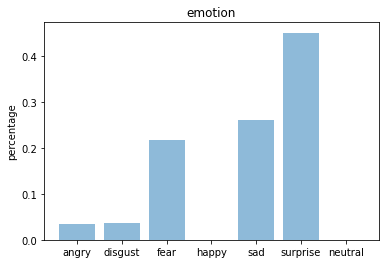

[[3.4048200e-02 3.7419174e-02 2.1795157e-01 4.1681321e-04 2.5994453e-01
  4.5005873e-01 1.6100676e-04]]
0.45005873


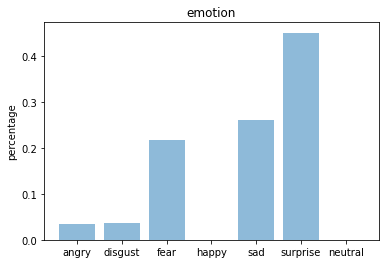

None


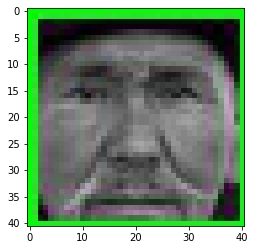

424
Image doesn't exist
425
Image doesn't exist
426


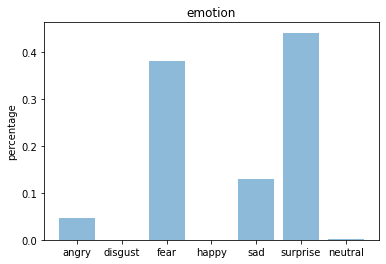

[[4.6645280e-02 1.3514797e-04 3.8076454e-01 2.1336471e-04 1.2909561e-01
  4.4159991e-01 1.5461869e-03]]
0.4415999


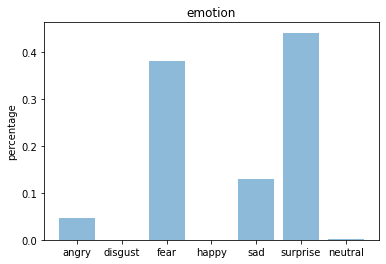

None


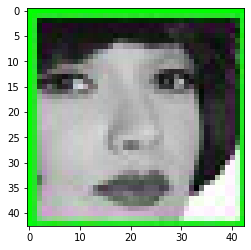

427
Image doesn't exist
428
Image doesn't exist
429
Image doesn't exist
430


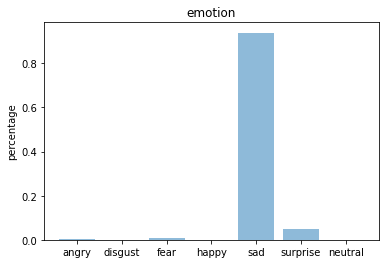

[[3.9792075e-03 4.2354779e-05 6.6347797e-03 1.9798961e-06 9.3876481e-01
  5.0404392e-02 1.7243061e-04]]
0.9387648


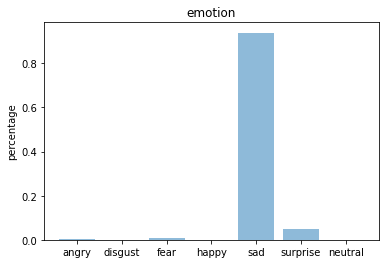

None


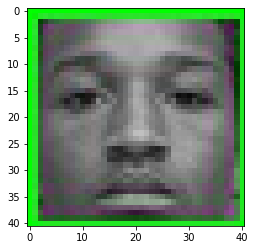

431
Image doesn't exist
432


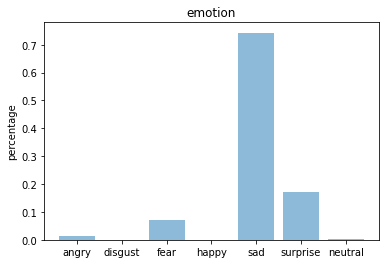

[[1.2168194e-02 1.5267187e-05 6.9358401e-02 4.3152994e-04 7.4317878e-01
  1.7135997e-01 3.4879604e-03]]
0.7431788


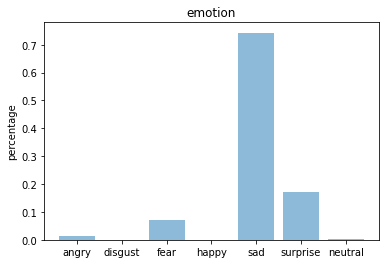

None


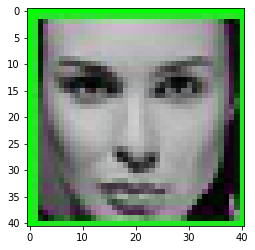

433
Image doesn't exist
434


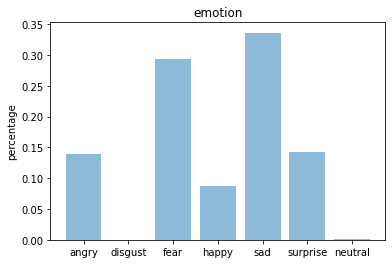

[[1.3923168e-01 2.1320276e-04 2.9371741e-01 8.7116502e-02 3.3592519e-01
  1.4285490e-01 9.4118295e-04]]
0.3359252


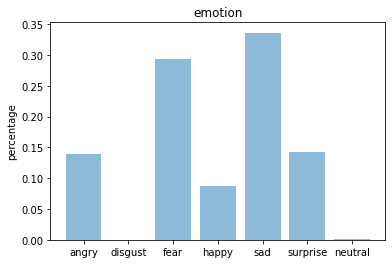

None


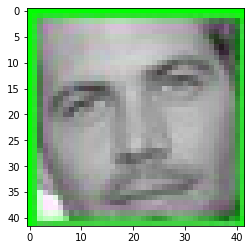

435
Image doesn't exist
436
Image doesn't exist
437


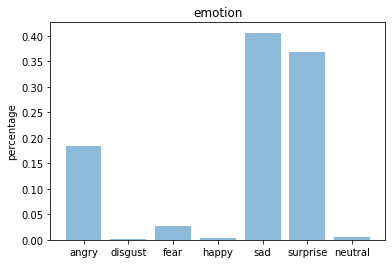

[[0.1841113  0.00156516 0.02801481 0.00426085 0.4064987  0.36928877
  0.00626046]]
0.4064987


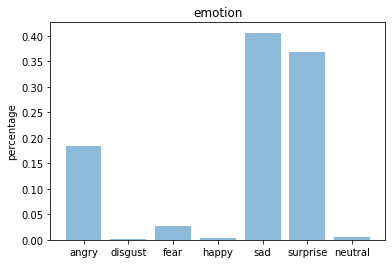

None


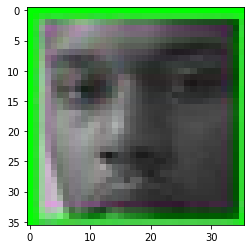

438
Image doesn't exist
439


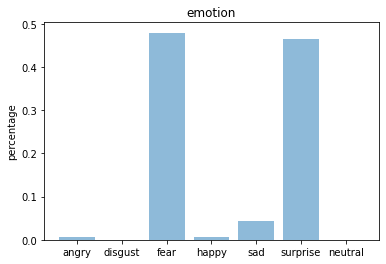

[[5.9434753e-03 1.1259641e-05 4.7946003e-01 5.9013241e-03 4.2392001e-02
  4.6594515e-01 3.4674347e-04]]
0.47946003


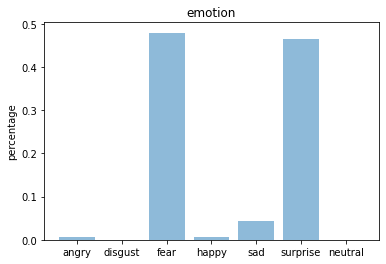

None


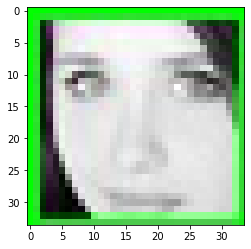

440
Image doesn't exist
441


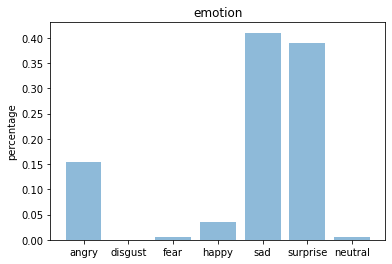

[[1.5409756e-01 4.3351133e-06 5.9325881e-03 3.5801407e-02 4.0996486e-01
  3.8951346e-01 4.6857935e-03]]
0.40996486


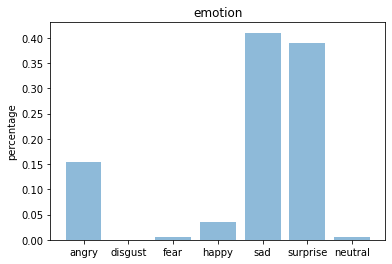

None


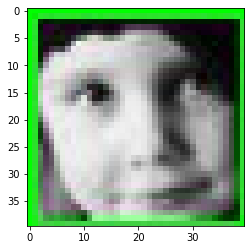

442


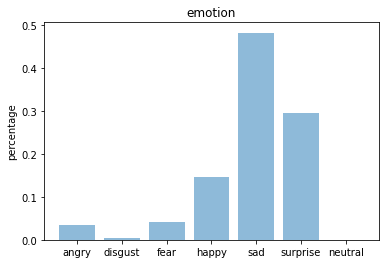

[[3.5025094e-02 3.0779922e-03 4.0290460e-02 1.4588694e-01 4.8172152e-01
  2.9390109e-01 9.6880569e-05]]
0.48172152


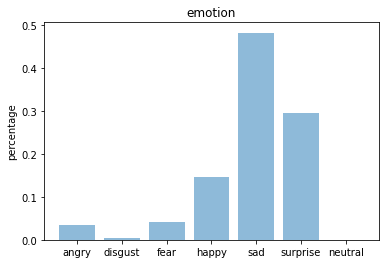

None


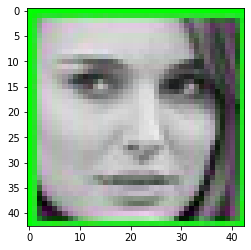

443
Image doesn't exist
444
Image doesn't exist
445


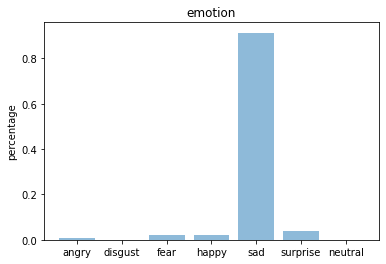

[[0.00748908 0.00122344 0.01988406 0.02057612 0.9132591  0.03661029
  0.0009579 ]]
0.9132591


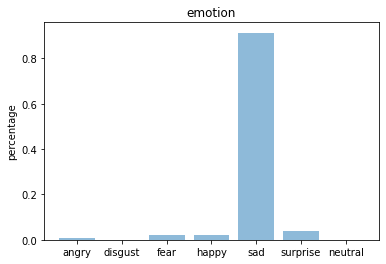

None


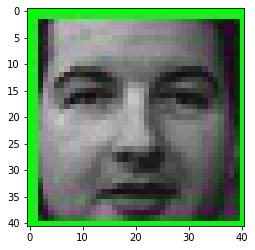

446
Image doesn't exist
447
Image doesn't exist
448
Image doesn't exist
449


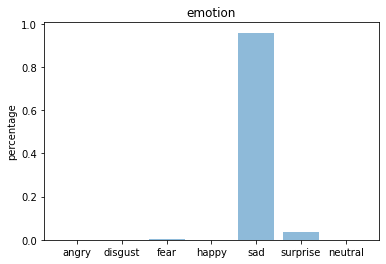

[[3.0346581e-04 2.3121682e-07 4.5703724e-03 1.2376734e-07 9.5858204e-01
  3.6397249e-02 1.4663149e-04]]
0.95858204


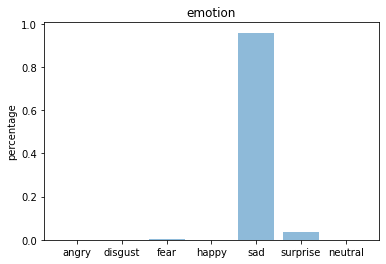

None


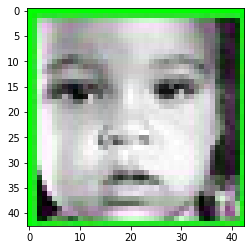

450


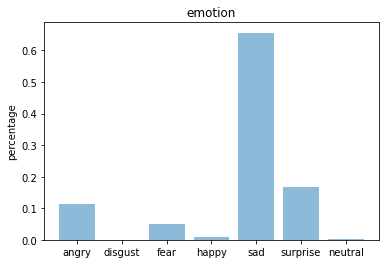

[[0.11329918 0.00091502 0.05093968 0.00961423 0.6561326  0.1673523
  0.00174701]]
0.6561326


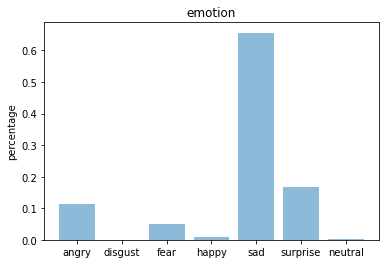

None


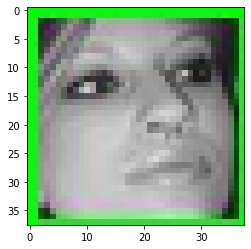

451


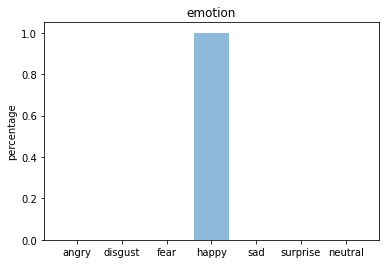

[[5.7693762e-07 4.7475407e-08 4.1588223e-08 9.9998307e-01 1.5962309e-05
  3.0733142e-07 4.2780567e-08]]
0.9999831


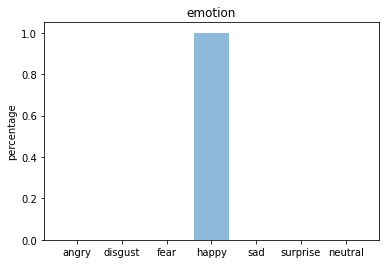

None


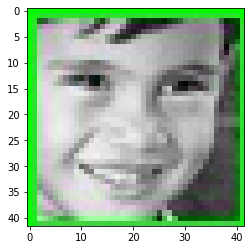

452
Image doesn't exist
453
Image doesn't exist
454


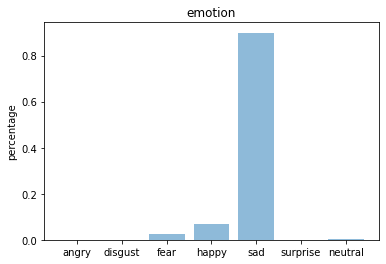

[[4.3952739e-04 4.3776197e-08 2.4523694e-02 7.0500501e-02 8.9945996e-01
  9.9678792e-04 4.0795212e-03]]
0.89945996


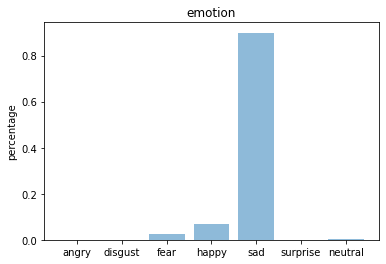

None


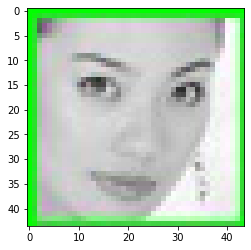

455


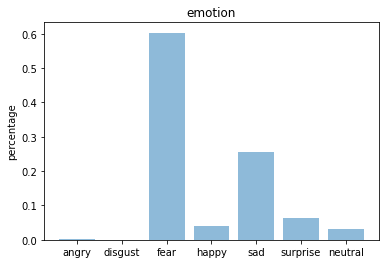

[[3.4868743e-03 3.8325196e-04 6.0295755e-01 4.0487181e-02 2.5679344e-01
  6.3962087e-02 3.1929702e-02]]
0.60295755


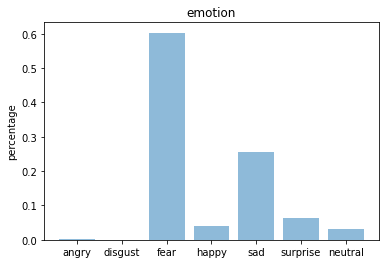

None


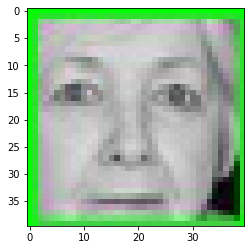

456
Image doesn't exist
457
Image doesn't exist
458
Image doesn't exist
459


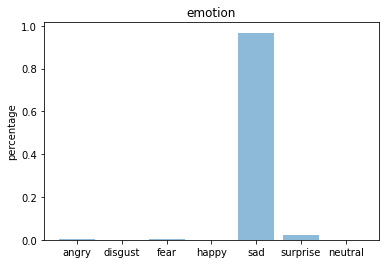

[[5.4725353e-03 3.7993424e-05 2.2868847e-03 1.8959347e-05 9.6723068e-01
  2.4693400e-02 2.5955969e-04]]
0.9672307


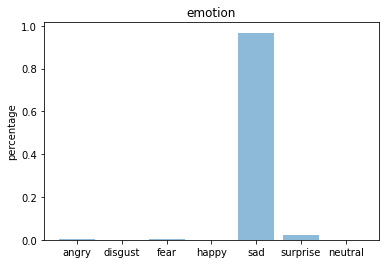

None


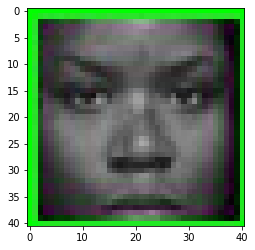

460


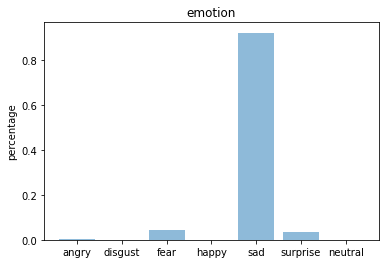

[[1.6854544e-03 9.4007279e-05 4.1665394e-02 6.0223207e-05 9.2157555e-01
  3.4236226e-02 6.8322191e-04]]
0.92157555


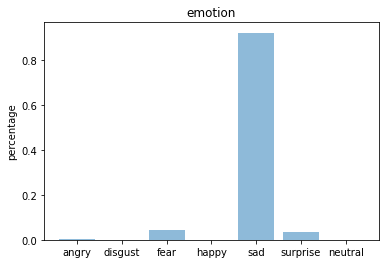

None


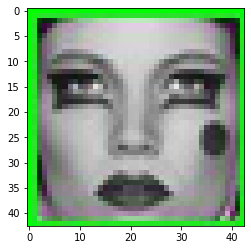

461


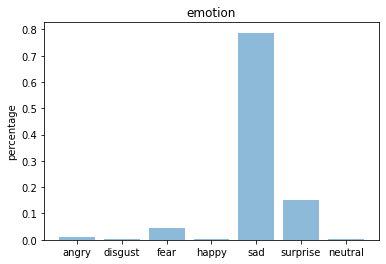

[[0.00895573 0.00157678 0.04441557 0.00152057 0.7872965  0.15274142
  0.00349343]]
0.7872965


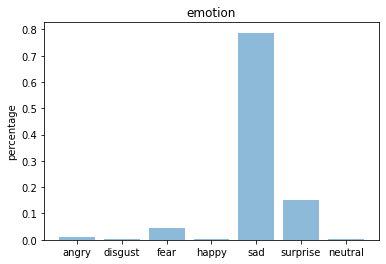

None


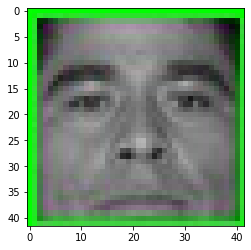

462
Image doesn't exist
463
Image doesn't exist
464
Image doesn't exist
465


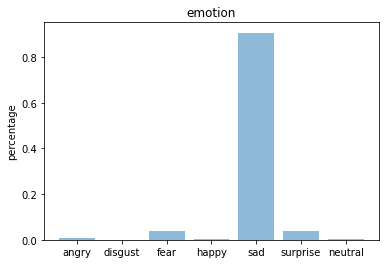

[[9.0586301e-03 4.3753488e-04 3.7582882e-02 3.3909432e-03 9.0648788e-01
  3.9745353e-02 3.2968016e-03]]
0.9064879


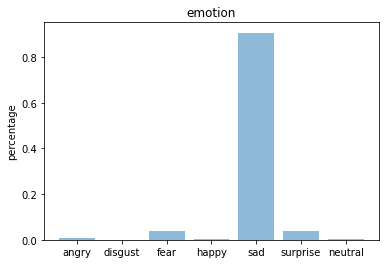

None


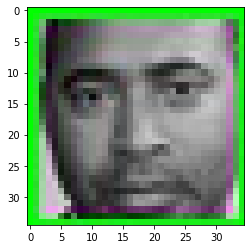

466


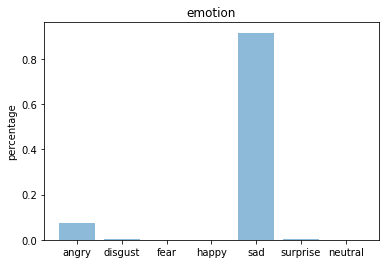

[[7.5305238e-02 3.6558455e-03 8.8832941e-04 6.9230184e-04 9.1659755e-01
  2.8411876e-03 1.9537980e-05]]
0.91659755


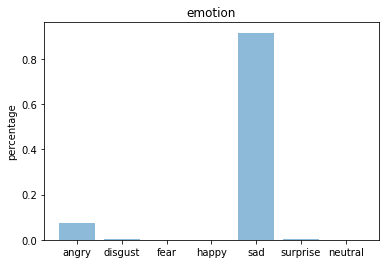

None


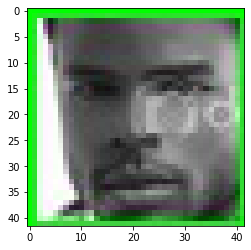

467
Image doesn't exist
468
Image doesn't exist
469
Image doesn't exist
470
Image doesn't exist
471
Image doesn't exist
472


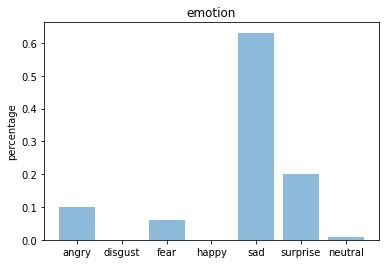

[[1.0051334e-01 1.1115823e-05 6.1126661e-02 8.4888779e-05 6.3102406e-01
  1.9942178e-01 7.8181550e-03]]
0.63102406


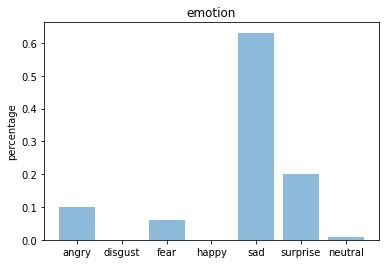

None


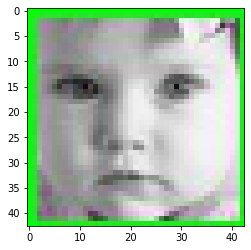

473
Image doesn't exist
474


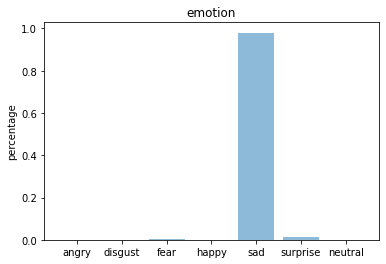

[[5.7181602e-05 7.0409158e-08 5.8829929e-03 6.7362902e-07 9.7952741e-01
  1.4273135e-02 2.5847502e-04]]
0.9795274


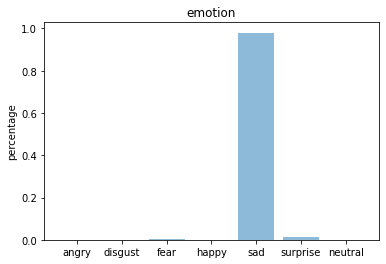

None


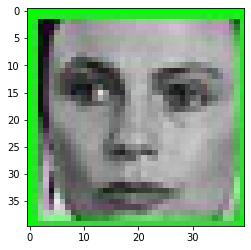

475


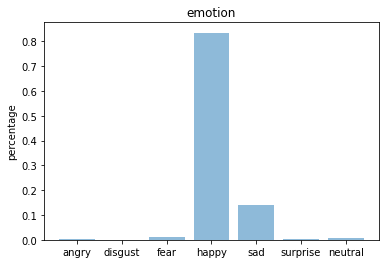

[[3.3409216e-03 2.6924639e-05 1.1199045e-02 8.3483666e-01 1.3877031e-01
  3.7554896e-03 8.0707064e-03]]
0.83483666


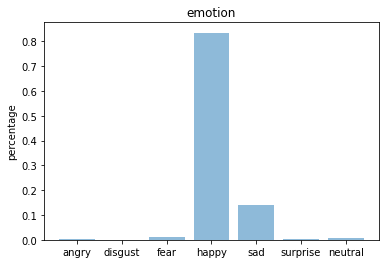

None


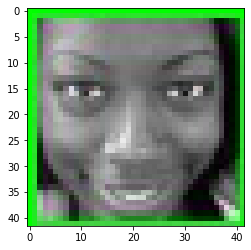

476


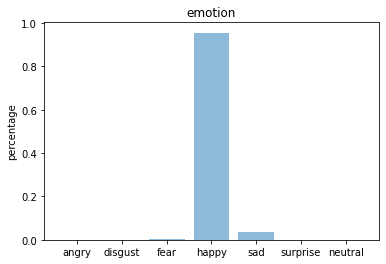

[[2.8566789e-04 8.0616286e-07 5.5905329e-03 9.5524836e-01 3.7431259e-02
  4.3514784e-04 1.0081517e-03]]
0.95524836


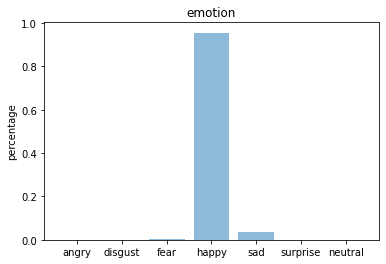

None


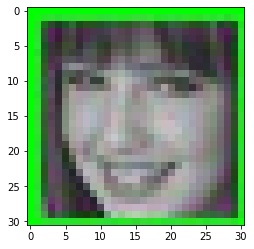

477


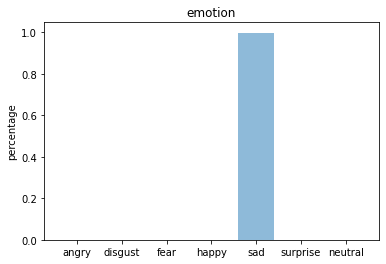

[[9.2568780e-06 3.9368452e-08 4.3777554e-04 3.8153903e-06 9.9855095e-01
  9.8223193e-04 1.5787575e-05]]
0.99855095


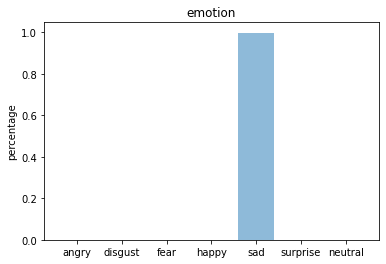

None


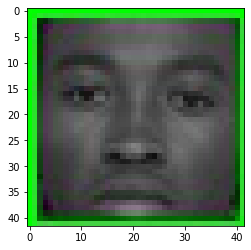

478
Image doesn't exist
479
Image doesn't exist
480
Image doesn't exist
481


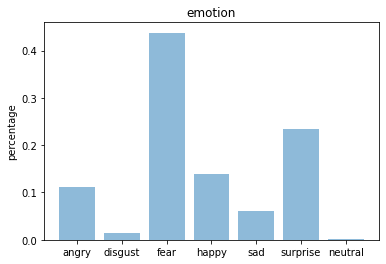

[[0.11248165 0.01366795 0.43763268 0.13849573 0.06105619 0.23503467
  0.00163123]]
0.43763268


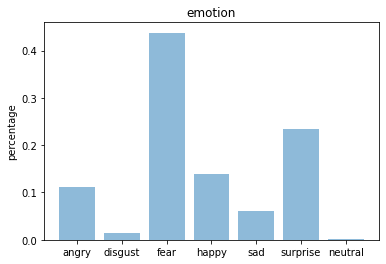

None


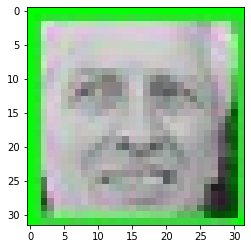

482


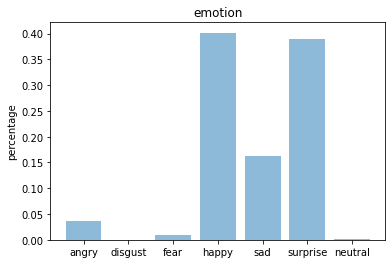

[[0.03595297 0.00057104 0.0086561  0.4017424  0.16272399 0.389477
  0.00087647]]
0.4017424


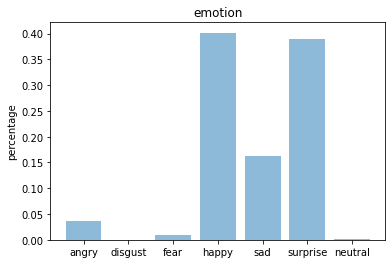

None


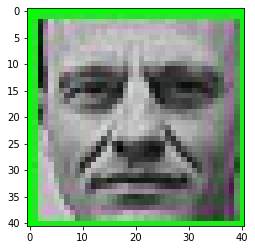

483


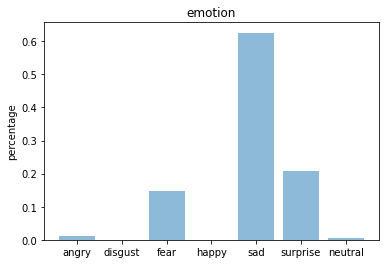

[[1.11801550e-02 5.11915241e-05 1.48490414e-01 1.10483625e-05
  6.25909150e-01 2.08144411e-01 6.21368224e-03]]
0.62590915


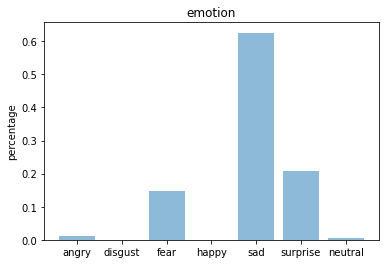

None


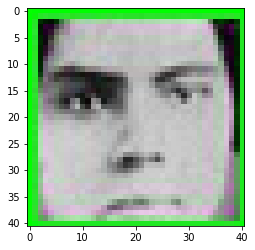

484
Image doesn't exist
485
Image doesn't exist
486


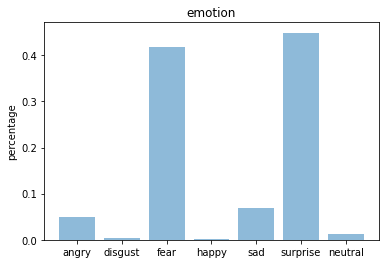

[[0.04876088 0.003068   0.41801107 0.00161274 0.06793933 0.44879344
  0.01181447]]
0.44879344


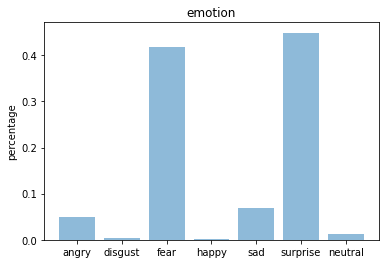

None


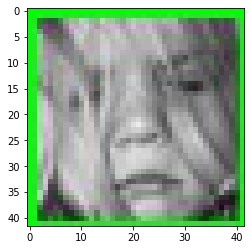

487
Image doesn't exist
488


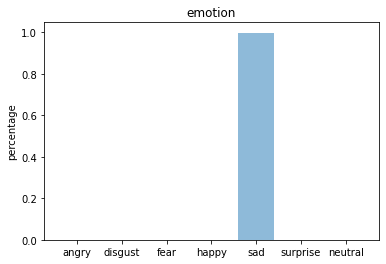

[[5.7721284e-04 5.2099658e-06 2.7308363e-04 9.3802075e-05 9.9749196e-01
  1.1110324e-03 4.4775888e-04]]
0.99749196


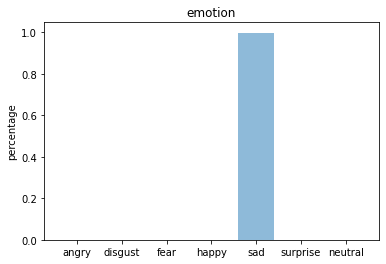

None


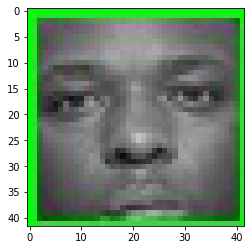

489
Image doesn't exist
490
Image doesn't exist
491


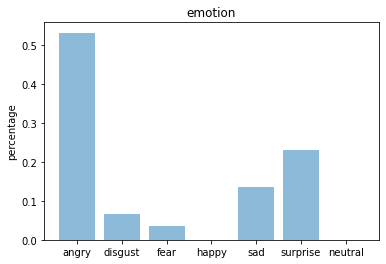

[[5.3177434e-01 6.5201111e-02 3.6601704e-02 1.4414176e-05 1.3597666e-01
  2.3039661e-01 3.5202578e-05]]
0.53177434


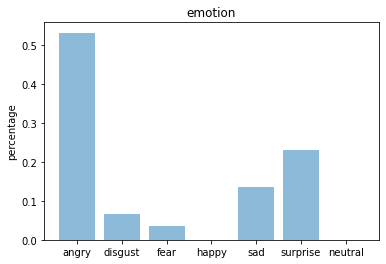

None


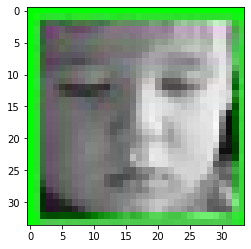

492
Image doesn't exist
493
Image doesn't exist
494
Image doesn't exist
495


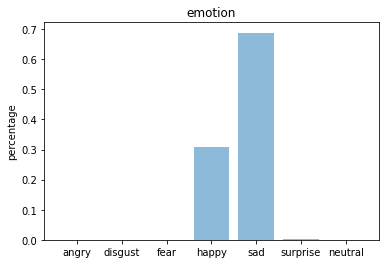

[[8.6206978e-04 2.2903359e-05 1.3592592e-04 3.0773848e-01 6.8802309e-01
  2.5762189e-03 6.4130459e-04]]
0.6880231


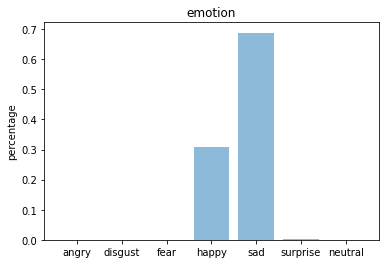

None


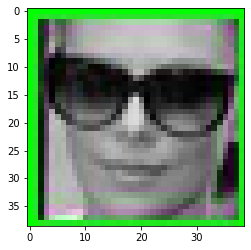

496


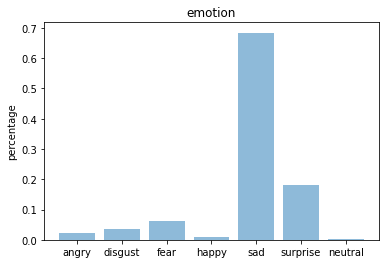

[[0.02390978 0.036804   0.06372661 0.0084353  0.6843306  0.18109944
  0.00169426]]
0.6843306


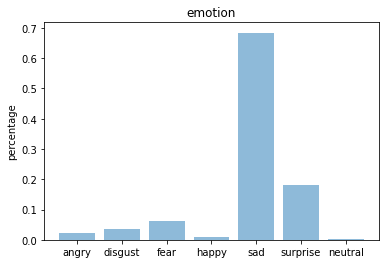

None


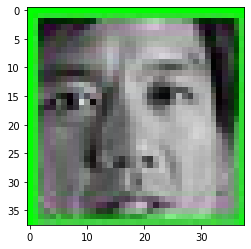

497
Image doesn't exist
498
Image doesn't exist
499


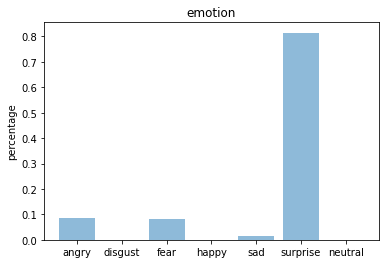

[[8.6835235e-02 5.1655847e-04 8.1923917e-02 5.5055501e-05 1.5830141e-02
  8.1468797e-01 1.5120402e-04]]
0.81468797


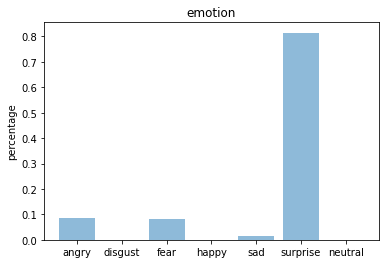

None


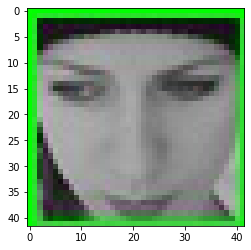

500


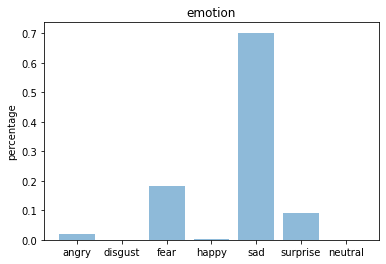

[[2.1299889e-02 5.0208432e-04 1.8098837e-01 3.1245330e-03 7.0253402e-01
  9.1257527e-02 2.9352366e-04]]
0.702534


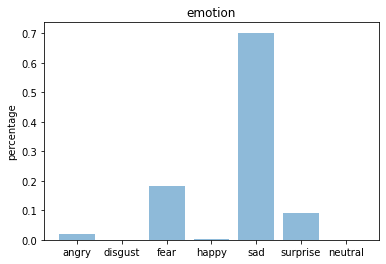

None


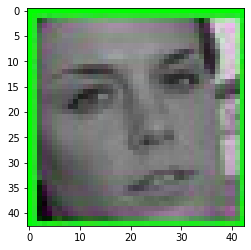

501
Image doesn't exist
502


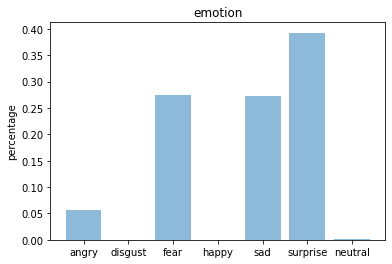

[[5.7371233e-02 4.8549488e-04 2.7553225e-01 3.1804209e-04 2.7269474e-01
  3.9278409e-01 8.1418577e-04]]
0.3927841


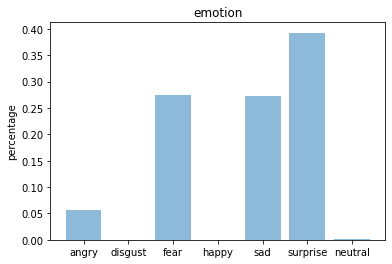

None


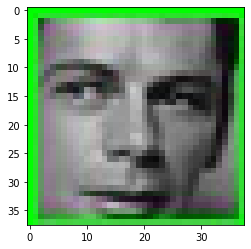

503


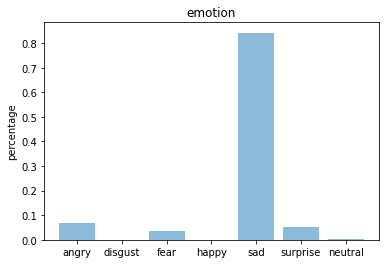

[[6.6599153e-02 8.4814521e-05 3.4144744e-02 2.2841400e-06 8.4221542e-01
  5.2791499e-02 4.1621136e-03]]
0.8422154


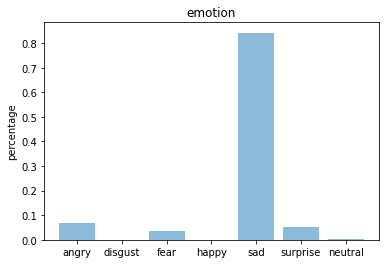

None


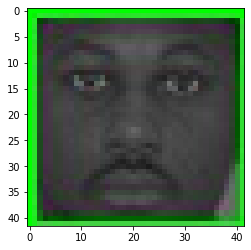

504


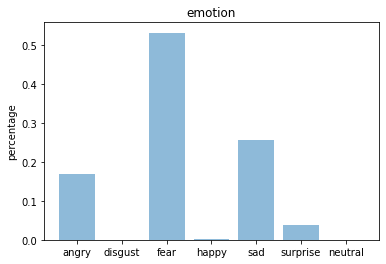

[[1.6917820e-01 3.6184618e-04 5.3170174e-01 2.7914147e-03 2.5666094e-01
  3.9190419e-02 1.1547015e-04]]
0.53170174


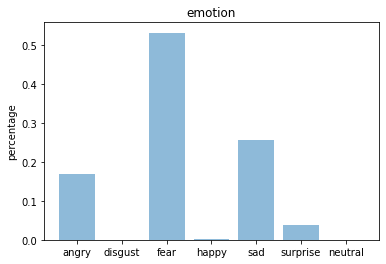

None


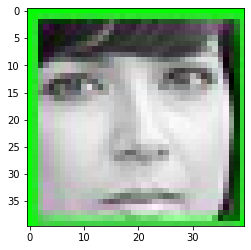

505
Image doesn't exist
506


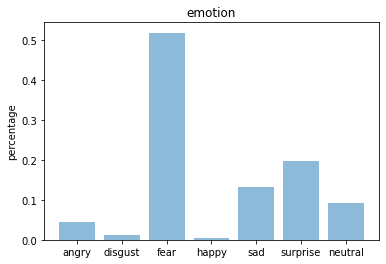

[[0.04357995 0.01094117 0.51856154 0.00366565 0.13289736 0.19811498
  0.09223936]]
0.51856154


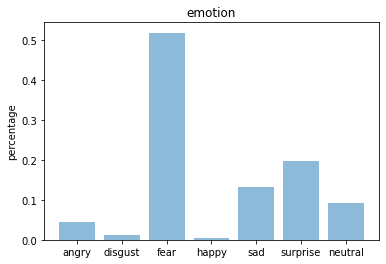

None


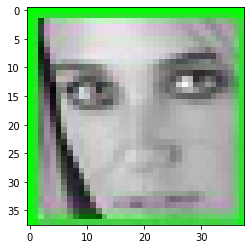

507
Image doesn't exist
508


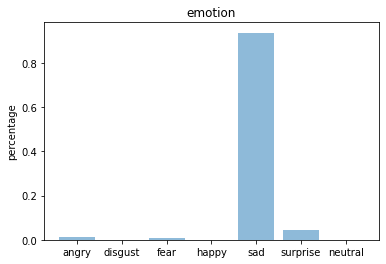

[[1.0538903e-02 3.5943749e-06 1.0016574e-02 9.6034955e-07 9.3621653e-01
  4.2771619e-02 4.5177282e-04]]
0.93621653


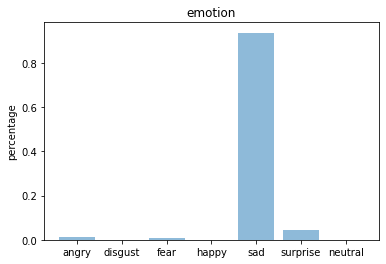

None


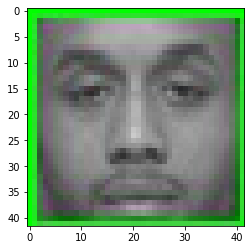

509
Image doesn't exist
510


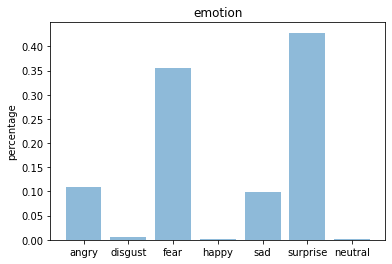

[[0.10829564 0.00496292 0.3548398  0.0019379  0.09982576 0.42846704
  0.00167098]]
0.42846704


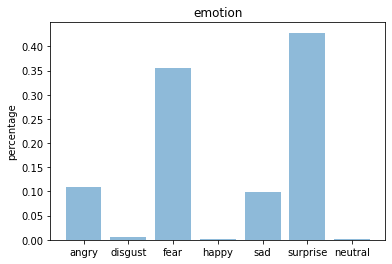

None


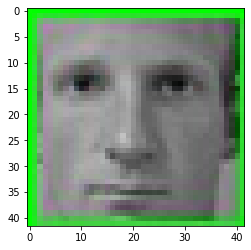

511
Image doesn't exist
512
Image doesn't exist
513


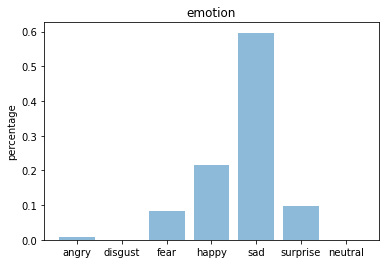

[[7.3489319e-03 2.7029628e-05 8.3057024e-02 2.1531242e-01 5.9657663e-01
  9.7670764e-02 7.2479174e-06]]
0.59657663


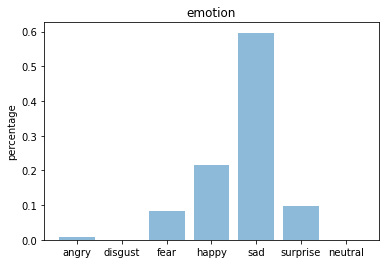

None


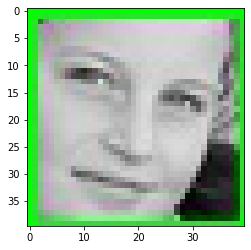

514
Image doesn't exist
515
Image doesn't exist
516
Image doesn't exist
517


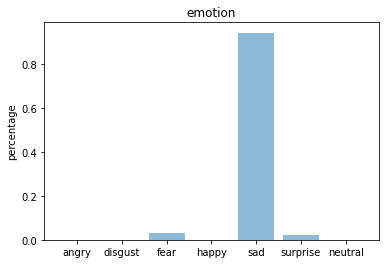

[[4.3009291e-04 5.3374379e-06 3.0050643e-02 3.9513980e-06 9.4460326e-01
  2.3745874e-02 1.1607670e-03]]
0.94460326


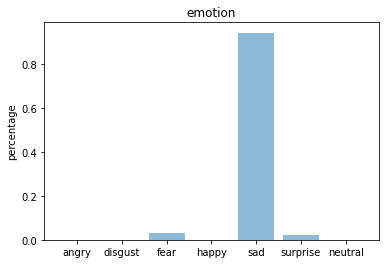

None


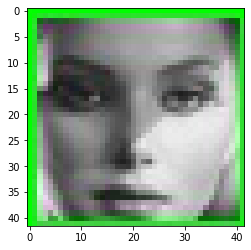

518
Image doesn't exist
519


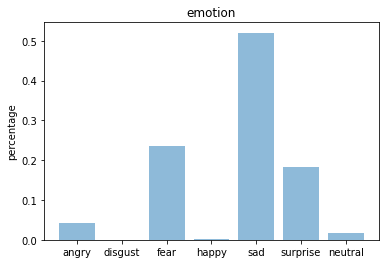

[[4.2586528e-02 1.7635962e-04 2.3516418e-01 1.8177283e-03 5.2037013e-01
  1.8328084e-01 1.6604232e-02]]
0.5203701


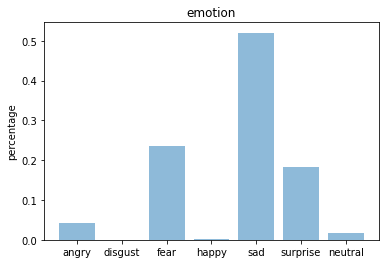

None


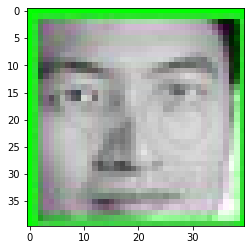

520


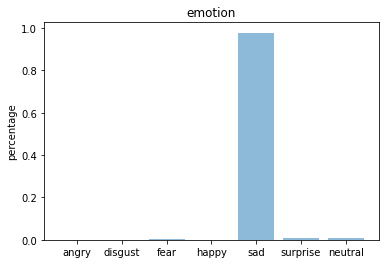

[[6.0659304e-04 2.0863513e-06 4.3846145e-03 1.5456187e-04 9.7832346e-01
  8.7793581e-03 7.7494150e-03]]
0.97832346


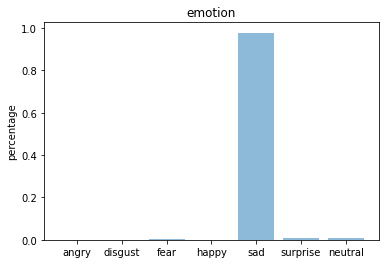

None


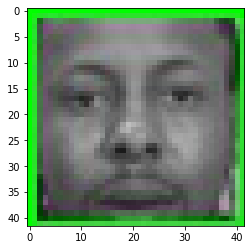

521
Image doesn't exist
522
Image doesn't exist
523


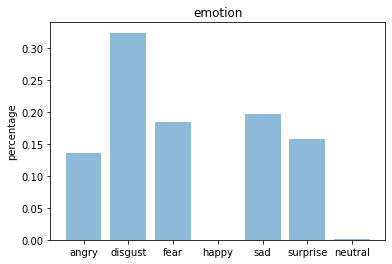

[[1.3646680e-01 3.2409295e-01 1.8455382e-01 2.4867246e-05 1.9694145e-01
  1.5725960e-01 6.6051900e-04]]
0.32409295


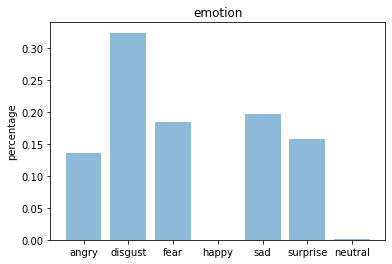

None


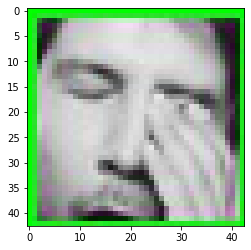

524


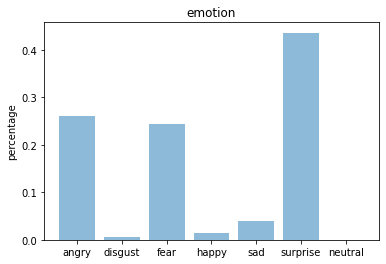

[[2.5947177e-01 5.5776471e-03 2.4410471e-01 1.4758280e-02 4.0247791e-02
  4.3571115e-01 1.2868307e-04]]
0.43571115


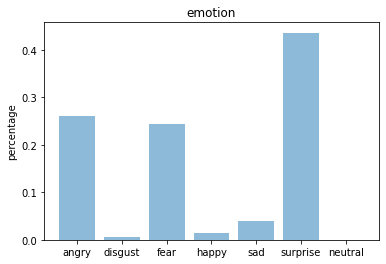

None


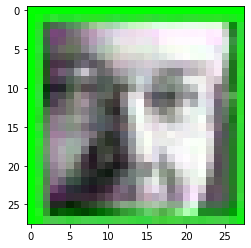

525
Image doesn't exist
526


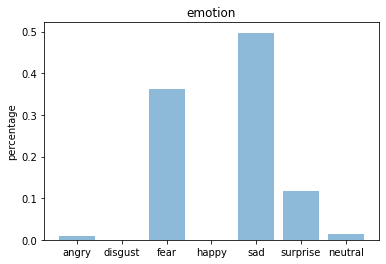

[[8.2252929e-03 8.1057369e-05 3.6208040e-01 2.8051299e-04 4.9745119e-01
  1.1802063e-01 1.3860884e-02]]
0.4974512


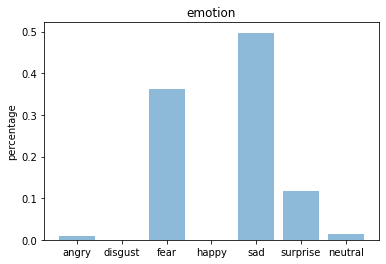

None


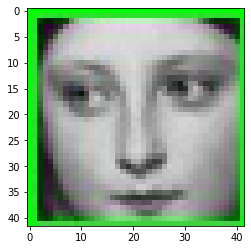

527


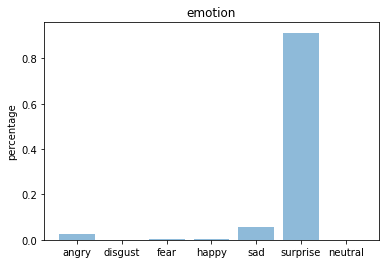

[[2.4168275e-02 5.0688509e-08 2.8849086e-03 2.2002312e-03 5.7123836e-02
  9.1350472e-01 1.1797977e-04]]
0.9135047


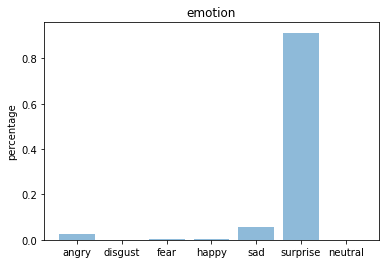

None


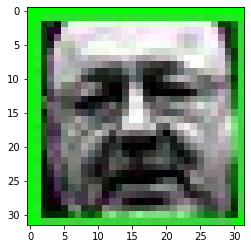

528
Image doesn't exist
529
Image doesn't exist
530
Image doesn't exist
531


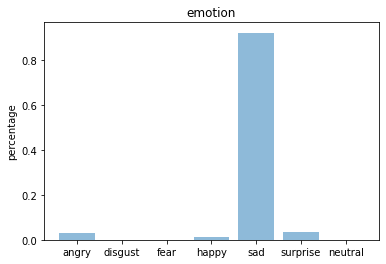

[[2.9011492e-02 4.6426544e-04 1.0332123e-03 1.2046684e-02 9.2045754e-01
  3.6796499e-02 1.9024672e-04]]
0.92045754


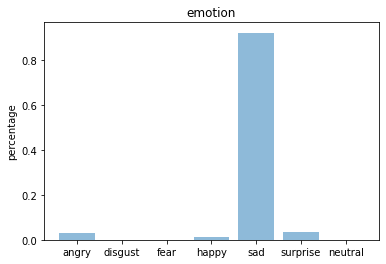

None


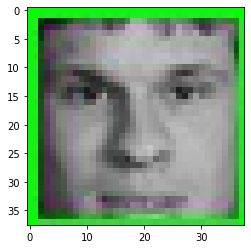

532
Image doesn't exist
533
Image doesn't exist
534
Image doesn't exist
535
Image doesn't exist
536
Image doesn't exist
537
Image doesn't exist
538
Image doesn't exist
539


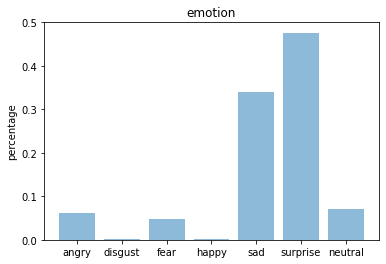

[[0.06121925 0.0008287  0.04730343 0.00272933 0.34087104 0.47645405
  0.07059421]]
0.47645405


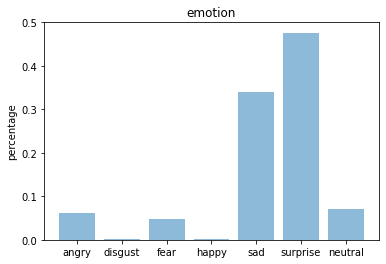

None


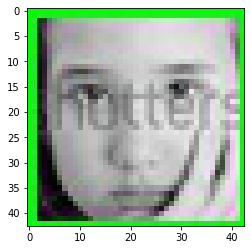

540
Image doesn't exist
541


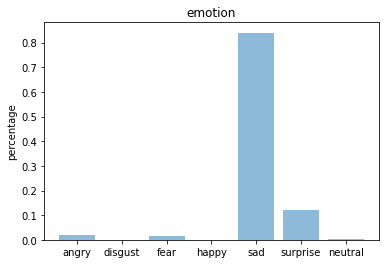

[[2.06977185e-02 4.85068085e-05 1.54013159e-02 1.21916037e-05
  8.40328336e-01 1.19079486e-01 4.43245936e-03]]
0.84032834


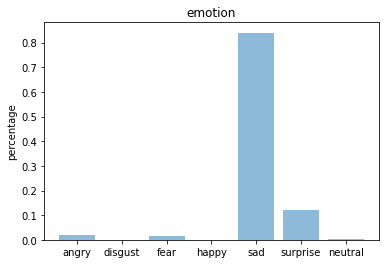

None


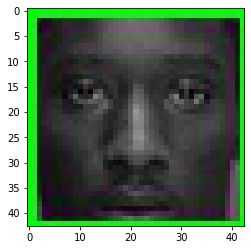

542


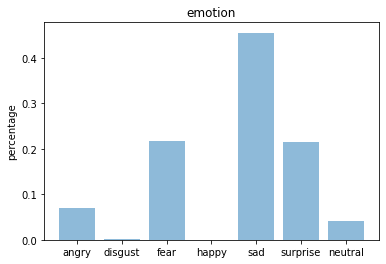

[[7.0318997e-02 7.9594046e-04 2.1647450e-01 9.2019116e-05 4.5492256e-01
  2.1547388e-01 4.1922096e-02]]
0.45492256


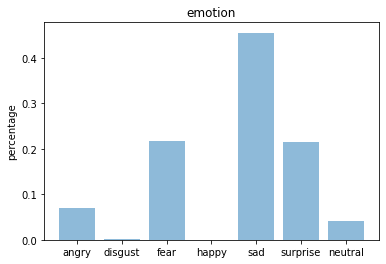

None


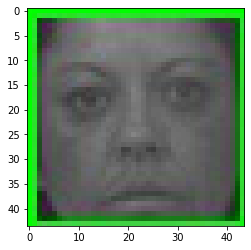

543
Image doesn't exist
544


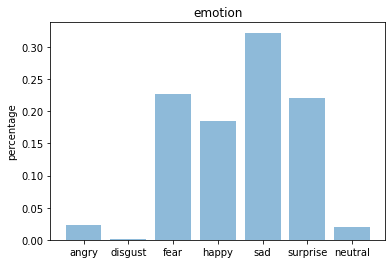

[[0.02236651 0.0011995  0.22640301 0.18559626 0.32250804 0.2214262
  0.02050047]]
0.32250804


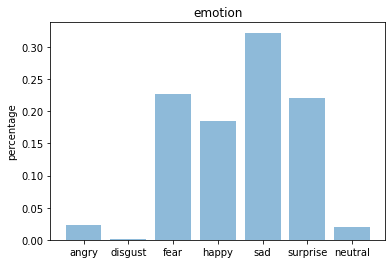

None


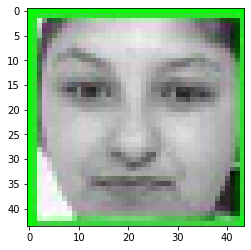

In [4]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import spicy as sc
from scipy import misc


folder_valid = 'C:/Users/User/Desktop/test/neutral_valid'
# 'C:/Users/User/Desktop/test/angry_valid/capture  {0}.jpg'
all_vald_img = []
photo_count = 0
angry = 0
disgust = 0
fear = 0
happy = 0
sad = 0
surprise = 0
neutral = 0
    
for filename_valid in os.listdir(folder_valid):
    photo_count += 1
    img_valid = cv2.imread(os.path.join(folder_valid,filename_valid))
    if img_valid is not None:
        all_vald_img.append(img_valid)

# print(all_vald_img)

# print(len(all_vald_img))
#     if photo_count == len(all_vald_img):
#         pass
    try:
        file  = 'C:/Users/User/Desktop/test/neutral_valid/capture{0}.jpg'.format(photo_count)
        print(photo_count)
        true_image = image.load_img(file)
        img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))


        #  --------------------------------------------------------------------------------
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)

        x /= 255

        custom = model.predict(x)
        emotion_analysis(custom[0])
        emo_reff = {'angry': custom[0][0], 'disgust': custom[0][1], 'fear': custom[0][2], 'happy': custom[0][3],
                    'sad': custom[0][4], 'surprise': custom[0][5], 'neutral': custom[0][6]}
        print(custom)
        print(max(custom[0]))
        print(emotion_analysis(custom[0]))
        if max(custom[0]) == emo_reff['angry']:
            angry += 1
        elif max(custom[0]) == emo_reff['disgust']:
            disgust += 1
        elif max(custom[0]) == emo_reff['fear']:
            fear += 1
        elif max(custom[0]) == emo_reff['happy']:
            happy += 1
        elif max(custom[0]) == emo_reff['sad']:
            sad += 1
        elif max(custom[0]) == emo_reff['surprise']:
            surprise += 1
        else:
            neutral += 1
            

        x = np.array(x, 'float32')
        x = x.reshape([48, 48]);

        plt.imshow(true_image)
        plt.show()
    except:
        print("Image doesn't exist")
        continue
        
#     ----------------------------------------------------------------------------------
#     file  = 'C:/Users/User/Desktop/test/angry_valid/capture355.jpg'
# #     print(photo_count)
#     true_image = image.load_img(file)
#     img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))


#     #  --------------------------------------------------------------------------------
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis = 0)

#     x /= 255

#     custom = model.predict(x)
#     emotion_analysis(custom[0])
#     print(custom)
#     print(max(custom[0]))
#     print(emotion_analysis(custom[0]))

#     x = np.array(x, 'float32')
#     x = x.reshape([48, 48]);

#     plt.imshow(true_image)
#     plt.show()

In [5]:
print("angry =", angry)
print("disgust =", disgust)
print("fear =", fear)
print("happy =", happy)
print("sad =", sad)
print("surprise =", surprise)
print("neutral =", neutral)
print("\n")

total = angry + disgust + fear + happy + sad + surprise + neutral
print("Total =", total)

print("neutral precentage % =", (neutral/total) *100)


angry = 17
disgust = 3
fear = 26
happy = 15
sad = 138
surprise = 40
neutral = 7


Total = 246
neutral precentage % = 2.8455284552845526
